<h1>CE9010 Project</h1>
<h3>by Cassandra Tay, Lim Bang Jin, Tng Jun Wei</h3>

[GitHub Page](https://github.com/Journeyman1998/CE9010-Data-Science-Project)

# Table of Contents <a name='Contents'></a>
1. [Introduction](#introduction)<br>
2. [Libraries](#libraries)<br>
3. [Data Acquisition](#data-acquisition)<br>
4. [Feature Engineering - Coordinates](#eng-1)<br>
5. [Data Cleaning](#data-clean)<br>
6. [Feature Engineering - Other Features](#eng-2)<br>
    6.1. [Evaluate the number of MRT and primary schools near each listing](#eng-21)<br>
    6.2. [Evaluate the age of each apartment](#eng-22)<br>
    6.3. [Other apartment-related features](#eng-23)<br>
7. [Data Exploration](#data-exploration)<br>
    7.1 [Investigating Outliers](#outlier)<br>
    7.2 [Univariate Analysis](#uni)<br>
    7.3 [Bivariate Analysis](#bi)<br>
8. [Data Preprocessing](#data-preprocess)<br>
9. [Data Analysis](#data-analysis)<br>
    9.1. [Linear Regression](#linreg)<br>
    9.2. [Ridge Regression](#ridge)<br>
    9.3. [RandomForestRegressor](#rf)<br>
    9.4. [GradientBoostingRegressor](#gb)<br>
    9.5. [KNeighborsRegressor](#knn)<br>
    9.6. [Stacking Generalization](#stacking)<br>
10. [Conclusion](#conclusion)<br>
11. [Future Work](#future-work)<br>

##  1. Introduction <a name='introduction'></a>
[Back to top](#Contents)<br>

With more online selling platform, Singapore housing market is gradually changing from traditional methods (engaging in property agents to buy flats) to more innovative digital methods (listings posted online, e.g PropertyGuru and apps). Buyers may go online to search for properties they are interested in and contact directly with the seller’s property agent. Based on the price and information (Size of the property, location, built on which year, etc) of the property provided on the website, inexperienced buyers may not know if the property is overpriced or underpriced, as they might not understand which key factors might influence the house pricing model in Singapore. This is because the pricing model may be influenced by macroeconomic factors (e.g GDP, inflation rate) and microeconomic factors (e.g Age of property, size of property). This made it difficult for buyers to understand how the complicated pricing model works. Therefore, there is a need to research on a simple pricing model that allows buyers to understand these factors.

There has been a lack of research in the house pricing model that is suitable for Singapore housing market. As majority of the pricing models were based on overseas market, it might not be applicable to Singapore due to the differences in housing policy and market. Furthermore, some pricing models that were based on Singapore housing were complicated like georaphically weighted regression and artifical neural network.

The objective of the project is to analyse how house pricing model can be influenced by various factors such as area, locations, distance from central and others. As those features could easily be found on the online platform, with a simple pricing model that considered these determinant factors, buyers could easily get the rough estimation of the property price from the pricing model. Furthermore, our findings could be shared through various social media mediums and could provide a useful rough pricing tool for potential buyers when searching for house that is both within their means and facilities they desired. 


## 2. Libraries <a name='libraries'></a>
[Back to top](#Contents)<br>

<p> Please setup a virtual conda environment and do conda install for these libraries:<br>
    <ul>
        <li>Python 3.6</li>
        <li>Numpy</li>
        <li>Pandas</li>
        <li>Matplotlib</li>
        <li>Seaborn</li>
        <li>Scikit-learn</li>
        <li>Geopandas</li>
        <li>Shapefile</li>
        <li>Descartes</li>
        <li>Geopy</li>
    </ul>

In [ ]:
pip install geopandas

In [ ]:
pip install pyshp

In [ ]:
pip install descartes

In [ ]:
pip install seaborn

In [2]:
# libraries 
import pandas as pd
import numpy as np 
import warnings
import pickle
import time 

# geographical distance 
from geopy.distance import distance

# visualization tools 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import shapefile as shp
import descartes

# machine learning
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor

warnings.filterwarnings("ignore", category=RuntimeWarning)

## 3. Data Acquisition <a name='data-acquisition'></a>
[Back to top](#Contents)<br>

<p>Data was collected from the Propertyguru website, starting on 1 March 2020 by developing our own web scrapping tool. Tight security of the website was an immediate challenge that we had to overcome. Multiple issues such as image captcha, access to the website through our bot being denied were our main problems. In the end, we made use of selenium webdriver to make the bot as 'human-like' as possible and also had to collect the data over a few days with reduced frequency to ensure that we are not detected. Our code is shared on GitHub for anyone who may be interested.</p>

<p>File obtained: property_raw_data.xlsx, property_raw_data.json</p>

## 4. Feature Engineering - Coordinates <a name='eng-1'></a>
[Back to top](#Contents)<br>

<p>Our data contains the feature: Address, which is a string value. It is hard for a model to learn from text data. Therefore, we converted the addresses into the latitude/longitude coordinates. By making use of the library Geocoder and its class ArcGIS, we made slight modifications to it in order to achieve our needs. Our code is shared on GitHub as well. </p>

<p>File obtained: property_loc.csv</p>

# 5. Data Cleaning 
[Back to top](#Contents)<br>
<br>

The acquired data contains the following features: 
1. Address 
2. Building Name 
3. Built On - Year that the building was built 
4. Land Area - Size of the house 
5. No. of Bathroom 
6. No. of Bedroom 
7. Price 
8. Price per sqft 
9. Tenure 
10. Type of property 
11. Latitude
12. Longtitude 


The data cleaning was conducted in the following process: 
1. Eliminate missing values and values that contain unknown data (e.g unknown tenure). 
2. Remove uncommon houses like shophouse and convervation house from the dataset (as there are insufficient data to train the model for such type of houses)
3. Remove string symbols like 'S$', 'psf', 'sqft' 
4. Extract numeric value from the 'Land_Area' variable 

In [2]:
data = pd.read_csv('data/property_loc.csv',delimiter =',', index_col=0)
data.head()

Address                  Building Name  \
0  190 Bukit Batok West Avenue 6  190 Bukit Batok West Avenue 6   
1                     Sims Drive               Sims Urban Oasis   
2          57 Choa Chu Kang Loop                     The Warren   
3               21 Fernvale Road           High Park Residences   
4                 21 Nathan Road                  Nathan Suites   

            Built On  Land Area  Number of Bathroom  Number of Bedroom  \
0               1995  1270 sqft                   2                  3   
1  99-year Leasehold   409 sqft                   1                  1   
2               2004  1066 sqft                   2                  2   
3  99-year Leasehold   680 sqft                   2                  2   
4               2014   926 sqft                   2                  2   

           Price   Price per sqft             Tenure               Type  \
0    S$ 546,000     S$ 429.92 psf  99-year Leasehold      HDB Apartment   
1    S$ 720,000   S$ 1,760.39 psf        Condominium  New Project: 2020   
2    S$ 980,000     S$ 919.32 psf  99-year Leasehold        Condominium   
3    S$ 880,000   S$ 1,294.12 psf        Condominium  New Project: 2019   
4  S$ 2,500,000   S$ 2,699.78 psf           Freehold        Condominium   

   latitude   longitude  
0  1.345383  103.746046  
1  1.318261  103.879391  
2  1.386702  103.743679  
3  1.396440  103.875251  
4  1.295316  103.827096

<p> First, we dropped the features that are not useful, and a few of the data points with missing values. We dropped the feature <b>"Price"</b> too as it is just equal to the product of area and price per sqft. We also renamed some of the features. </p>

In [3]:
data.drop(['Address', 'Building Name', 'Tenure', 'Price'], axis=1, inplace=True) #drop variables that are not useful 
data = data.rename(columns={"Built On": "Built", "Land Area": "area", "Number of Bathroom": "bathroom"
                          , "Number of Bedroom":"bedroom", "Price per sqft": "price_sqft"}) #simplify the variable names 
house = data.dropna() #drop missing values
house.head()

Built       area  bathroom  bedroom       price_sqft  \
0               1995  1270 sqft         2        3    S$ 429.92 psf   
1  99-year Leasehold   409 sqft         1        1  S$ 1,760.39 psf   
2               2004  1066 sqft         2        2    S$ 919.32 psf   
3  99-year Leasehold   680 sqft         2        2  S$ 1,294.12 psf   
4               2014   926 sqft         2        2  S$ 2,699.78 psf   

                Type  latitude   longitude  
0      HDB Apartment  1.345383  103.746046  
1  New Project: 2020  1.318261  103.879391  
2        Condominium  1.386702  103.743679  
3  New Project: 2019  1.396440  103.875251  
4        Condominium  1.295316  103.827096

In [4]:
print('Number of data points: ', house.shape[0])
print("Number of features: ", house.shape[1])

Number of data points:  8546
Number of features:  8


Next, we removed non-numeric values from the 'Built' variable as we need the numeric value to obtain a new variable (Building Age) 

In [5]:
a = house.loc[:, ('Built')].str.isnumeric()
house = house.drop(house.index[a == False])
house['Built'].astype('int64') #change to interger type 

0       1995
2       2004
4       2014
8       2019
9       2008
        ... 
9158    2006
9160    1986
9161    1999
9162    1999
9163    2010
Name: Built, Length: 7339, dtype: int64

Since we are only looking at apartments, we removed house types that are not <b>HDB </b> and <b>Condo</b>.

In [30]:
house.Type = house.Type.str.replace('Condominium', 'Condo').replace('Apartment', 'Condo').replace('Executive Condo','Condo').replace('Walk-up','Condo')
house.Type = house.Type.str.replace('HDB Apartment', 'HDB')

mask = (house['Type'] != 'HDB') & (house['Type'] != 'Condo')
house.drop(house[mask].index, inplace=True)

We dropped the '$', 'S'  and 'psf' from the price features.

In [7]:
house['price_sqft'] = house['price_sqft'].replace({'S':' ', 'psf':' ',',': ''}, regex=True)
house['price_sqft'] = house['price_sqft'].str.replace('$', '')
house['price_sqft'] = house['price_sqft'].astype(float)

We dropped the '$', 'S','land' and 'sqft' from the area feature to make it a float value.

In [8]:
house['area'] = house['area'].replace({'sqft':' ', 'land':' '}, regex=True)
house['area'] = house['area'].str.replace('(', '')
house['area'] = house['area'].str.replace(')', '')
house['area'] = house['area'].astype(float)

In [9]:
house.reset_index(inplace=True, drop=True)
print('Number of data points: ', house.shape[0])
print("Number of features: ", house.shape[1])

house.head()

Number of data points:  6771
Number of features:  8


Built    area  bathroom  bedroom  price_sqft   Type  latitude   longitude
0  1995  1270.0         2        3      429.92    HDB  1.345383  103.746046
1  2004  1066.0         2        2      919.32  Condo  1.386702  103.743679
2  2014   926.0         2        2     2699.78  Condo  1.295316  103.827096
3  2008   668.0         1        1     1871.26  Condo  1.280772  103.852660
4  2000  1959.0         4        4     2118.43  Condo  1.313388  103.827361

In [10]:
house.to_csv('data/data_cleaned.csv', index=False)

## 6. Feature Engineering - Other Features <a name='eng-2'></a>
[Back to top](#Contents)<br>

From the coordinates of the apartments, we can engineer a few features to better allow our models to predict the prices.

### 6.1 Evaluate the number of MRT and primary schools near each listing <a name='eng-21'></a>

We obtained two files, <b>school.csv</b> and <b>mrt.csv</b>.

They contain the coordinates of primary schools and MRT stations respectively. From these two files, we can get the number of MRT stations and primary schools near each listing, using the <b>geopy</b> package, which contains a method to calculate the distance between two coordinates.

The source for <b>mrt.csv</b> is <a>https://www.kaggle.com/yxlee245/singapore-train-station-coordinates</a>.
The file <b>school.csv</b> is by courtesy of Cassandra.

In [11]:
house = pd.read_csv('data/data_cleaned.csv')

In [12]:
# helper function to calculate distance between two points
# function not vector-friendly due to 'geopy.distance'
def facilities(coord,house_coord,dis):
    nearby= np.zeros(len(house_coord))[:,None]
    for i in range(len(house_coord)):
        count = 0
        for j in range(len(coord)):
            cal = distance(house_coord[i],coord[j]).m
            if cal <= dis:
                count +=1        
        nearby[i]= count
    return nearby

For MRT station, we define nearby as 500m within range, as it is a reasonable distance for a commuting person.


For primary schools, we define a range of 1km distance instead. This is important for some primary school with more registrants than vacancies, as there would be priority admission be given based on the child's citizenship and home-to-school distance. The first priority is given to students living within 1km of the school. 

In [13]:
mrt = pd.read_csv('data/mrt.csv')
school = pd.read_csv('data/school.csv')

school.drop(columns=['name'], inplace=True)
mrt.drop(columns=['station_name', 'type'], inplace=True)

house_coord = np.array(house[['latitude', 'longitude']])
mrt_coord = np.array(mrt)
sch_coord = np.array(school)

nearby_mrt = facilities(mrt_coord,house_coord,500)
nearby_sch = facilities(sch_coord, house_coord, 1000)

### 6.2 Evaluate the age of each apartment <a name='eng-22'></a>

We extracted the age of the apartment, instead of using the year of construction.

In [14]:
built_on = house['Built'].astype(int)
age_of_building = (2020 - built_on)[:,None]
house.drop(columns=['Built'], inplace=True)

### 6.3 Other apartment-related features <a name='eng-23'></a>

We defined a few other features related to the apartment, such as total bathroom area, total bedroom area, remaining living area, and a convenience score (MRT + School). Then, we added the engineered features to the housing data.

In [15]:
# Helper function to calculate distance between two coordinates
def dist_bet_coords(x):
    orchard = (1.303991, 103.831782)
    place2_coords = (x.latitude, x.longitude)
    return distance(orchard, place2_coords).km


house['school'] = nearby_sch
house['mrt'] = nearby_mrt
house['age_of_building'] = age_of_building
house['bathroom_area'] = 0.05 * house['bathroom'] * house['area']
house['bedroom_area'] = 0.125 * house['bedroom'] * house['area']
house['remaining_area'] = house['area'] - house['bathroom_area'] - house['bedroom_area']
house['convenience'] = house['mrt'] + house['school']
house['distance_from_central'] = house.apply(dist_bet_coords, axis = 1)

In [16]:
house = house[[c for c in house if c not in ['price_sqft']] + ['price_sqft']]
print("Number of features: ", house.shape[1])
house.head()

Number of features:  15


area  bathroom  bedroom   Type  latitude   longitude  school  mrt  \
0  1270.0         2        3    HDB  1.345383  103.746047     3.0  0.0   
1  1066.0         2        2  Condo  1.386702  103.743679     3.0  1.0   
2   926.0         2        2  Condo  1.295316  103.827096     1.0  0.0   
3   668.0         1        1  Condo  1.280772  103.852660     0.0  3.0   
4  1959.0         4        4  Condo  1.313388  103.827361     1.0  0.0   

   age_of_building  bathroom_area  bedroom_area  remaining_area  convenience  \
0               25          127.0        476.25          666.75          3.0   
1               16          106.6        266.50          692.90          4.0   
2                6           92.6        231.50          601.90          1.0   
3               12           33.4         83.50          551.10          3.0   
4               20          391.8        979.50          587.70          1.0   

   distance_from_central  price_sqft  
0              10.582454      429.92  
1              13.408199      919.32  
2               1.091837     2699.78  
3               3.462779     1871.26  
4               1.149650     2118.43

In [17]:
house.to_csv('data/data_eng.csv', index=False)

## 7. Data Exploration <a name='data-exploration'></a>
[Back to top](#Contents)<br>

In [35]:
house = pd.read_csv('data/data_eng.csv')
house.shape

(6771, 15)

In [36]:
hdb = house[house.Type == 'HDB']
print('The dimension of the HDB subset data: ', hdb.shape)
print()
hdb.describe()

The dimension of the HDB subset data:  (2636, 15)



area     bathroom      bedroom     latitude    longitude  \
count  2.636000e+03  2636.000000  2636.000000  2636.000000  2636.000000   
mean   1.871308e+03     1.987102     2.949165     1.361176   103.854876   
std    3.411312e+04     0.383513     0.626786     0.040932     0.068448   
min    5.900000e+01     1.000000     1.000000     1.271745   103.686700   
25%    9.157500e+02     2.000000     3.000000     1.332780   103.809744   
50%    1.098000e+03     2.000000     3.000000     1.359342   103.865756   
75%    1.291000e+03     2.000000     3.000000     1.390608   103.904622   
max    1.744612e+06     9.000000     7.000000     1.457100   103.987494   

            school          mrt  age_of_building  bathroom_area  \
count  2636.000000  2636.000000      2636.000000    2636.000000   
mean      3.191199     0.322838        25.877086     185.982872   
std       1.891119     0.515515        14.522066    3402.350722   
min       0.000000     0.000000         4.000000       2.950000   
25%       2.000000     0.000000         9.000000      91.300000   
50%       3.000000     0.000000        27.000000     109.800000   
75%       4.000000     1.000000        37.000000     129.100000   
max      10.000000     5.000000        83.000000  174461.200000   

        bedroom_area  remaining_area  convenience  distance_from_central  \
count    2636.000000     2636.000000  2636.000000            2636.000000   
mean      782.855463      902.470087     3.514036              10.452075   
std     17002.241211    13763.003482     1.945801               3.978862   
min        14.750000      -46.025000     0.000000               1.527764   
25%       339.000000      508.200000     2.000000               7.580836   
50%       411.750000      536.550000     3.000000              11.381168   
75%       484.500000      632.625000     5.000000              13.668415   
max    872306.000000   697844.800000    10.000000              19.719809   

        price_sqft  
count  2636.000000  
mean    494.886191  
std     312.093437  
min       0.310000  
25%     385.657500  
50%     442.235000  
75%     525.297500  
max    5208.330000

In [37]:
condo = house[house.Type == 'Condo']
print('The dimension of the Condo subset data: ', condo.shape)
condo.describe()


The dimension of the Condo subset data:  (4135, 15)


area     bathroom      bedroom     latitude    longitude  \
count    4135.000000  4135.000000  4135.000000  4135.000000  4135.000000   
mean     1671.920919     2.362999     2.557437     1.331082   103.856650   
std     17757.486328     1.050507     1.001222     0.040792     0.059382   
min       344.000000     1.000000     1.000000     1.239651   103.661390   
25%       807.000000     2.000000     2.000000     1.300710   103.822690   
50%      1098.000000     2.000000     3.000000     1.320475   103.852660   
75%      1453.000000     3.000000     3.000000     1.359743   103.900873   
max    990000.000000     8.000000     7.000000     1.449767   103.993110   

            school          mrt  age_of_building  bathroom_area  \
count  4135.000000  4135.000000      4135.000000    4135.000000   
mean      1.743652     0.527207         9.842563     225.819323   
std       1.613492     0.741129         8.619328    1787.658841   
min       0.000000     0.000000        -4.000000      17.200000   
25%       1.000000     0.000000         4.000000      76.400000   
50%       1.000000     0.000000         7.000000     116.200000   
75%       2.000000     1.000000        14.000000     206.700000   
max      10.000000     4.000000        83.000000   99000.000000   

        bedroom_area  remaining_area  convenience  distance_from_central  \
count    4135.000000     4135.000000  4135.000000            4135.000000   
mean      615.519710      830.581886     2.270859               7.569200   
std      6197.246585     9913.822449     1.668647               4.832102   
min        43.000000    -1094.625000     0.000000               0.018692   
25%       193.750000      491.400000     1.000000               3.355834   
50%       373.750000      585.750000     2.000000               7.090569   
75%       573.375000      685.750000     3.000000              11.646675   
max    371250.000000   519750.000000    11.000000              19.379355   

         price_sqft  
count   4135.000000  
mean    1564.518283  
std      688.358174  
min        1.010000  
25%     1088.545000  
50%     1419.350000  
75%     1882.915000  
max    12799.530000

Based on the descriptive data, there seems to be a large difference between the maximum value and the 75% quantile for the variables. Hence, we would like to plot the boxplots for each variable to check for outliers and remove them. 

### 7.1. Investigating Outliers <a name='outlier'></a>
[Back to top](#Contents)<br>

All the property stated in data can be categorised into 2 different property: HDB and Condo. Based on the boxplot below, there are quite a number of outliers. Therefore, we would need to remove the outliers.

In [38]:
#create a function to remove the outliers
def outliers(col, df):
    df.reset_index(inplace=True,drop=True)
    iqr = df[col].quantile(0.75)-df[col].quantile(0.25) #find the iqr
    Upperb = df[col].quantile(0.75) + 1.5*iqr #find the upper and lower bound
    Lowerb = df[col].quantile(0.25) - 1.5*iqr 
    upper_outliers = (df[col] < Upperb) #true if the value lies within the boundary 
    df = df.drop(df.index[upper_outliers==False]) #remove if the value is false
    if sum(df[col] < Lowerb) == 0: #check if there is any outliers falling below the lower boundary, if 0, we have removed all the outliers 
        return df
    else:
        df.reset_index(inplace=True,drop=True) 
        Lower_outliers = (df[col] > Lowerb)
        df = df.drop(df.index[Lower_outliers==False])
        return df

### Features: Price_sqft and Area

Text(0.5, 1.0, 'Box plot for Condo Price_per_sqft')

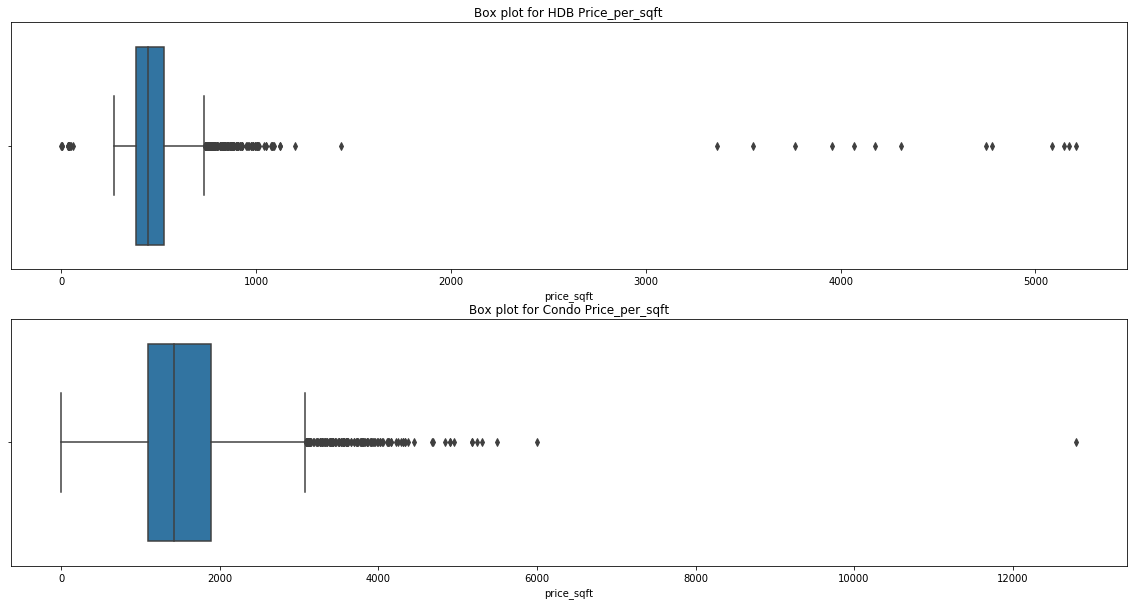

In [39]:
#box plot for significant variable "price_sqft"
f, axes = plt.subplots(2, 1,figsize=(20,10))

sns.boxplot(x='price_sqft', data=hdb, ax=axes[0])
axes[0].set_title("Box plot for HDB Price_per_sqft")
sns.boxplot(x='price_sqft', data=condo, ax=axes[1])
axes[1].set_title("Box plot for Condo Price_per_sqft")

Text(0.5, 1.0, 'Box plot for Condo Land_Area')

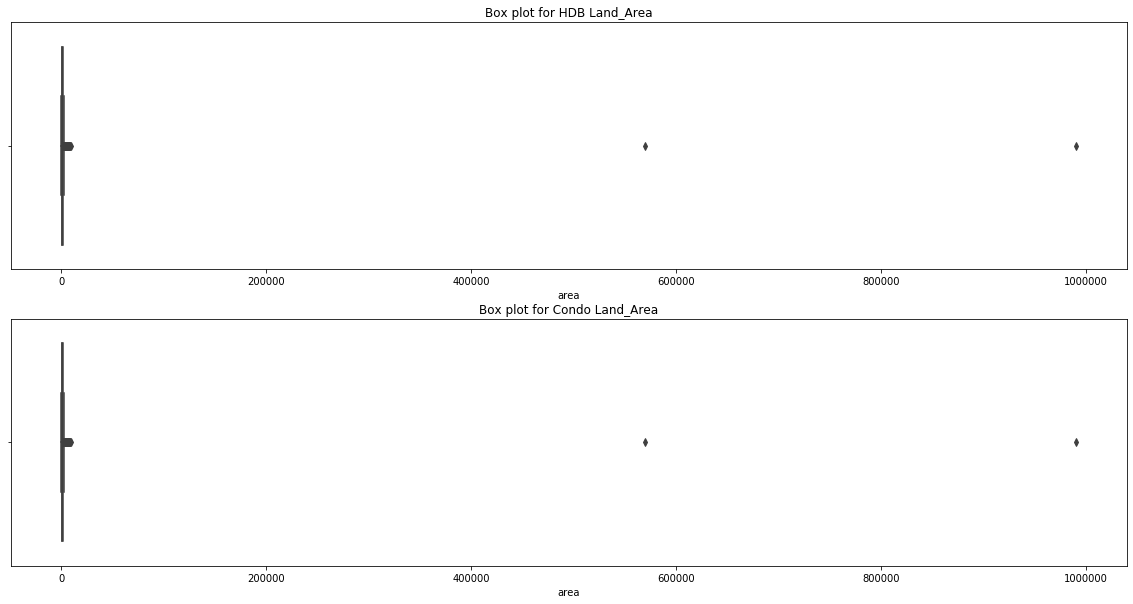

In [40]:
#box plot for significant variable "area"
f, axes = plt.subplots(2, 1,figsize=(20,10))

sns.boxplot(x='area', data=condo, ax=axes[0])
axes[0].set_title("Box plot for HDB Land_Area")
sns.boxplot(x='area', data=condo, ax=axes[1])
axes[1].set_title("Box plot for Condo Land_Area")

We removed outliers for variables like "area" and "price_sqft" as those values have great differences in the summary statistics.

In [41]:
hdb = outliers("area", hdb)
hdb = outliers("price_sqft", hdb)

condo = outliers("area", condo)
condo = outliers("price_sqft", condo)

print("The dimension of the HDB data is: ", hdb.shape)
print("The dimension of the Condo data is: ", condo.shape)


The dimension of the HDB data is:  (2426, 15)
The dimension of the Condo data is:  (3725, 15)


We plot the boxplots without the outliers.

Text(0.5, 1.0, 'Box plot for Condo Price_per_sqft')

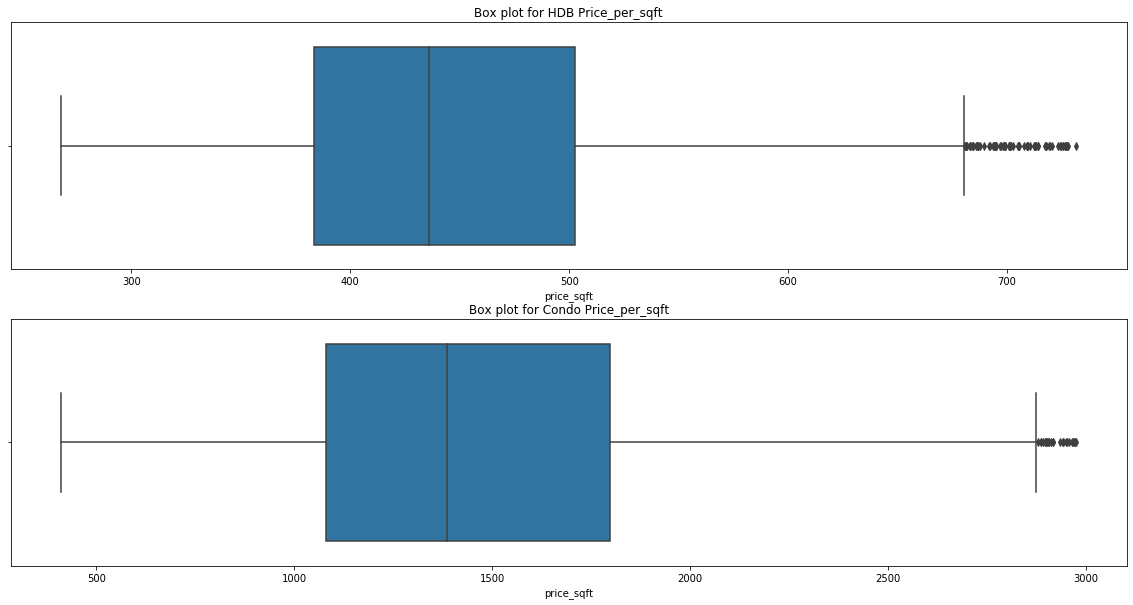

In [42]:
f, axes = plt.subplots(2, 1,figsize=(20,10))

sns.boxplot(x='price_sqft', data=hdb, ax=axes[0])
axes[0].set_title("Box plot for HDB Price_per_sqft")
sns.boxplot(x='price_sqft', data=condo, ax=axes[1])
axes[1].set_title("Box plot for Condo Price_per_sqft")

Text(0.5, 1.0, 'Box plot for Condo Land_Area')

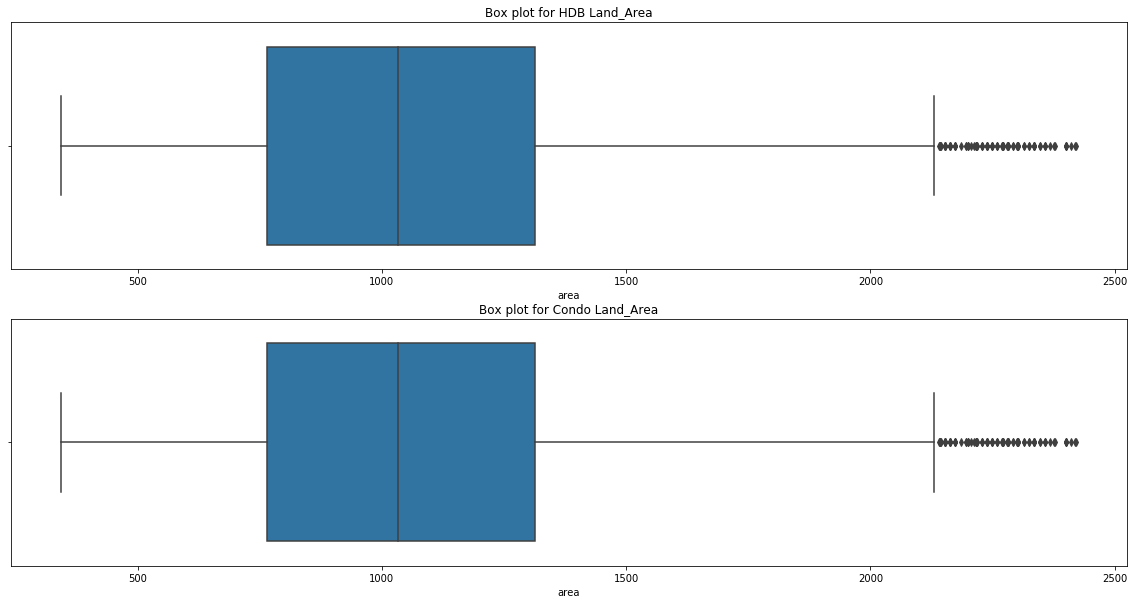

In [43]:
f, axes = plt.subplots(2, 1,figsize=(20,10))

sns.boxplot(x='area', data=condo, ax=axes[0])
axes[0].set_title("Box plot for HDB Land_Area")
sns.boxplot(x='area', data=condo, ax=axes[1])
axes[1].set_title("Box plot for Condo Land_Area")

### Investigation for other variables 

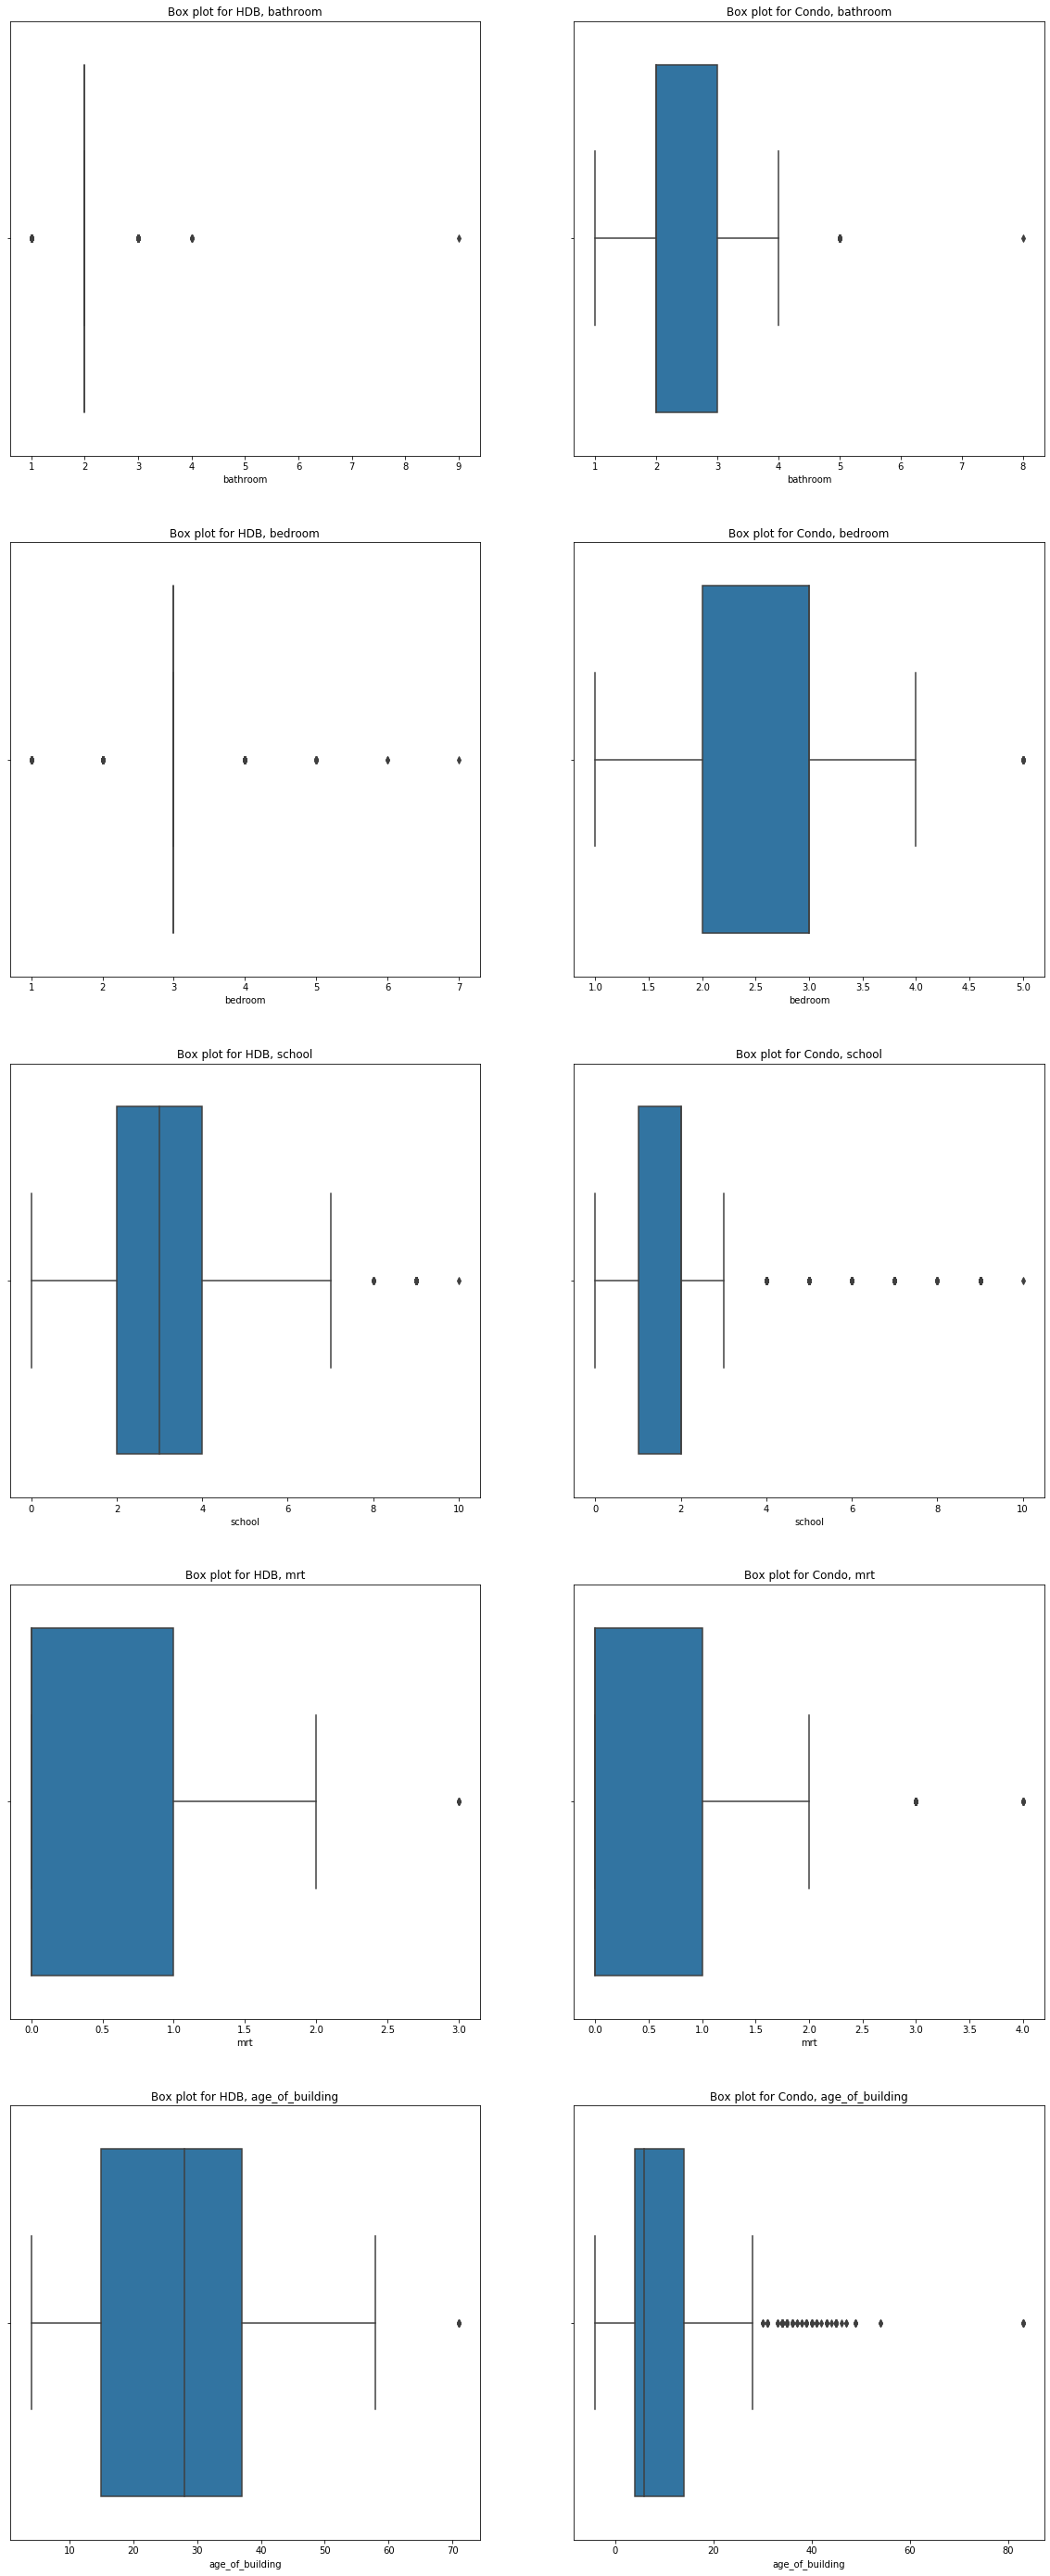

In [44]:
f, axes = plt.subplots(5, 2,figsize=(20,50))

to_plot = ['bathroom', 'bedroom', 'school', 'mrt', 'age_of_building']

for i in range(len(to_plot)):
    sns.boxplot(x=to_plot[i], data=hdb, ax=axes[i][0])
    axes[i][0].set_title("Box plot for HDB, {}".format(to_plot[i]))
    
    sns.boxplot(x=to_plot[i], data=condo, ax=axes[i][1])
    axes[i][1].set_title("Box plot for Condo, {}".format(to_plot[i]))
    
    i += 1

In [57]:
data = pd.concat([hdb,condo]) #combine the two datasets together 
print("The dimension of the listing data: ", data.shape)
data.head()

The dimension of the listing data:  (6151, 15)


area  bathroom  bedroom Type  latitude   longitude  school  mrt  \
0  1270.0         2        3  HDB  1.345383  103.746046     3.0  0.0   
1  1270.0         2        3  HDB  1.373571  103.851554     2.0  1.0   
2   990.0         2        2  HDB  1.315350  103.770855     2.0  0.0   
3  1400.0         2        3  HDB  1.448271  103.813344     4.0  0.0   
4   905.0         2        3  HDB  1.372392  103.889038     6.0  1.0   

   age_of_building  bathroom_area  bedroom_area  remaining_area  convenience  \
0               25          127.0       476.250         666.750          3.0   
1               40          127.0       476.250         666.750          3.0   
2               43           99.0       247.500         643.500          2.0   
3               21          140.0       525.000         735.000          4.0   
4               35           90.5       339.375         475.125          7.0   

   distance_from_central  price_sqft  
0              10.582454      429.92  
1               8.002258      533.86  
2               6.895952      459.60  
3              16.085163      371.43  
4               9.889811      386.74

In [58]:
data.to_csv('data/data_removed_outliers.csv', index=False)

### 7.2. Univariate Analysis <a name='uni'></a>
[Back to top](#Contents)<br>

In [59]:
data = pd.read_csv('data/data_removed_outliers.csv')

In [60]:
data.describe() #provide the descriptive statistics

area     bathroom      bedroom     latitude    longitude  \
count  6151.000000  6151.000000  6151.000000  6151.000000  6151.000000   
mean   1092.586571     2.107950     2.626565     1.345566   103.857973   
std     373.078806     0.726762     0.845381     0.043084     0.063993   
min     344.000000     1.000000     1.000000     1.239651   103.661390   
25%     818.000000     2.000000     2.000000     1.311579   103.820063   
50%    1055.000000     2.000000     3.000000     1.344132   103.857858   
75%    1302.000000     2.000000     3.000000     1.377166   103.903020   
max    2421.000000     9.000000     7.000000     1.457100   103.993110   

           school          mrt  age_of_building  bathroom_area  bedroom_area  \
count  6151.00000  6151.000000      6151.000000    6151.000000   6151.000000   
mean      2.40026     0.434401        16.497155     125.083507    388.281174   
std       1.88949     0.662746        13.895497      80.768301    223.534663   
min       0.00000     0.000000        -4.000000      17.200000     43.000000   
25%       1.00000     0.000000         6.000000      79.600000    209.750000   
50%       2.00000     0.000000        11.000000     108.700000    375.375000   
75%       3.00000     1.000000        25.000000     152.800000    488.250000   
max      10.00000     4.000000        83.000000     605.000000   1610.875000   

       remaining_area  convenience  distance_from_central   price_sqft  
count     6151.000000  6151.000000            6151.000000  6151.000000  
mean       579.221891     2.834661               9.053204  1070.507831  
std        128.092872     1.907233               4.590882   640.218693  
min        -46.025000     0.000000               0.246289   268.010000  
25%        496.600000     2.000000               4.507864   464.650000  
50%        565.200000     3.000000               9.899421   982.080000  
75%        643.500000     4.000000              12.984980  1504.740000  
max       1308.450000    11.000000              19.719809  2975.100000

Based on the above statistical analysis, the mean pricing per area for Singapore houses are around SGD <b>1070</b> per sqft and the median pricing are around SGD <b>982</b> per sqft. The reasons for the difference, might be attributed to higher Condo listings percentage compared to the HDB listings, hence the mean would be higher as Condo listings are generally more expensive than HDB.

Therefore, to understand the statistical analysis for the different features, we need to split the data according to the type of housing, namely HDB and Condo.

### Condo vs HDB

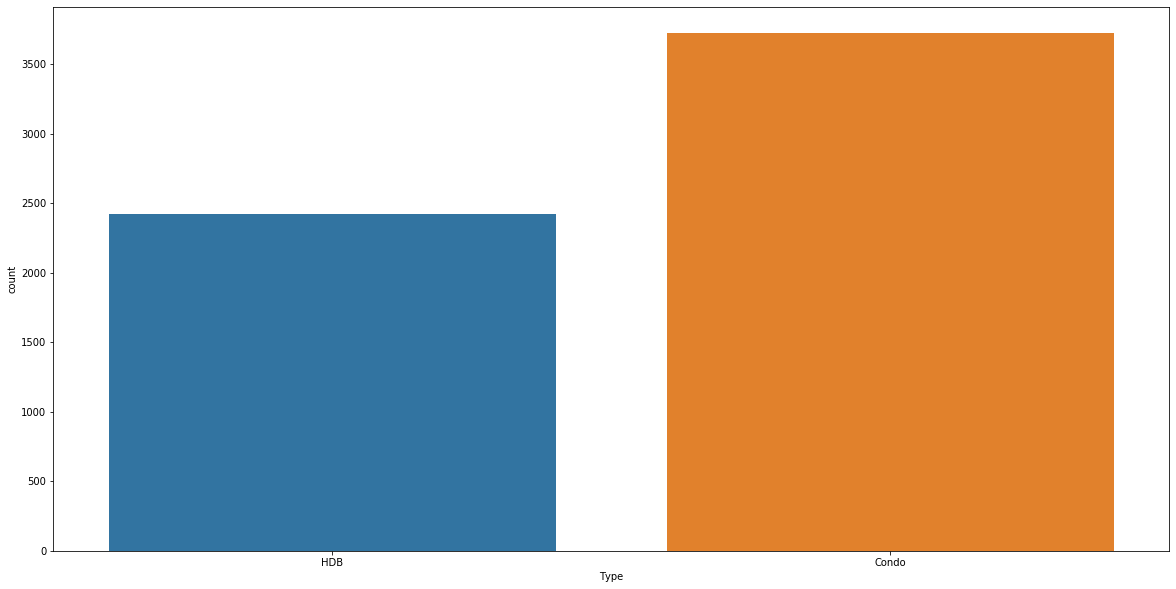

In [29]:
f,axes = plt.subplots(1,1,figsize=(20,10))
sns.countplot(x='Type', data=data, ax=axes)

In [30]:
No_of_housing = data.shape[0]
No_of_HDB_housing = np.sum(data["Type"]=="HDB")
No_of_Condo_housing = np.sum(data["Type"]=="Condo")
p_HDB = (No_of_HDB_housing/No_of_housing)*100
p_condo = (No_of_Condo_housing/No_of_housing)*100
print("The number of HDB housing is ", No_of_HDB_housing)
print("The percentage of HDB housing is", round(p_HDB,2), '%')
print()
print("The number of Condo housing is ", No_of_Condo_housing)
print("The percentage of Condo housing is", round(p_condo,2) , '%')

The number of HDB housing is  2426
The percentage of HDB housing is 39.44 %

The number of Condo housing is  3725
The percentage of Condo housing is 60.56 %


There seems to be 1.5x as many Condo listings as HDB listings.

### Analysis based on the Type of housing 

In [31]:
# Price analysis by house type
hdb = data[data['Type'] == 'HDB']
hdb.describe()

area     bathroom      bedroom     latitude    longitude  \
count  2426.000000  2426.000000  2426.000000  2426.000000  2426.000000   
mean   1100.823578     1.983924     2.944353     1.363906   103.857408   
std     267.251426     0.383351     0.613756     0.039416     0.068923   
min     430.000000     1.000000     1.000000     1.271745   103.686700   
25%     968.000000     2.000000     3.000000     1.336185   103.817860   
50%    1108.000000     2.000000     3.000000     1.364814   103.871923   
75%    1291.000000     2.000000     3.000000     1.392197   103.905940   
max    1841.000000     9.000000     7.000000     1.457100   103.987494   

            school          mrt  age_of_building  bathroom_area  bedroom_area  \
count  2426.000000  2426.000000      2426.000000    2426.000000   2426.000000   
mean      3.282358     0.304204        26.782770     111.823454    420.999382   
std       1.904264     0.500514        14.205742      42.456274    171.827749   
min       0.000000     0.000000         4.000000      21.500000     53.750000   
25%       2.000000     0.000000        15.000000      95.800000    355.125000   
50%       3.000000     0.000000        28.000000     110.800000    415.500000   
75%       4.000000     1.000000        37.000000     129.100000    488.250000   
max      10.000000     3.000000        71.000000     542.250000   1610.875000   

       remaining_area  convenience  distance_from_central   price_sqft  
count     2426.000000  2426.000000            2426.000000  2426.000000  
mean       568.000742     3.586562              10.744589   452.210602  
std         94.264815     1.972002               3.792426    93.088412  
min        -46.025000     0.000000               1.527764   268.010000  
25%        510.900000     2.000000               7.952996   383.600000  
50%        546.175000     3.000000              11.561879   435.860000  
75%        632.625000     5.000000              13.668488   502.462500  
max       1031.800000    10.000000              19.719809   731.500000

In [32]:
condo = data[data["Type"]=="Condo"]
condo.describe()

area     bathroom      bedroom     latitude    longitude  \
count  3725.000000  3725.000000  3725.000000  3725.000000  3725.000000   
mean   1087.222013     2.188725     2.419597     1.333622   103.858342   
std     428.111151     0.871793     0.909015     0.041133     0.060574   
min     344.000000     1.000000     1.000000     1.239651   103.661390   
25%     764.000000     2.000000     2.000000     1.301706   103.820780   
50%    1033.000000     2.000000     3.000000     1.325030   103.853696   
75%    1313.000000     3.000000     3.000000     1.363032   103.902381   
max    2421.000000     8.000000     5.000000     1.449767   103.993110   

            school          mrt  age_of_building  bathroom_area  bedroom_area  \
count  3725.000000  3725.000000      3725.000000    3725.000000   3725.000000   
mean      1.825772     0.519195         9.798389     133.719450    366.972617   
std       1.642442     0.737567         8.582224      97.006927    249.282382   
min       0.000000     0.000000        -4.000000      17.200000     43.000000   
25%       1.000000     0.000000         4.000000      71.000000    183.000000   
50%       2.000000     0.000000         6.000000     105.500000    327.000000   
75%       2.000000     1.000000        14.000000     185.700000    492.375000   
max      10.000000     4.000000        83.000000     605.000000   1406.250000   

       remaining_area  convenience  distance_from_central   price_sqft  
count     3725.000000  3725.000000            3725.000000  3725.000000  
mean       586.529946     2.344966               7.951647  1473.189463  
std        145.515916     1.693143               4.728981   509.915375  
min        218.400000     0.000000               0.246289   411.440000  
25%        488.400000     1.000000               3.529667  1080.140000  
50%        573.950000     2.000000               7.703393  1384.760000  
75%        659.300000     3.000000              11.827221  1797.600000  
max       1308.450000    11.000000              19.379355  2975.100000

<p>Based on the above statistical analysis, the mean pricing per sqft for HDB houses is SGD <b>452</b> per sqft and the median is SGD <b>435</b> per sqft.</p>
<p>Based on the above statistical analysis, the mean pricing for condo houses is SGD <b>1,473</b> per sqft and the median is SGD <b>1,384</b>. Based on the results, we conclude that both HDB and Condo has a great difference in pricing.</p>

<p>The year of construction is important for HDB, as it generally increases the later the years. For Condo, the year built seems to be noisy.</p>

### Price per Sqft

Text(0.5, 1.0, 'Price per sqft')

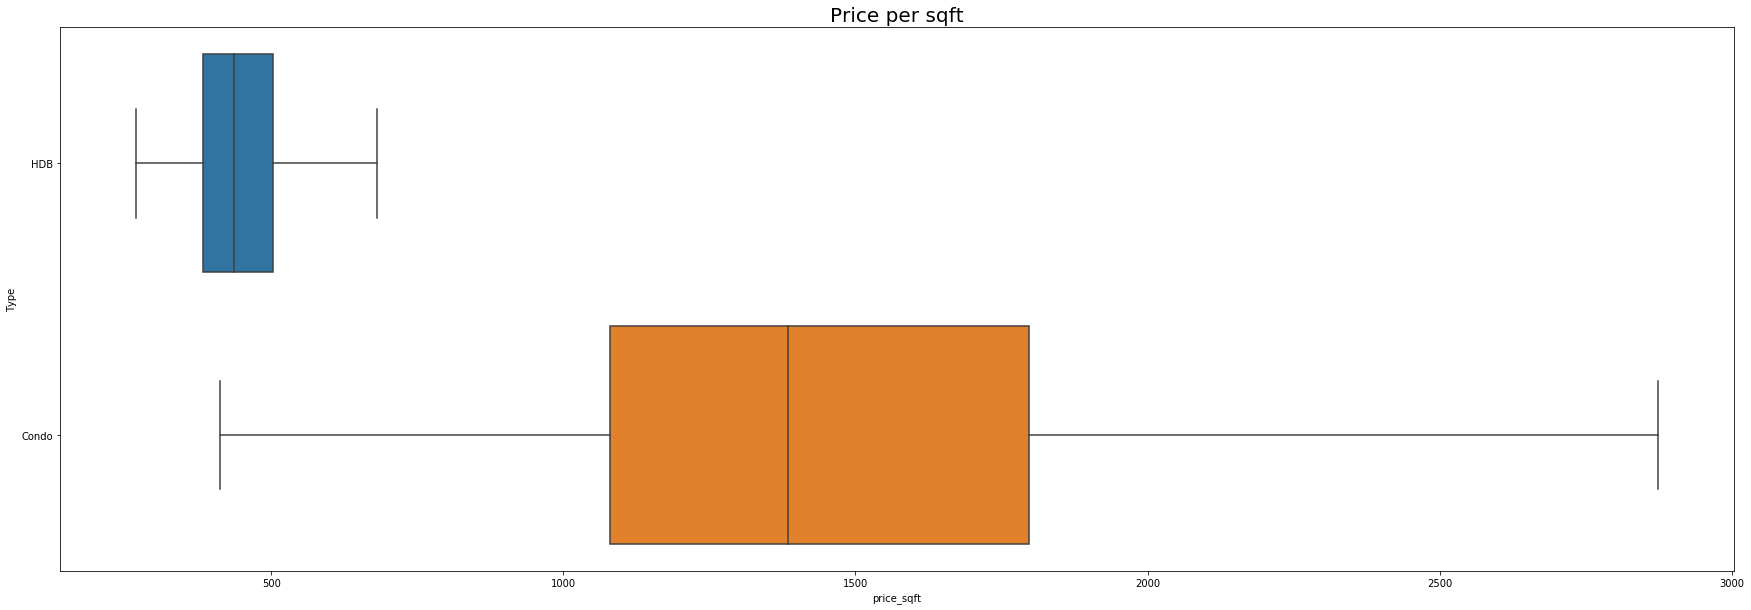

In [33]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
sns.boxplot(y='Type', x='price_sqft', data= data, showfliers = False, ax=ax)
plt.title('Price per sqft', fontdict ={'fontsize': 20})

### Area

Text(0.5, 1.0, 'Area of Apartment')

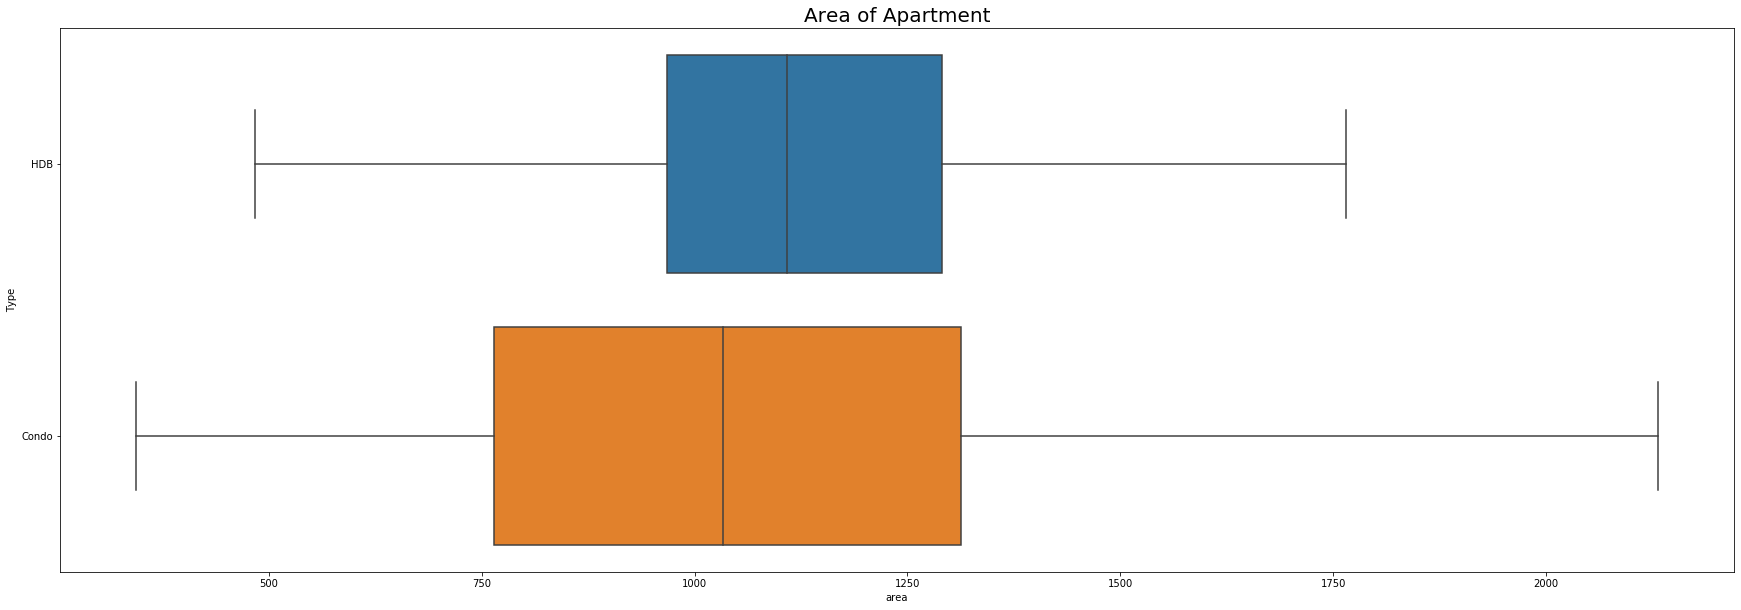

In [34]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
sns.boxplot(y='Type', x='area', data=data, showfliers = False,ax=ax)
plt.title('Area of Apartment', fontdict ={'fontsize': 20})

HDB apartments are valued much lower than Condo apartments. However, it seems that the area of a typical HDB apartment is very similar to that of a typical condominium apartment.

Text(0.5, 1.0, 'Area of Bathroom in Apartment')

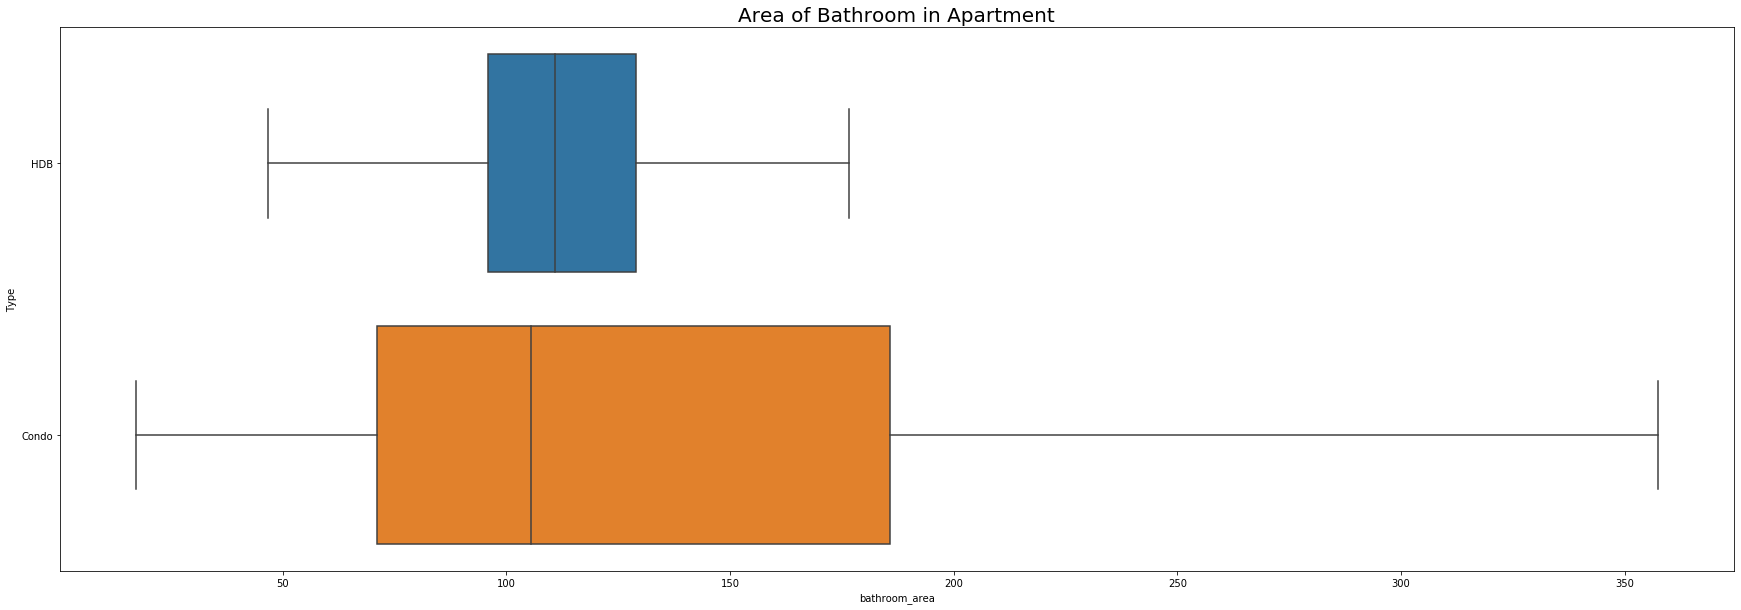

In [35]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
sns.boxplot(y='Type', x='bathroom_area', data=data, showfliers = False,ax=ax)
plt.title('Area of Bathroom in Apartment', fontdict ={'fontsize': 20})

Text(0.5, 1.0, 'Area of Bedroom in Apartment')

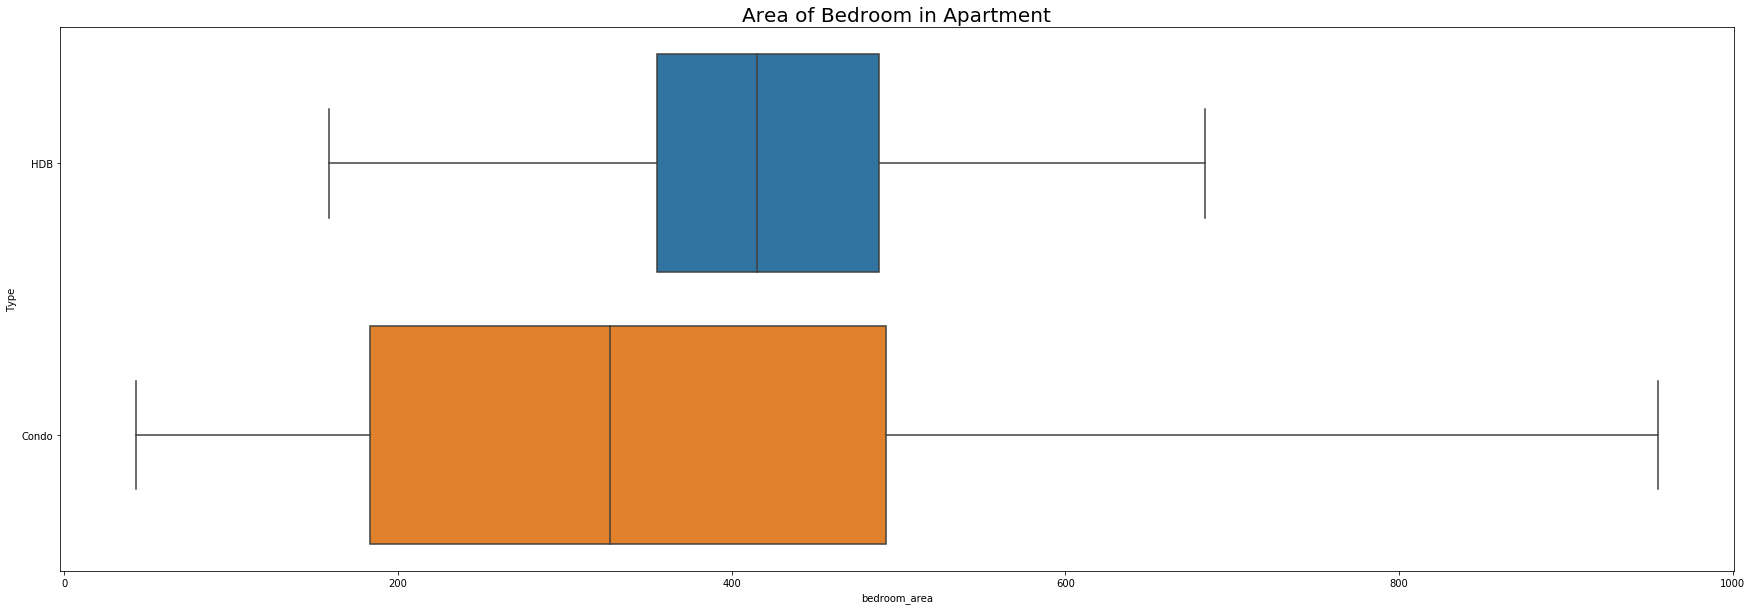

In [36]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
sns.boxplot(y='Type', x='bedroom_area', data=data, showfliers = False,ax=ax)
plt.title('Area of Bedroom in Apartment', fontdict ={'fontsize': 20})

Text(0.5, 1.0, 'Living Area in Apartment')

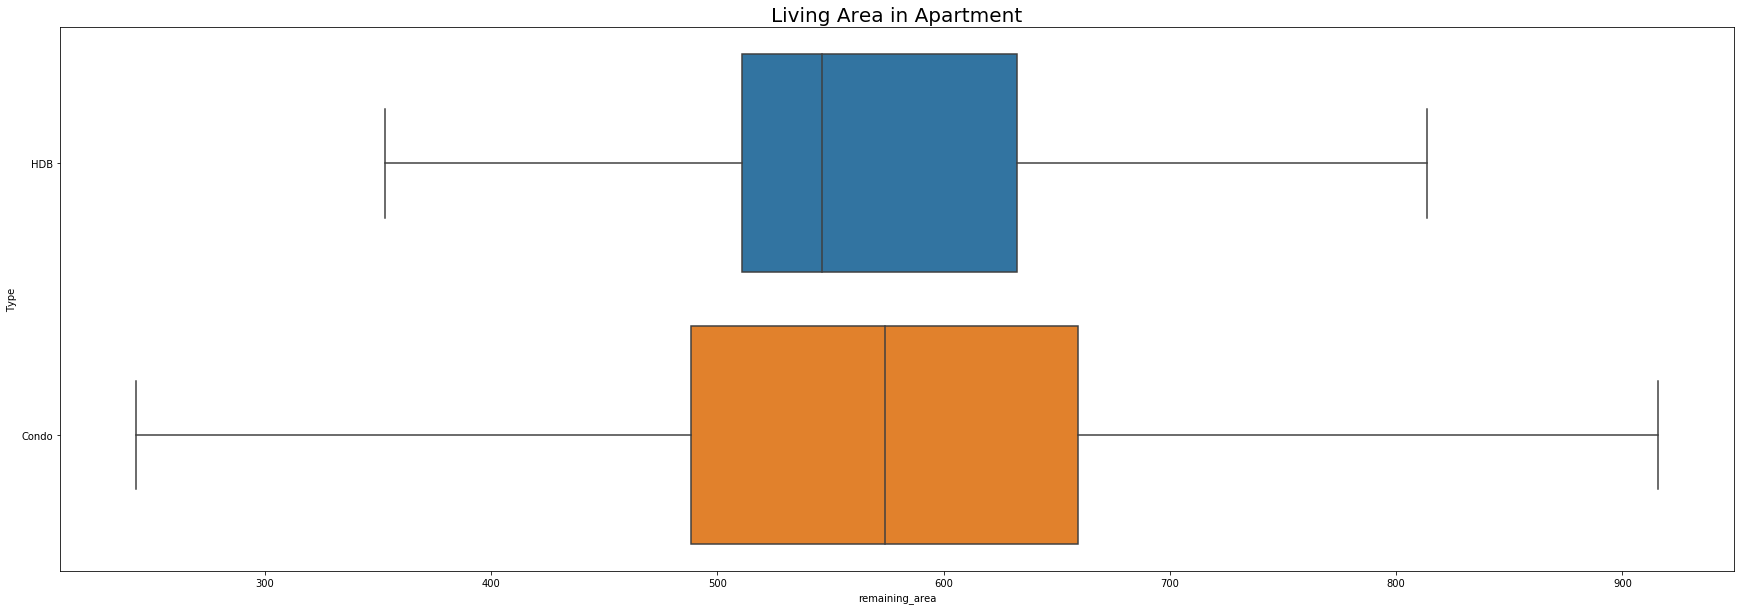

In [37]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
sns.boxplot(y='Type', x='remaining_area', data=data, showfliers = False,ax=ax)
plt.title('Living Area in Apartment', fontdict ={'fontsize': 20})

### Latitude & Longitude

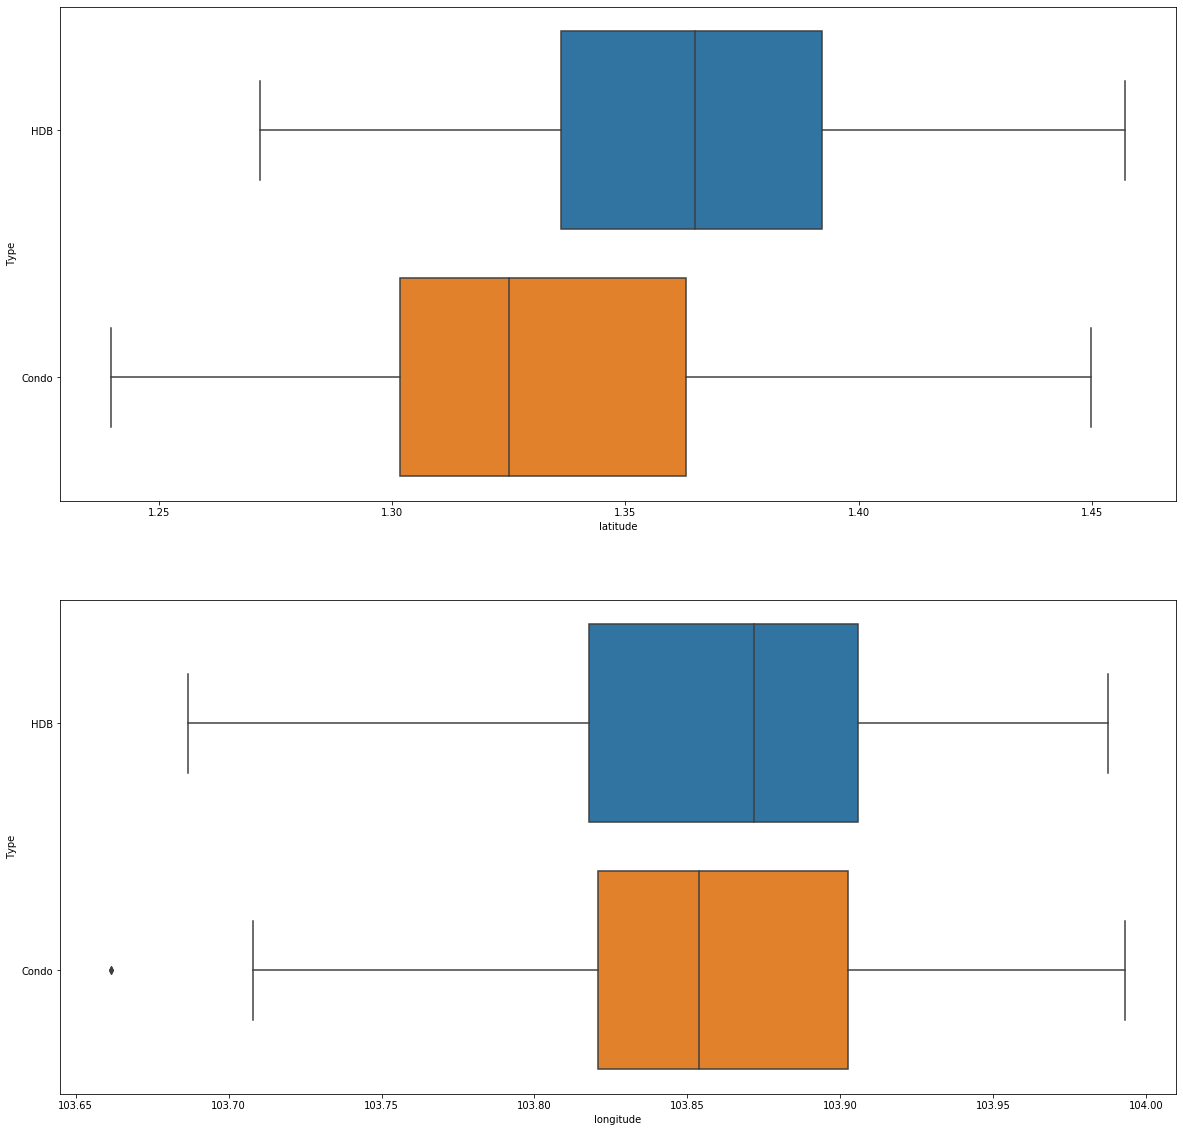

In [38]:
f, axes = plt.subplots(2,1, figsize=(20,20))
sns.boxplot(x='latitude', data=data, y='Type', ax=axes[0])
sns.boxplot(x='longitude', data=data, y='Type', ax=axes[1])

Based on the descriptive statistic, the mean for HDB and Condo latitude and longtitude is 1.363906 and 103.857408 and 1.333622 and 103.858342 respectively, with low standard error. This suggests that majority of the HDB housing are located around Ang Mo kio and Marymount area while majority of condo housing are located around Toa Payoh and Serangoon area. 

### Distance from Orchard (Central)

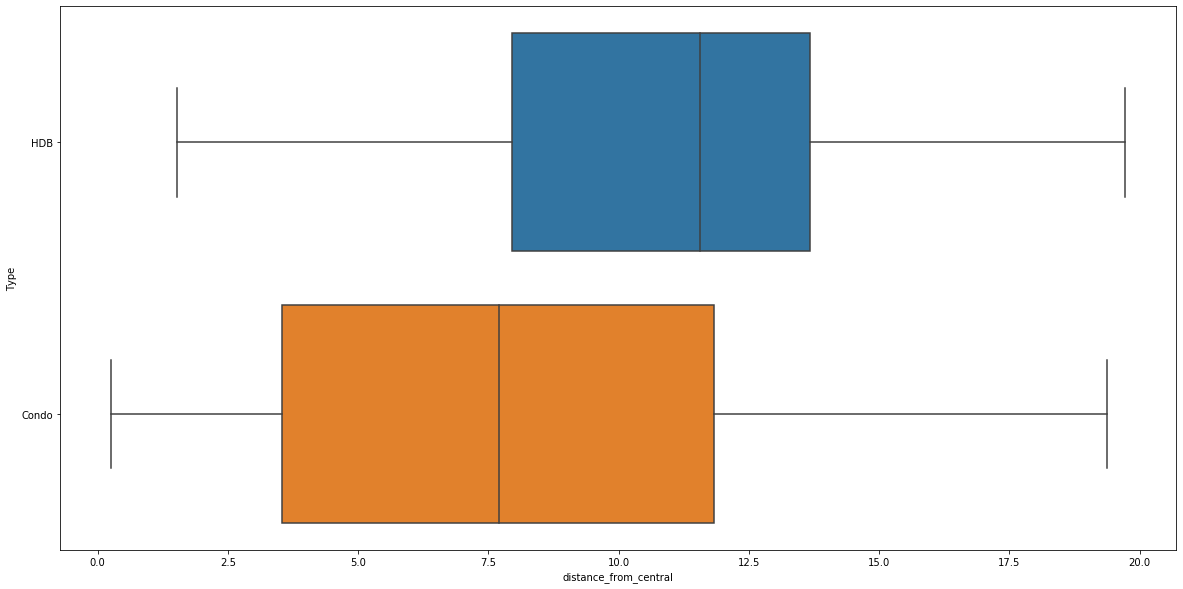

In [39]:
f, axes = plt.subplots(1,1, figsize=(20,10))
sns.boxplot(x='distance_from_central', data=data, y='Type', ax=axes)

The condominiums are nearer to the central area than HDBs.

### Age of Building

Text(0.5, 1.0, 'Distribution of Age, Condo')

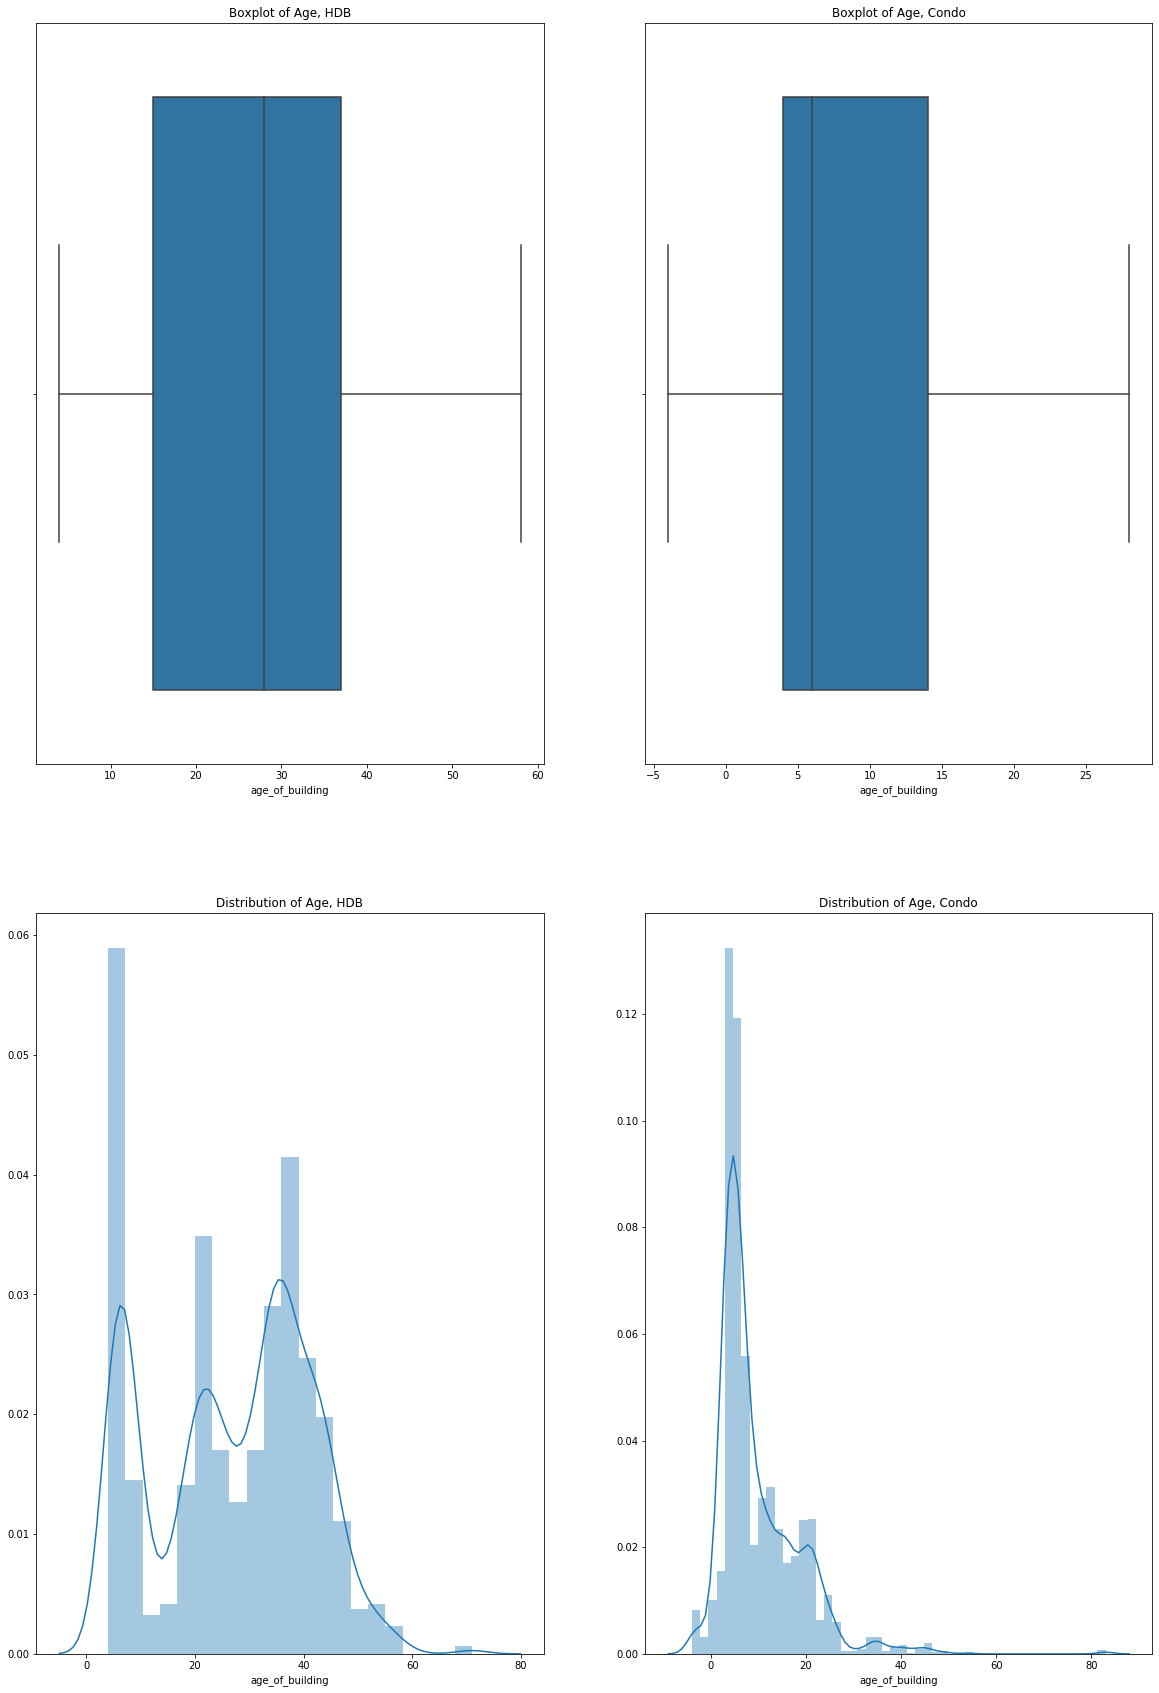

In [40]:
f,axes = plt.subplots(2,2, figsize=(20,30))

sns.boxplot(x='age_of_building', data=hdb, showfliers=False, ax=axes[0][0])
sns.boxplot(x='age_of_building', data=condo, showfliers=False, ax=axes[0][1])
sns.distplot(hdb['age_of_building'], ax=axes[1][0])
sns.distplot(condo['age_of_building'], ax=axes[1][1])

axes[0][0].set_title('Boxplot of Age, HDB')
axes[0][1].set_title('Boxplot of Age, Condo')
axes[1][0].set_title('Distribution of Age, HDB')
axes[1][1].set_title('Distribution of Age, Condo')

The condominium listings have relatively lower age than the HDB apartments.

### Discrete Features Analysis

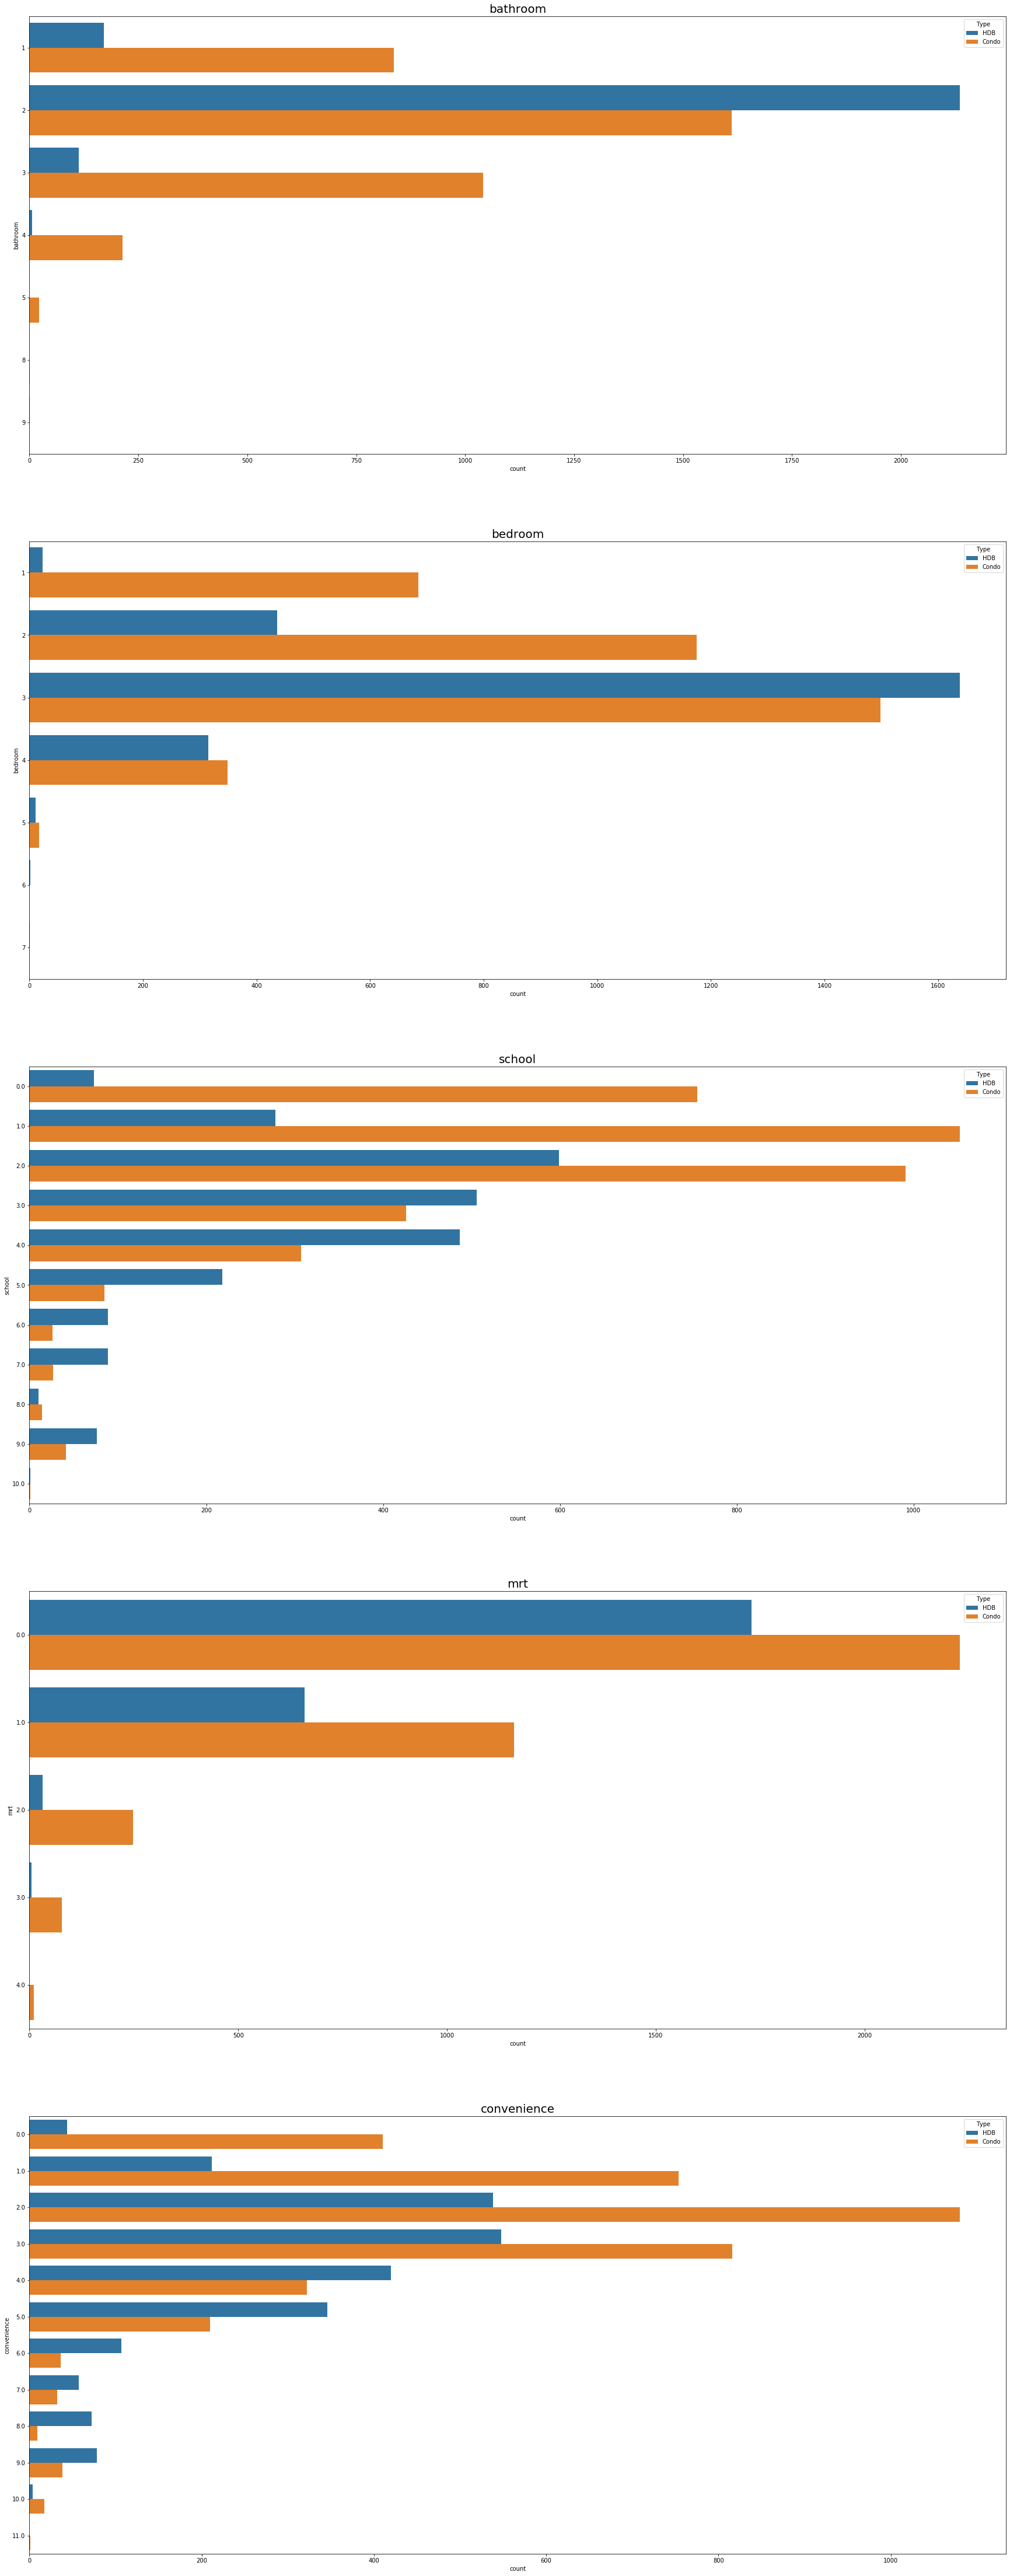

In [41]:
f,axes = plt.subplots(5,1,figsize=(30,80))
discrete = ['bathroom', 'bedroom', 'school', 'mrt', 'convenience']

for i in range(len(discrete)):
    sns.countplot(y=discrete[i], data=data, hue='Type', ax=axes[i])
    axes[i].set_title(discrete[i], fontdict ={'fontsize': 20})
    i += 1

<p>Almost all of the HDBs have two bathrooms, which is typical for 3-room apartments and above. However, the number of bathrooms seems to be normally distributed with mean of 2.</p>

<p>There seems to be similar number of HDB and condominium apartments with 3-5 bedrooms. However, for 2 bedrooms, there are significantly more condominiums. Therefore, the distribution of bedrooms for condo looks normal, and that of HDB has a sharp peak at 3 bedrooms.</p>

<p>Most condos are built near to 0-2 primary schools. For HDBs, the number of primary schools seems to be almost normally distributed with mean at 2, though with a slight skew to the right.</p>

<p>Many of the apartments are not built near an MRT station. Therefore, the distributions are skewed to the right. Many more condominiums than HDB are built near 2-4 MRT stations. This might be due to the close proximity of condo to the central area, which contains more stations in an area.</p>

### 7.3 Bivariate Analysis <a name='bi'></a>
[Back to top](#Contents)<br>

### Listing Distribution in Singapore 
The geographical distribution of the house listings is shown below: 

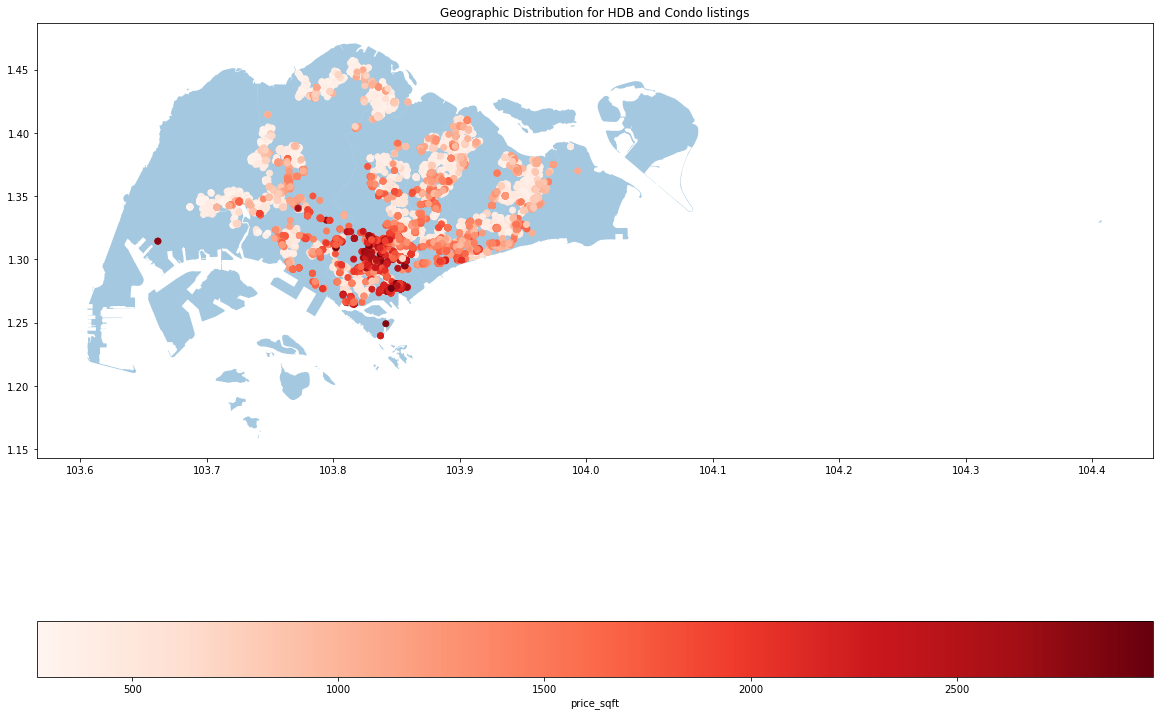

In [42]:
#Extract the coordinates for each listing 
house_geo = data[['price_sqft', 'Type','latitude', 'longitude']]

#Form new dataframe for geo_coordinates 
gdf = geopandas.GeoDataFrame(house_geo, geometry=geopandas.points_from_xy(house_geo.longitude, house_geo.latitude))

#Input the base map for Singapore
street_map = geopandas.read_file('igismap/poly.shp')

#plot the geographical distribution map 
fig,ax = plt.subplots(figsize=(20,20))
street_map.plot(ax=ax, alpha = 0.4, markersize=5) #plot the base map 
ax.set_title('Geographic Distribution for HDB and Condo listings')
gdf.plot(column='price_sqft', ax=ax,legend=True,legend_kwds={'label': "price_sqft",'orientation': "horizontal"},cmap='Reds') #plot the listing coordinates to the Singapore map

From the graph above, we observed that the housing price tend to increase when houses are located nearer to central/downtown region. The value of the house tends to be on the lower end when it is located outside the central region. 

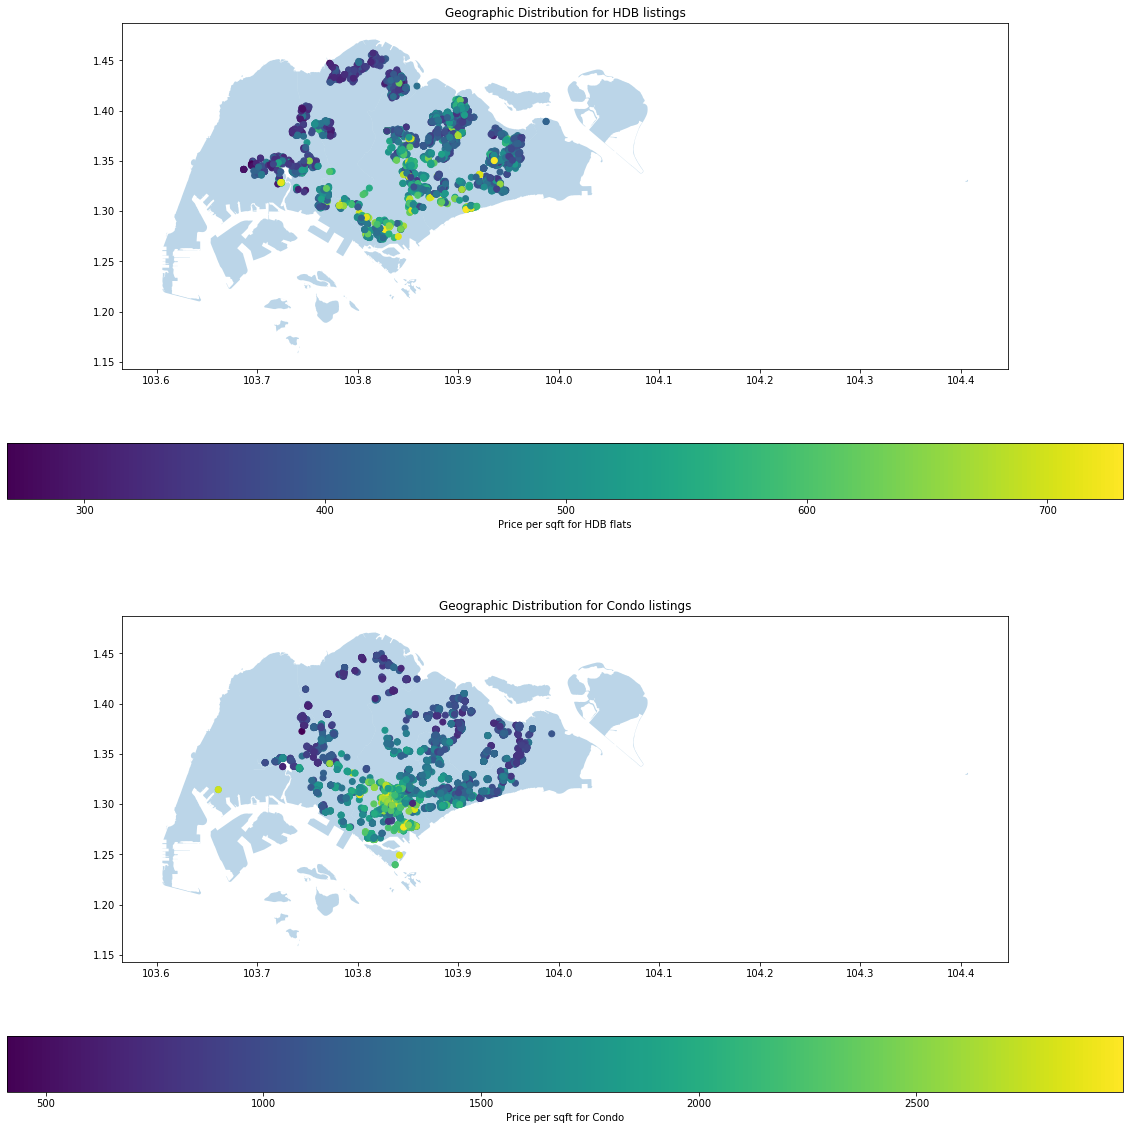

In [43]:
#plot the geographical map respective to their property 
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,20), sharey=True)
#plot HDB location 
street_map.plot(ax=ax1, alpha = 0.3)
ax1.set_title('Geographic Distribution for HDB listings')
gdf[gdf["Type"]=="HDB"].plot(column='price_sqft', ax=ax1, legend=True,legend_kwds={'label': "Price per sqft for HDB flats",'orientation': "horizontal"})

#plot Condo location 
street_map.plot(ax=ax2, alpha = 0.3)
ax2.set_title('Geographic Distribution for Condo listings')
gdf[gdf["Type"]=="Condo"].plot(column='price_sqft', ax=ax2, legend=True,legend_kwds={'label': "Price per sqft for Condo",'orientation': "horizontal"})


From the HDB geographic distribution, we observed that majority of the listings are outside of the central areas. For regions that are near central, the housing price tends to be at the upper-end of the scale.

To some extent, some condo listings are in central area and housing price are tend to be more expensive compared to other regions. 

### Scatterplot Matrix and Correlation heatmap

The scatterplot matrix provides a overview on the relationship between each variables. By examing the scatterplot matrix, we can derive if there is any correlation between each predictor variables and response variable to understand the significant of each variable in the pricing model. 

In addition, we would be able to examine the correlation between each variables to understand if all predictor variables are independent from each other. 

Text(0.5, 0.98, 'Pair Plot of housing data')

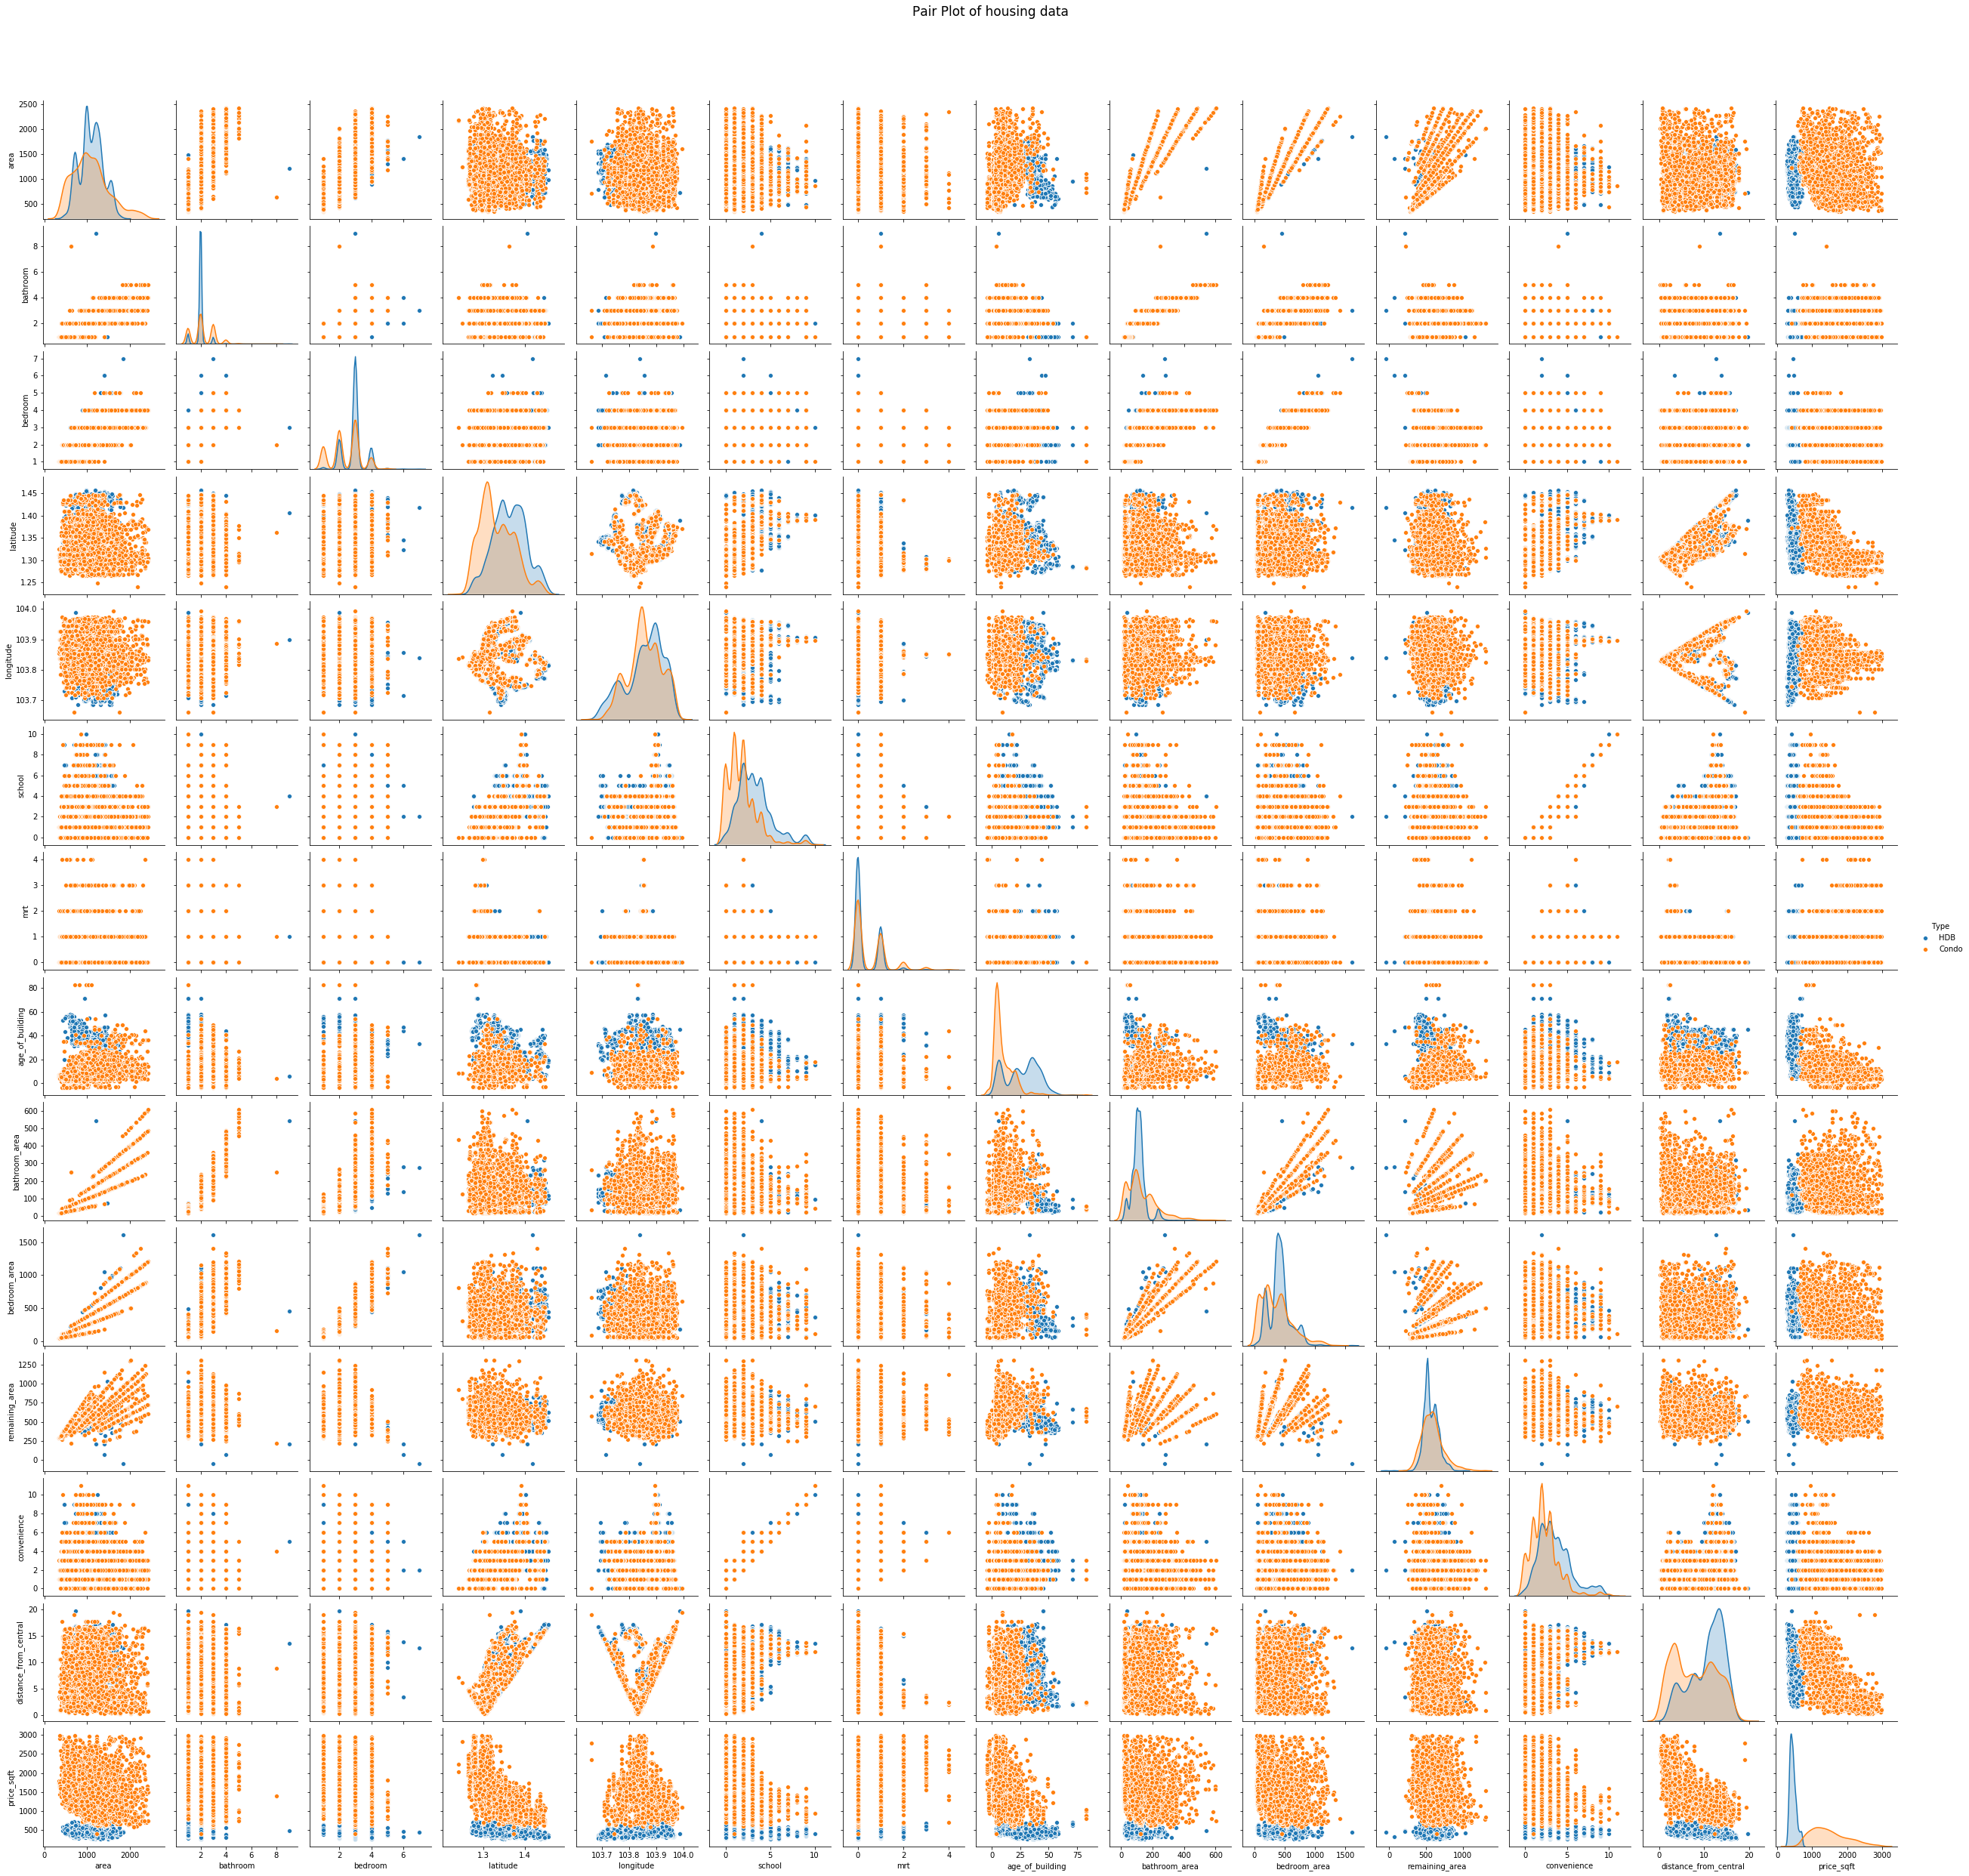

In [48]:
sns.pairplot(data, hue= 'Type') #create the scatterplot matrix and seperate by the type of housing 
plt.subplots_adjust(top=0.93)
plt.suptitle('Pair Plot of housing data', size = 17)

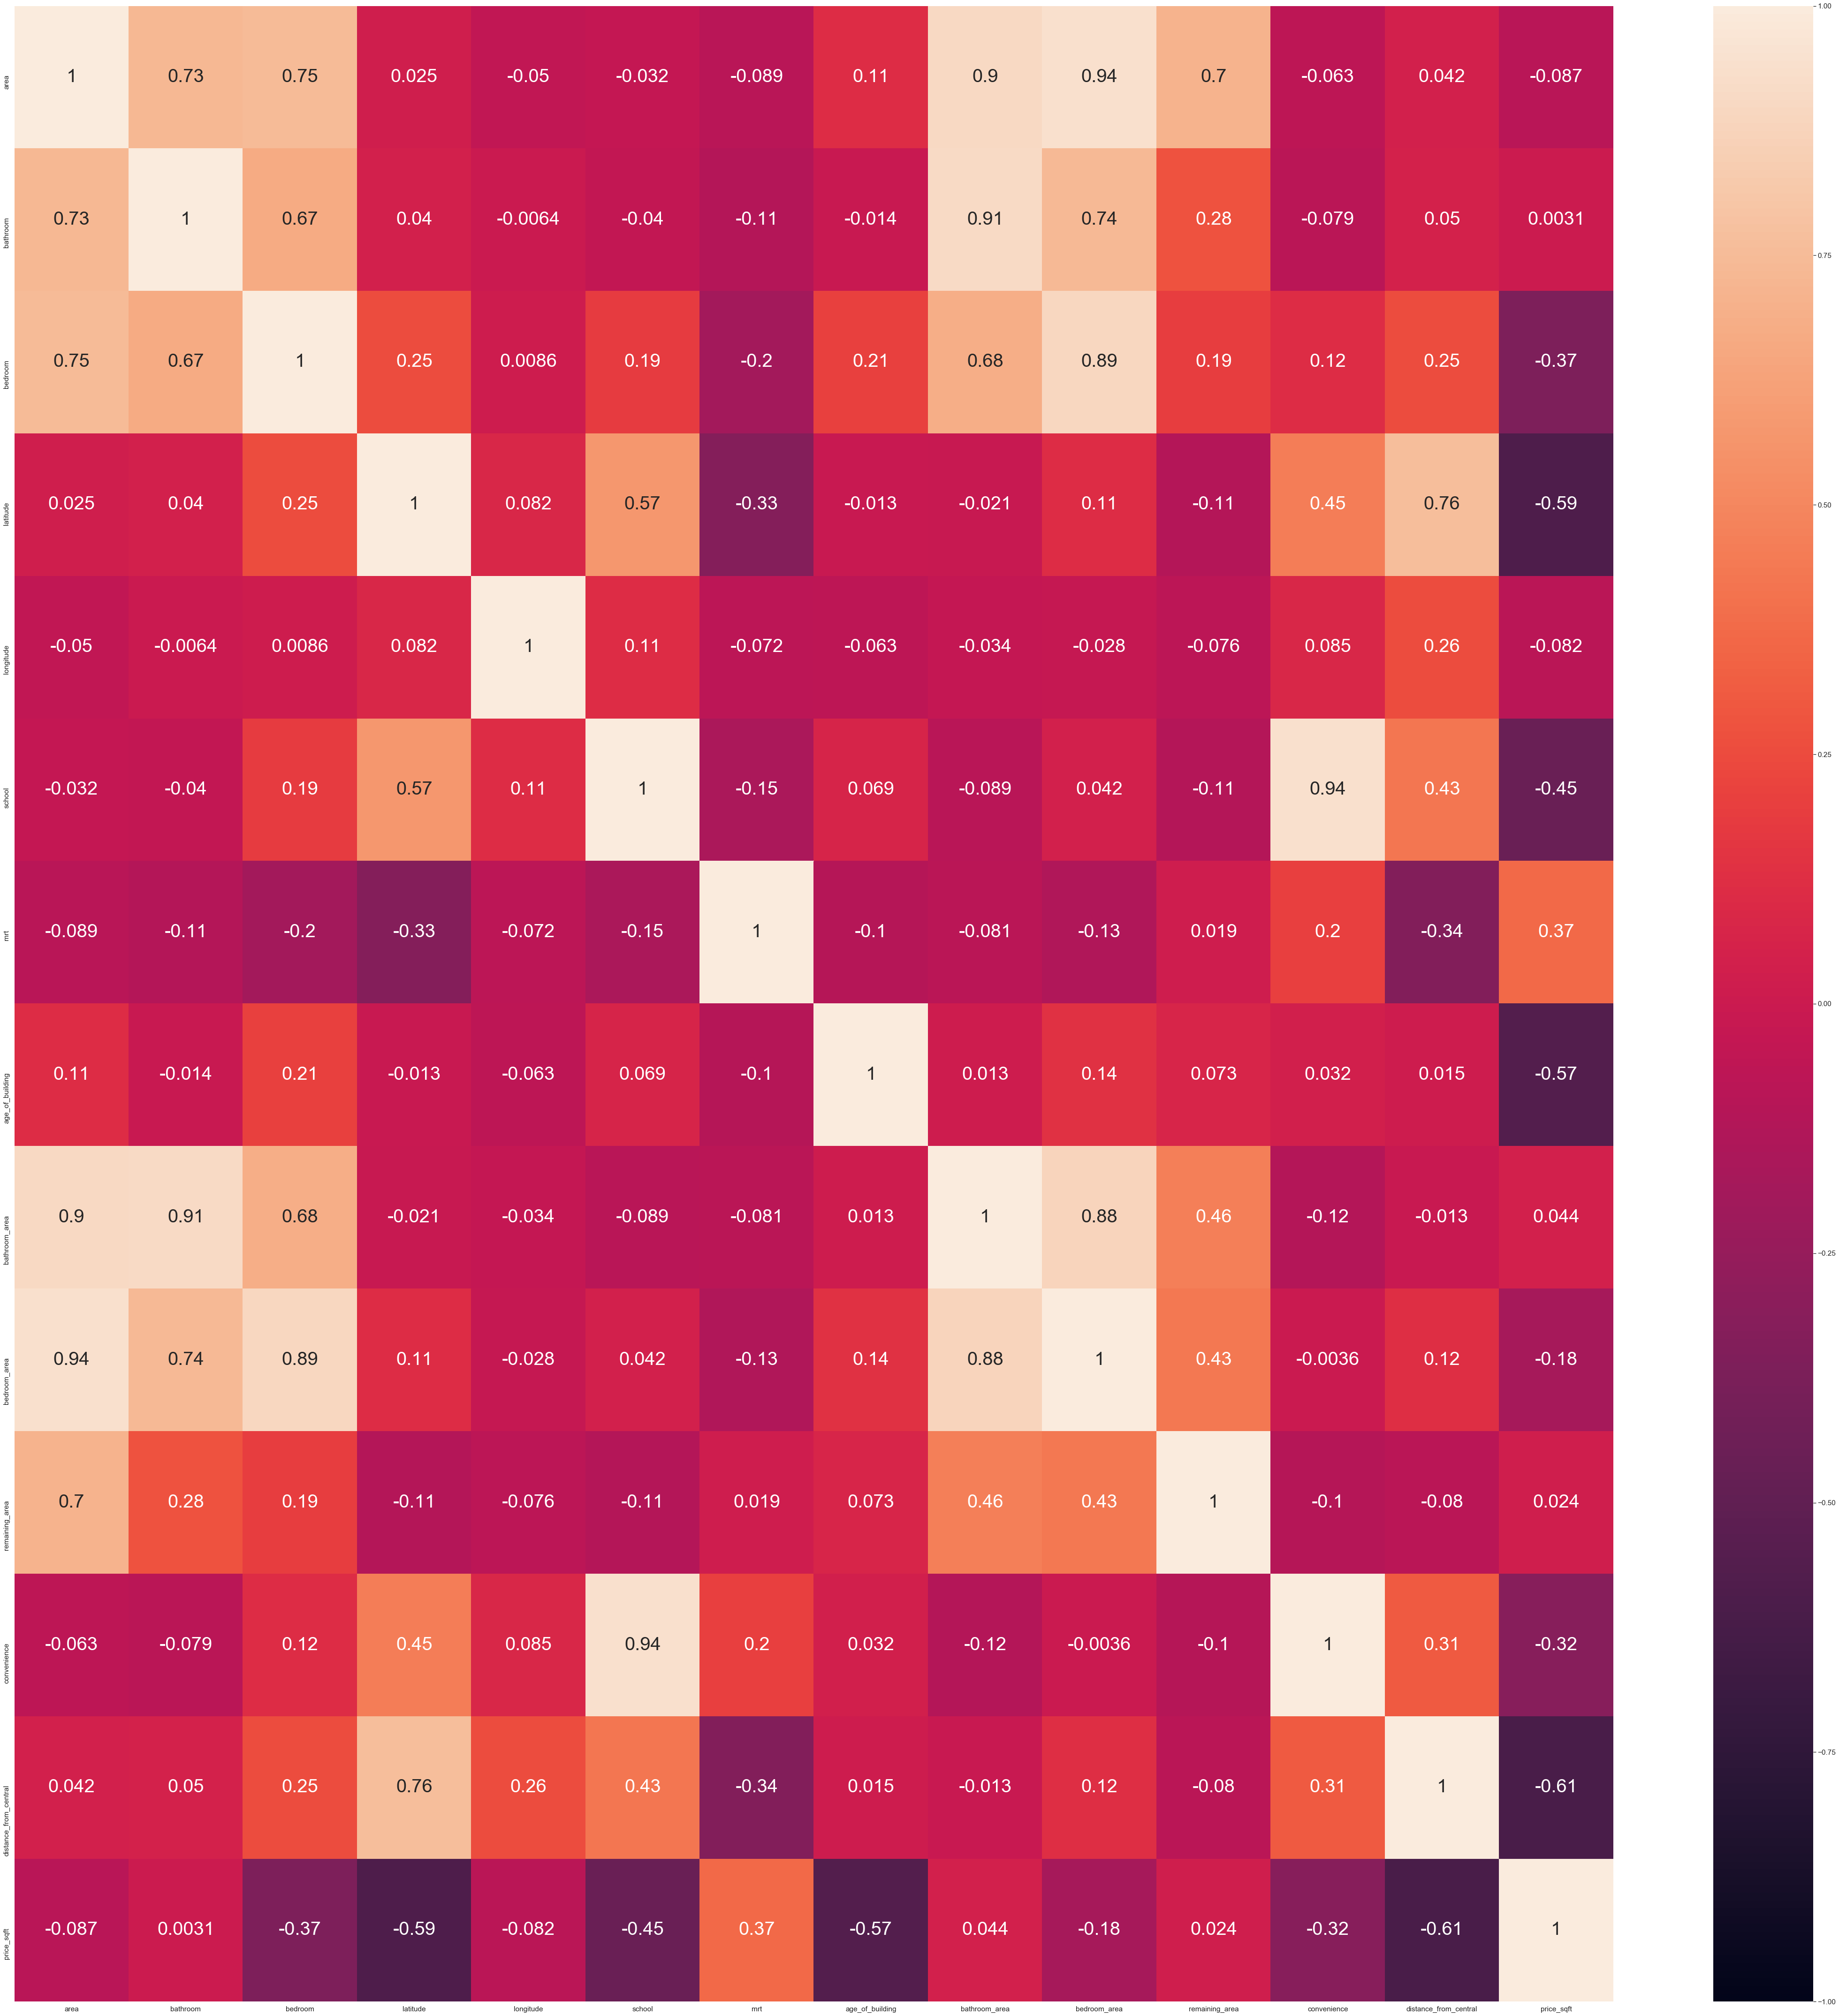

In [55]:
f, ax1 = plt.subplots(1,1,figsize=(60,60))
sns.set(font_scale=1.4)
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 40})
bottom, top = ax1.get_ylim() #to obtain the y values for the top and bottom
ax1.set_ylim(bottom + 0.5, top - 0.5) 
plt.tight_layout()

In [50]:
data.corr()

area  bathroom   bedroom  latitude  longitude  \
area                   1.000000  0.732408  0.749978  0.024523  -0.050259   
bathroom               0.732408  1.000000  0.666920  0.039885  -0.006418   
bedroom                0.749978  0.666920  1.000000  0.250740   0.008648   
latitude               0.024523  0.039885  0.250740  1.000000   0.082240   
longitude             -0.050259 -0.006418  0.008648  0.082240   1.000000   
school                -0.031758 -0.040232  0.186020  0.573464   0.111583   
mrt                   -0.089426 -0.113916 -0.195079 -0.328355  -0.072367   
age_of_building        0.111142 -0.014267  0.207435 -0.012881  -0.062592   
bathroom_area          0.903481  0.907799  0.683781 -0.021398  -0.034065   
bedroom_area           0.938979  0.736164  0.893258  0.111718  -0.027932   
remaining_area         0.704270  0.276099  0.194381 -0.110042  -0.076160   
convenience           -0.062538 -0.079443  0.116502  0.454028   0.085398   
distance_from_central  0.042493  0.049662  0.252558  0.761382   0.255448   
price_sqft            -0.087298  0.003060 -0.365677 -0.592641  -0.081581   

                         school       mrt  age_of_building  bathroom_area  \
area                  -0.031758 -0.089426         0.111142       0.903481   
bathroom              -0.040232 -0.113916        -0.014267       0.907799   
bedroom                0.186020 -0.195079         0.207435       0.683781   
latitude               0.573464 -0.328355        -0.012881      -0.021398   
longitude              0.111583 -0.072367        -0.062592      -0.034065   
school                 1.000000 -0.148480         0.068706      -0.089105   
mrt                   -0.148480  1.000000        -0.103562      -0.080982   
age_of_building        0.068706 -0.103562         1.000000       0.013319   
bathroom_area         -0.089105 -0.080982         0.013319       1.000000   
bedroom_area           0.042258 -0.130758         0.138589       0.880445   
remaining_area        -0.110057  0.018788         0.073459       0.464439   
convenience            0.939102  0.200393         0.032080      -0.116416   
distance_from_central  0.427488 -0.337779         0.015280      -0.012751   
price_sqft            -0.453556  0.372050        -0.568907       0.044133   

                       bedroom_area  remaining_area  convenience  \
area                       0.938979        0.704270    -0.062538   
bathroom                   0.736164        0.276099    -0.079443   
bedroom                    0.893258        0.194381     0.116502   
latitude                   0.111718       -0.110042     0.454028   
longitude                 -0.027932       -0.076160     0.085398   
school                     0.042258       -0.110057     0.939102   
mrt                       -0.130758        0.018788     0.200393   
age_of_building            0.138589        0.073459     0.032080   
bathroom_area              0.880445        0.464439    -0.116416   
bedroom_area               1.000000        0.434578    -0.003572   
remaining_area             0.434578        1.000000    -0.102505   
convenience               -0.003572       -0.102505     1.000000   
distance_from_central      0.121547       -0.080308     0.306136   
price_sqft                -0.175137        0.023543    -0.320053   

                       distance_from_central  price_sqft  
area                                0.042493   -0.087298  
bathroom                            0.049662    0.003060  
bedroom                             0.252558   -0.365677  
latitude                            0.761382   -0.592641  
longitude                           0.255448   -0.081581  
school                              0.427488   -0.453556  
mrt                                -0.337779    0.372050  
age_of_building                     0.015280   -0.568907  
bathroom_area                      -0.012751    0.044133  
bedroom_area                        0.121547   -0.175137  
remaining_area                     -0.080308    0.023543  
c

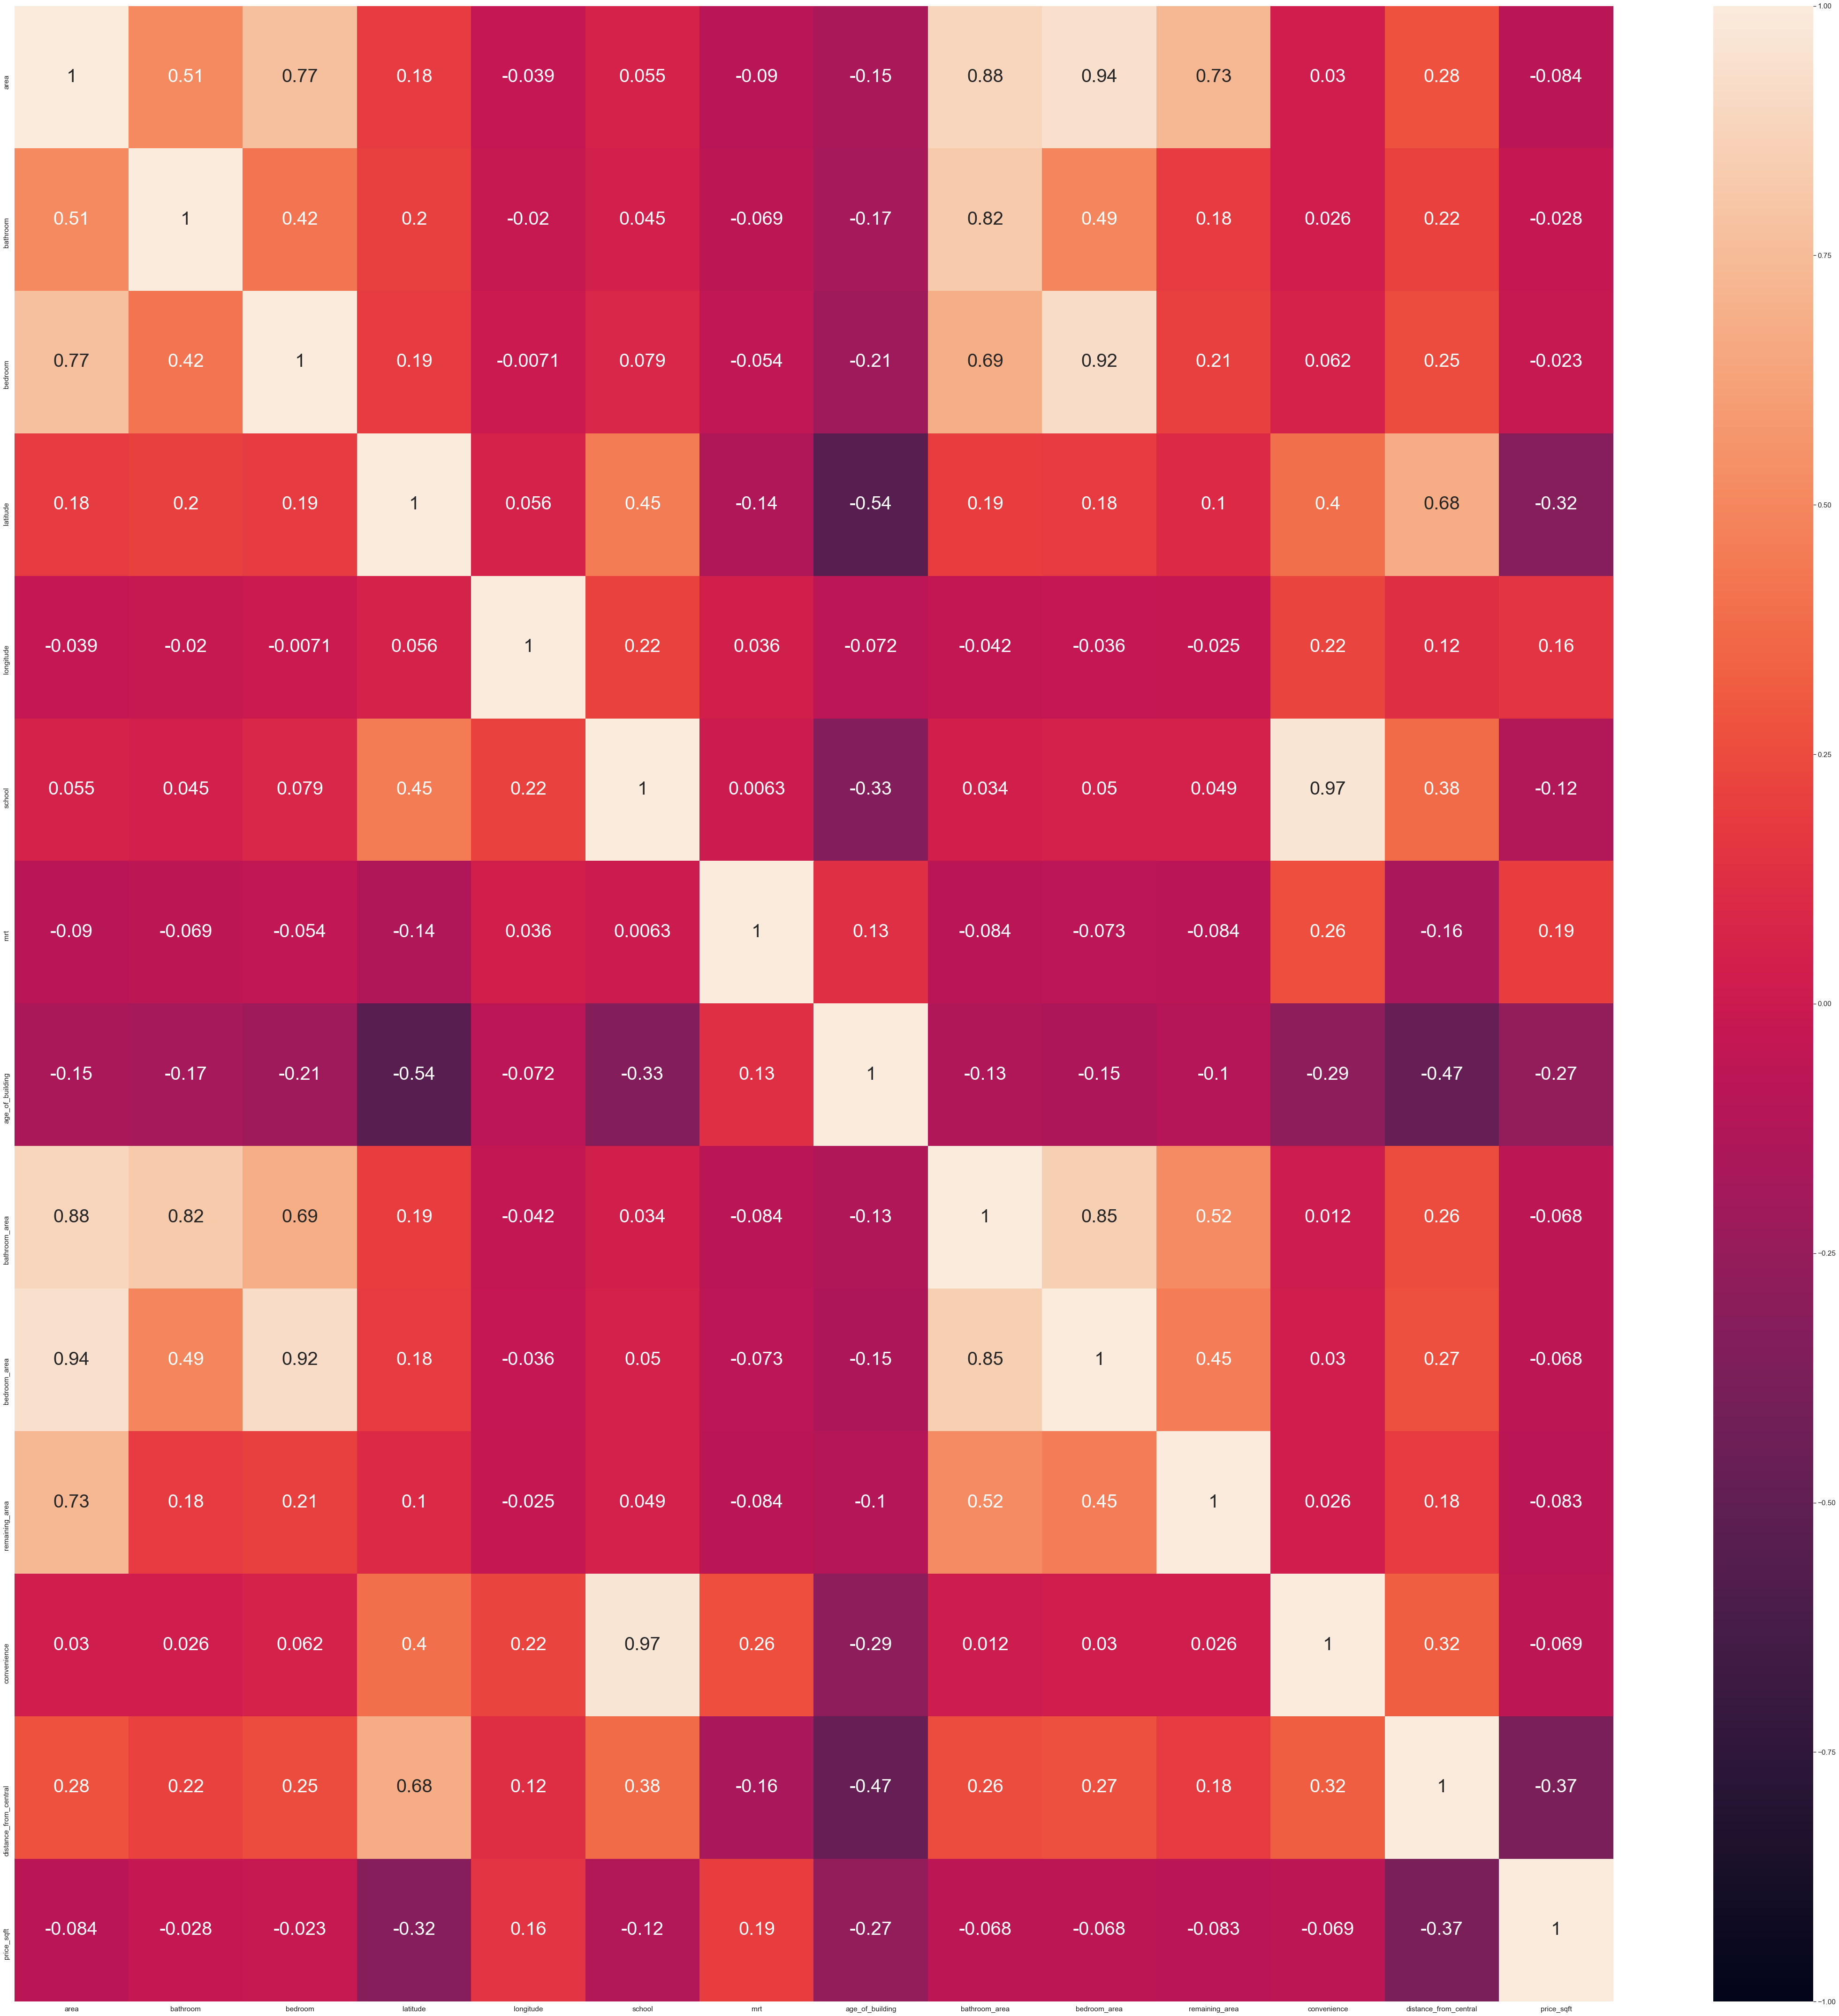

In [56]:
f, ax1 = plt.subplots(1,1,figsize=(60,60))
sns.set(font_scale=1.4)
sns.heatmap(hdb.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 40})
bottom, top = ax1.get_ylim() #to obtain the y values for the top and bottom
ax1.set_ylim(bottom + 0.5, top - 0.5) 
plt.tight_layout()

In [52]:
hdb.corr()

area  bathroom   bedroom  latitude  longitude  \
area                   1.000000  0.512833  0.773252  0.183991  -0.038509   
bathroom               0.512833  1.000000  0.420339  0.198767  -0.019503   
bedroom                0.773252  0.420339  1.000000  0.186621  -0.007131   
latitude               0.183991  0.198767  0.186621  1.000000   0.056366   
longitude             -0.038509 -0.019503 -0.007131  0.056366   1.000000   
school                 0.054886  0.044633  0.078723  0.447460   0.217582   
mrt                   -0.089645 -0.069067 -0.053605 -0.138080   0.035649   
age_of_building       -0.150373 -0.172381 -0.206181 -0.543490  -0.072206   
bathroom_area          0.884708  0.823501  0.685126  0.192817  -0.042051   
bedroom_area           0.937668  0.493630  0.920629  0.183569  -0.035853   
remaining_area         0.727448  0.183241  0.205541  0.100180  -0.024885   
convenience            0.030248  0.025570  0.062413  0.397044   0.219156   
distance_from_central  0.279376  0.217409  0.251245  0.678819   0.120985   
price_sqft            -0.084130 -0.027698 -0.023325 -0.322707   0.155194   

                         school       mrt  age_of_building  bathroom_area  \
area                   0.054886 -0.089645        -0.150373       0.884708   
bathroom               0.044633 -0.069067        -0.172381       0.823501   
bedroom                0.078723 -0.053605        -0.206181       0.685126   
latitude               0.447460 -0.138080        -0.543490       0.192817   
longitude              0.217582  0.035649        -0.072206      -0.042051   
school                 1.000000  0.006325        -0.328693       0.034010   
mrt                    0.006325  1.000000         0.127554      -0.083817   
age_of_building       -0.328693  0.127554         1.000000      -0.130977   
bathroom_area          0.034010 -0.083817        -0.130977       1.000000   
bedroom_area           0.049884 -0.072812        -0.145787       0.845049   
remaining_area         0.049359 -0.083681        -0.101590       0.517480   
convenience            0.967255  0.259918        -0.285028       0.011568   
distance_from_central  0.376046 -0.164894        -0.472894       0.255227   
price_sqft            -0.121622  0.192716        -0.265479      -0.068162   

                       bedroom_area  remaining_area  convenience  \
area                       0.937668        0.727448     0.030248   
bathroom                   0.493630        0.183241     0.025570   
bedroom                    0.920629        0.205541     0.062413   
latitude                   0.183569        0.100180     0.397044   
longitude                 -0.035853       -0.024885     0.219156   
school                     0.049884        0.049359     0.967255   
mrt                       -0.072812       -0.083681     0.259918   
age_of_building           -0.145787       -0.101590    -0.285028   
bathroom_area              0.845049        0.517480     0.011568   
bedroom_area               1.000000        0.454969     0.029690   
remaining_area             0.454969        1.000000     0.026425   
convenience                0.029690        0.026425     1.000000   
distance_from_central      0.270478        0.184077     0.321277   
price_sqft                -0.068362       -0.083207    -0.068531   

                       distance_from_central  price_sqft  
area                                0.279376   -0.084130  
bathroom                            0.217409   -0.027698  
bedroom                             0.251245   -0.023325  
latitude                            0.678819   -0.322707  
longitude                           0.120985    0.155194  
school                              0.376046   -0.121622  
mrt                                -0.164894    0.192716  
age_of_building                    -0.472894   -0.265479  
bathroom_area                       0.255227   -0.068162  
bedroom_area                        0.270478   -0.068362  
remaining_area                      0.184077   -0.083207  
c

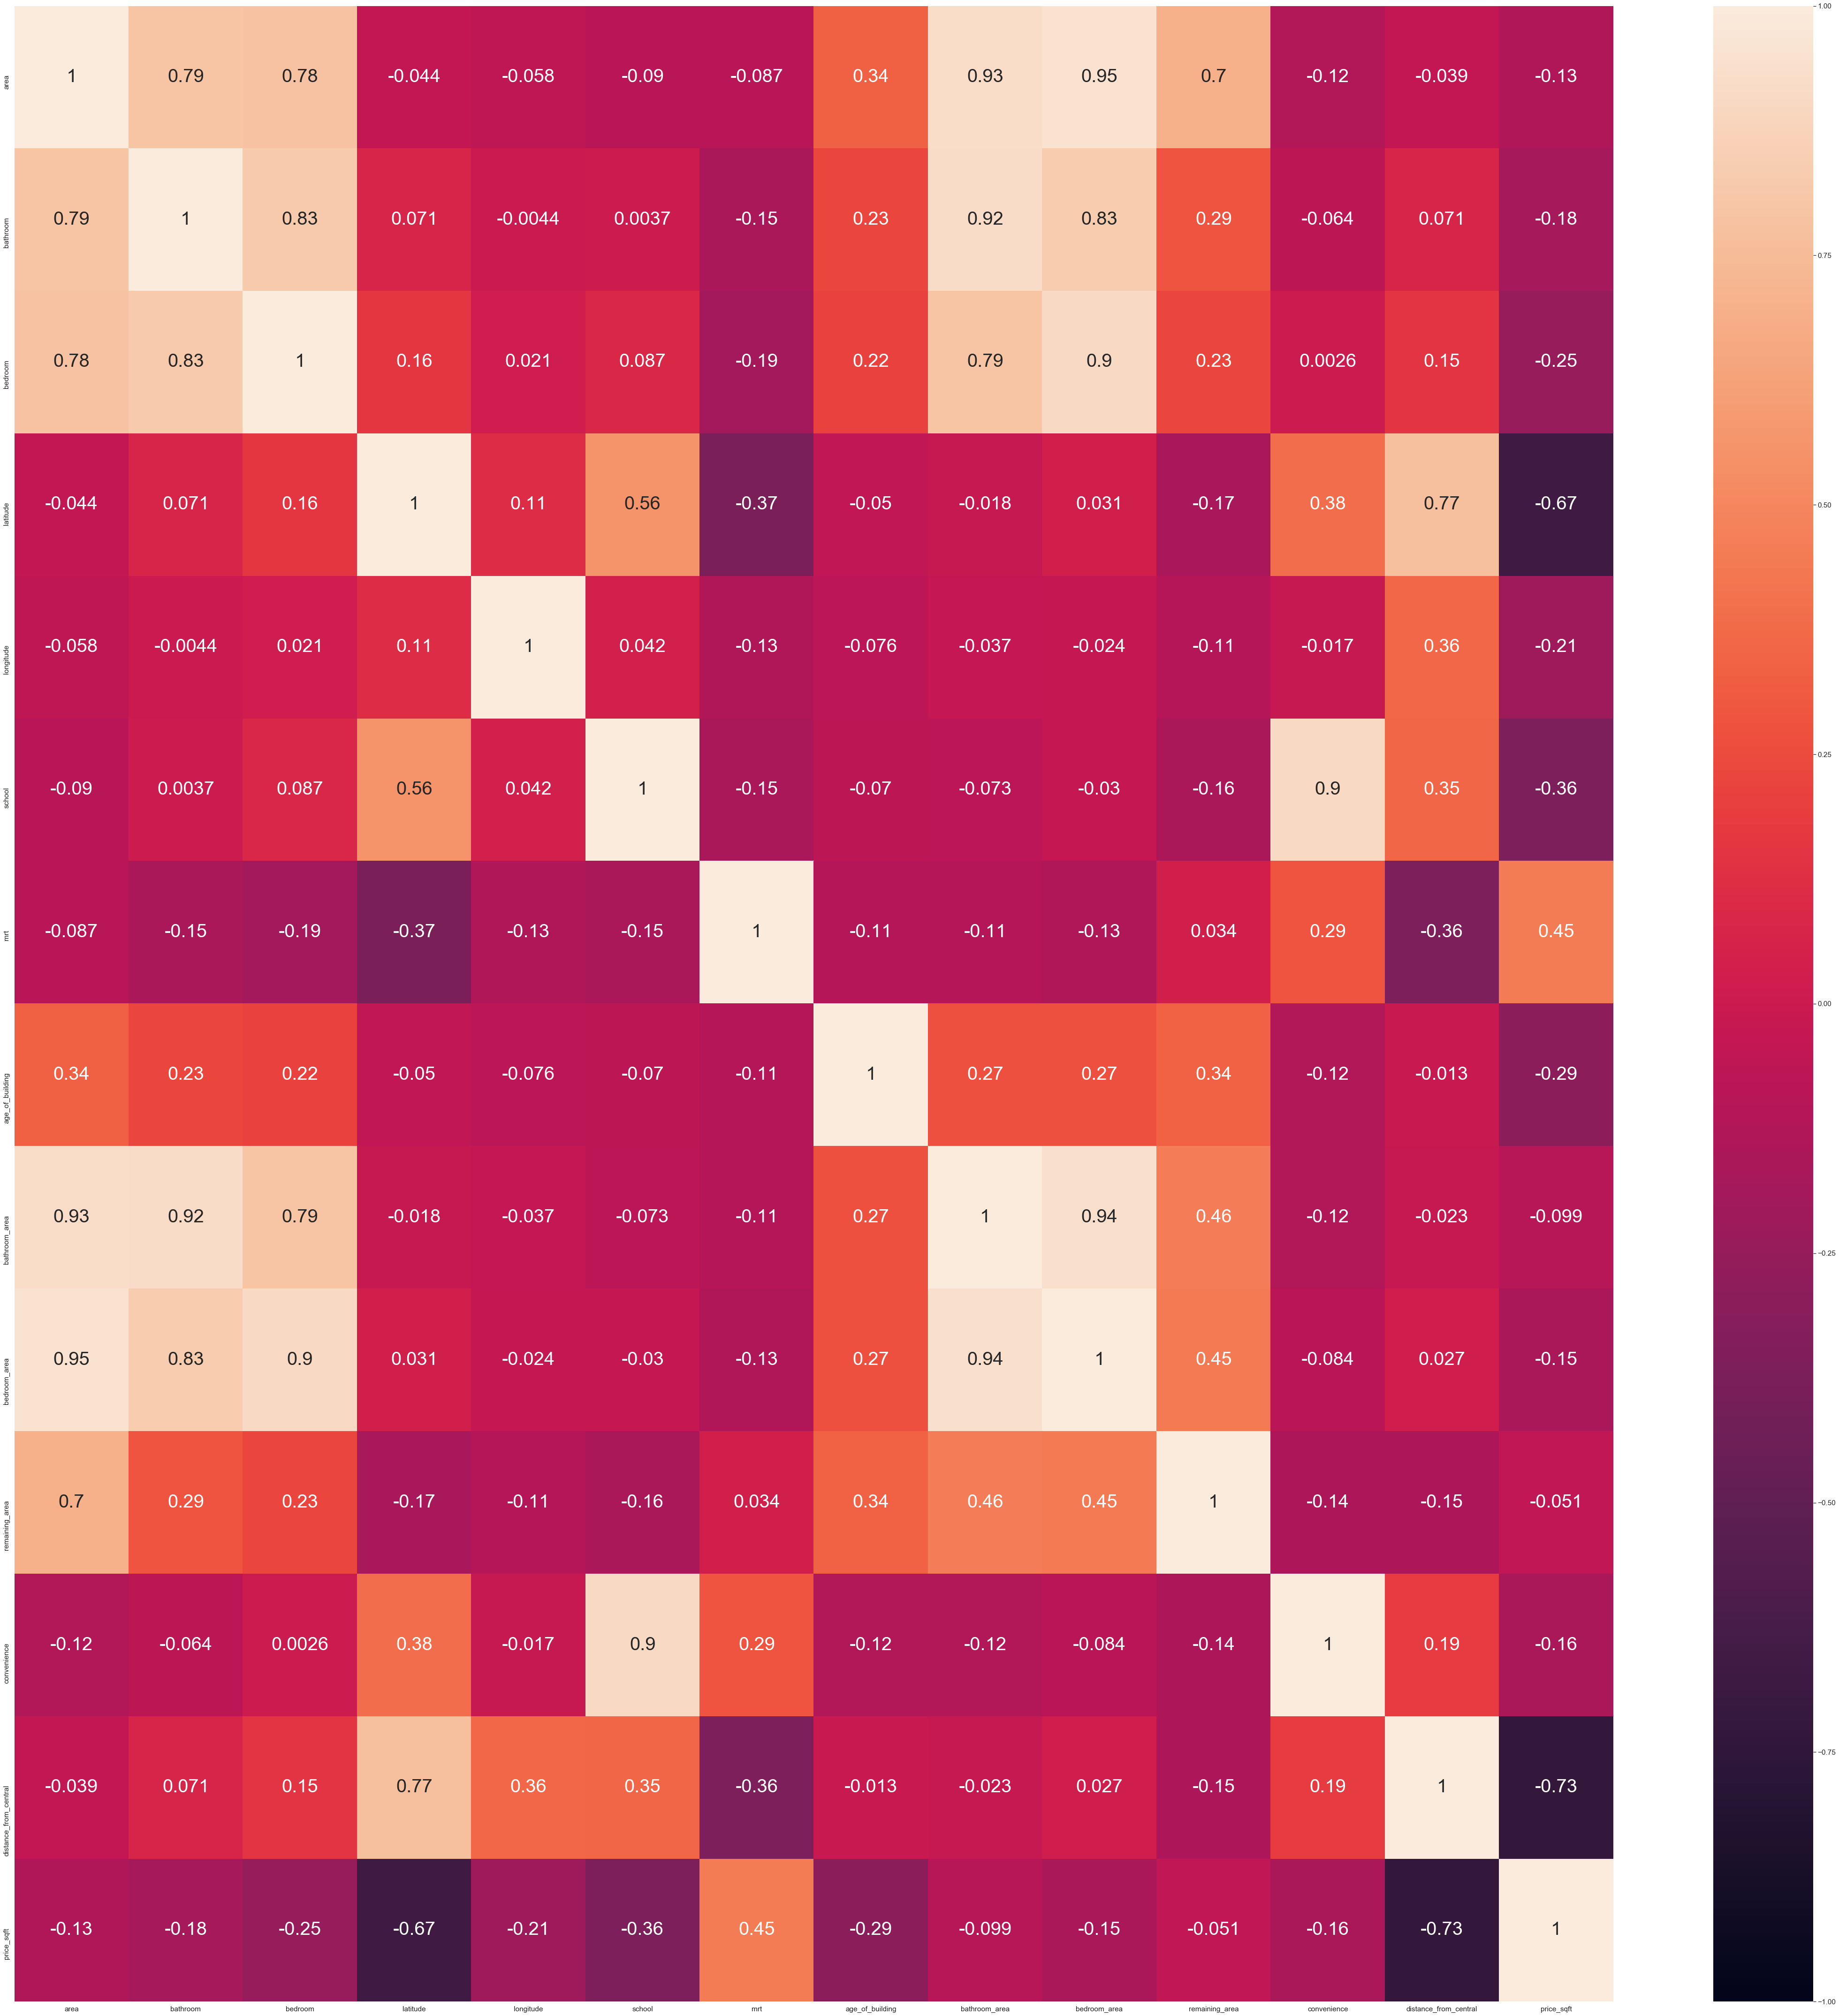

In [57]:
f, ax1 = plt.subplots(1,1,figsize=(60,60))
sns.set(font_scale=1.4)
sns.heatmap(condo.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 40})
bottom, top = ax1.get_ylim() #to obtain the y values for the top and bottom
ax1.set_ylim(bottom + 0.5, top - 0.5) 
plt.tight_layout()

In [54]:
condo.corr()

area  bathroom   bedroom  latitude  longitude  \
area                   1.000000  0.789976  0.784315 -0.043932  -0.058409   
bathroom               0.789976  1.000000  0.826121  0.071209  -0.004410   
bedroom                0.784315  0.826121  1.000000  0.157058   0.021113   
latitude              -0.043932  0.071209  0.157058  1.000000   0.114746   
longitude             -0.058409 -0.004410  0.021113  0.114746   1.000000   
school                -0.089563  0.003654  0.086569  0.559849   0.042443   
mrt                   -0.087261 -0.154515 -0.186840 -0.367225  -0.133148   
age_of_building        0.335353  0.233313  0.215168 -0.049545  -0.076207   
bathroom_area          0.928026  0.916451  0.793954 -0.017915  -0.037220   
bedroom_area           0.946315  0.831464  0.901841  0.031381  -0.024069   
remaining_area         0.702237  0.288808  0.233252 -0.171065  -0.105795   
convenience           -0.124894 -0.063765  0.002585  0.383114  -0.016829   
distance_from_central -0.039110  0.071186  0.153468  0.767314   0.364363   
price_sqft            -0.126401 -0.178828 -0.247266 -0.668758  -0.211883   

                         school       mrt  age_of_building  bathroom_area  \
area                  -0.089563 -0.087261         0.335353       0.928026   
bathroom               0.003654 -0.154515         0.233313       0.916451   
bedroom                0.086569 -0.186840         0.215168       0.793954   
latitude               0.559849 -0.367225        -0.049545      -0.017915   
longitude              0.042443 -0.133148        -0.076207      -0.037220   
school                 1.000000 -0.154732        -0.070292      -0.073214   
mrt                   -0.154732  1.000000        -0.114542      -0.109800   
age_of_building       -0.070292 -0.114542         1.000000       0.267667   
bathroom_area         -0.073214 -0.109800         0.267667       1.000000   
bedroom_area          -0.029795 -0.126893         0.271396       0.938866   
remaining_area        -0.163648  0.033854         0.343252       0.455267   
convenience            0.902651  0.285522        -0.118085      -0.118853   
distance_from_central  0.354130 -0.360250        -0.012677      -0.022762   
price_sqft            -0.364594  0.447379        -0.294407      -0.098560   

                       bedroom_area  remaining_area  convenience  \
area                       0.946315        0.702237    -0.124894   
bathroom                   0.831464        0.288808    -0.063765   
bedroom                    0.901841        0.233252     0.002585   
latitude                   0.031381       -0.171065     0.383114   
longitude                 -0.024069       -0.105795    -0.016829   
school                    -0.029795       -0.163648     0.902651   
mrt                       -0.126893        0.033854     0.285522   
age_of_building            0.271396        0.343252    -0.118085   
bathroom_area              0.938866        0.455267    -0.118853   
bedroom_area               1.000000        0.445099    -0.084180   
remaining_area             0.445099        1.000000    -0.144000   
convenience               -0.084180       -0.144000     1.000000   
distance_from_central      0.026881       -0.145939     0.186593   
price_sqft                -0.148833       -0.051205    -0.158789   

                       distance_from_central  price_sqft  
area                               -0.039110   -0.126401  
bathroom                            0.071186   -0.178828  
bedroom                             0.153468   -0.247266  
latitude                            0.767314   -0.668758  
longitude                           0.364363   -0.211883  
school                              0.354130   -0.364594  
mrt                                -0.360250    0.447379  
age_of_building                    -0.012677   -0.294407  
bathroom_area                      -0.022762   -0.098560  
bedroom_area                        0.026881   -0.148833  
remaining_area                     -0.145939   -0.051205  
c

From the scatterplot correlation matrix, both housing type have negative correlation with the predictor variables except for mrt variable. In general, there seems to have low correlation between the predictor variables,which might suggest that these variables might be independent variables. However, there were a few high correlation among "area", "bathroom" and "bathroom area" etc. This might suggest mulitcolinearity in the housing data. 

## 8. Data Preprocessing <a name='data-preprocess'></a>
[Back to top](#Contents)<br>

In [3]:
data = pd.read_csv('data/data_removed_outliers.csv')

First, we one-hot encoded the categorical variables and rearrange the columns.

In [4]:
data = pd.get_dummies(data, prefix='type', columns=['Type'])
data = data[[c for c in data if c not in ['price_sqft', 'type_Condo', 'type_HDB']] + ['type_HDB', 'type_Condo','price_sqft']]

Next, we stratified-split the dataset into training and test sets.

In [5]:
hdb = data[data['type_HDB'] == 1]
condo = data[data['type_Condo'] == 1]

train_hdb, test_hdb = train_test_split(hdb, test_size=0.1, random_state =1 )
train_condo, test_condo = train_test_split(condo, test_size=0.1, random_state =1 )

train = pd.concat([train_hdb, train_condo], axis=0).reset_index(drop=True)
test = pd.concat([test_hdb, test_condo], axis=0).reset_index(drop=True)

After that, we scaled the features of the training data by z-scoring. We were careful not to introduce any data leakage by using the same scaler to scale the test data.

In [6]:
scaler = StandardScaler()
train.iloc[:,:-3] = scaler.fit_transform(train.iloc[:,:-3]) #Excludes type_hdb, type_condo, price_sqft
test.iloc[:,:-3] = scaler.transform(test.iloc[:,:-3])

Finally, we stored the training and test data into their respective files, and also the scaler used to scale the training data. This scaler can be used to scale any future test data we used.

In [7]:
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)
pickle.dump(scaler, open('model/object/scaler.pickle', 'wb'))

## 9. Data Analysis <a name='data-analysis'></a>
[Back to top](#Contents)<br>

The main objective of the project was to find a suitable price prediction model for the housing marketing in Singapore. We explored with 6 different regression machine learning models in this study. The data was split into train set consisting 80% of the data and test set of 20%. 

The performance of each model is measured by **root mean square error(rmse)** and predicted **price per square feet (price_sqft)**. We would be exploring on the different regression models, specfically from **scikit-learn** package.

First of all, we define our scoring function, Root Mean Square Error (RMSE) and we set the random state for all models to be 10. 

In [8]:
def rmse(pred, actual):
    return np.sqrt(mean_squared_error(pred, actual))

Next, we import our training data, and define our KFold for preliminary model testing.

In [9]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [10]:
print("The dimension of the train set is ", train.shape)
print("The dimension of the test set is ", test.shape)

The dimension of the train set is  (5535, 16)
The dimension of the test set is  (616, 16)


In [11]:
kfold = KFold(n_splits=5)

### 9.1. Linear Regression <a name='linreg'></a>
[Back to top](#Contents)<br>

Linear regression model the linear relationship of response and predictor variables. The coefficients are estimated from the data to minimise the loss function (RMSE). Linear regression provides the simplest interpretability for the pricing model. 

To evaluate the model with unbiased data, we performed **kfold** cross validation. The train dataset would be split into k folds and each fold would be the validation set while the other k-1 folds would be the train set. Lastly, the loss value would be the average of the values computed in the loop. 

To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

To obtain a higher learning capacity, we try higher degrees to improve our accuracy. 

####  9.1.1 Linear Regression <a name='linreg'></a>

In [163]:
LR_test_err_cv = [] #list to store the rmse value for each fold
LR_train_err_cv = []


#perform LR with cross validation 
#currently for all the data, it uses only the train set 
for train_idx, test_idx in kfold.split(train):
    
    train_x = train.iloc[train_idx, :-1]  #Take the remaining groups as a training data set
    train_y = train.iloc[train_idx, -1]
    test_x = train.iloc[test_idx, :-1]  #Take the group as pseudo test data set
    test_y = train.iloc[test_idx, -1]
    
    linreg = LinearRegression() #no random state 
    linreg.fit(train_x, train_y) #Fit a model on the training set
    y_pred = linreg.predict(train_x) #evaluate it on the pseudo test data set
    y_pred1 = linreg.predict(test_x)
    LR_train_err_cv.append(rmse(y_pred,train_y))
    LR_test_err_cv.append(rmse(y_pred1, test_y))
    

err = np.concatenate((np.array(LR_train_err_cv).reshape(-1,1), np.array(LR_test_err_cv).reshape(-1,1)), axis=1)
print("Train      Val Test")
print(np.around(err, decimals=4))
print()

print("The train average RMSE of Linear Regression cross validation: %.4f " % np.mean(LR_train_err_cv))
print("The val test average RMSE of Linear Regression cross validation: %.4f " % np.mean(LR_test_err_cv))
print()

reg = linreg.fit(train.iloc[:,:-1], train.iloc[:,-1])
y_pred = reg.predict(train.iloc[:,:-1])
y_pred1 = reg.predict(test.iloc[:,:-1])
LR_train_rmse = rmse(y_pred, train.iloc[:,-1])
LR_test_rmse = rmse(y_pred1, test.iloc[:,-1])
lr_accuracy = reg.score(test.iloc[:, :-1],test.iloc[:,-1])

print("The RMSE of Linear regression for train set: %.4f " % LR_train_rmse)
print("The RMSE of Linear Regression for test set: %.4f " % LR_test_rmse)
print("The R^2 of linear regression: %.4f " %lr_accuracy)

Train      Val Test
[[264.2914 194.0799]
 [264.8706 189.1716]
 [235.7182 305.6737]
 [237.9654 297.0882]
 [239.4901 292.3991]]

The train average RMSE of Linear Regression cross validation: 248.4671 
The val test average RMSE of Linear Regression cross validation: 255.6825 

The RMSE of Linear regression for train set: 250.0525 
The RMSE of Linear Regression for test set: 247.4852 
The R^2 of linear regression: 0.8528 


From the result, the linear regression model had low RMSE difference between train and test set. It seems to suggest that it was a right-fitting model, however, it had a high RMSE value. Therefore, we explored higher learning capacity to find right-fitting model with lower RMSE value compared to the linear regression model. 

In [19]:
def coefficient_table(model,train):
    f_coeff = pd.DataFrame(columns=['Features', 'coefficient'])
    f_coeff['Features'] = train.columns[:-1]
    f_coeff['coefficient']= model.coef_
    return f_coeff

coefficient_table(reg,train)

Features  coefficient
0                    area    22.879989
1                bathroom   -62.064674
2                 bedroom   -76.270385
3                latitude  -105.894167
4               longitude    -1.984725
5                  school   -20.036354
6                     mrt    68.105367
7         age_of_building  -187.082644
8           bathroom_area    69.229832
9            bedroom_area    43.976739
10         remaining_area   -53.779866
11            convenience     4.174750
12  distance_from_central  -185.938566
13               type_HDB  -270.290274
14             type_Condo   270.290274

#### 9.1.2  Linear Regression with polynomial features <a name='linreg'></a>

In [7]:
#using the entire
deg = [2,3,4]

for d in deg:
    
    LR_test_err_d = [] #list to store the rmse value for each fold
    LR_train_err_d=[]

    for train_idx, test_idx in kfold.split(train):
        
        poly = PolynomialFeatures(degree=d)
        
        train_x = train.iloc[train_idx, :-1]
        train_y = train.iloc[train_idx, -1]
        test_x = train.iloc[test_idx, :-1]
        test_y = train.iloc[test_idx, -1]
        
        train_x = poly.fit_transform(train_x)
        test_x = poly.transform(test_x)

        linreg = LinearRegression()
        linreg.fit(train_x, train_y)
        y_pred = linreg.predict(train_x)
        y_pred1 = linreg.predict(test_x)
        LR_train_err_d.append(rmse(y_pred, train_y))
        LR_test_err_d.append(rmse(y_pred1, test_y))
        
    err = np.concatenate((np.array(LR_train_err_d).reshape(-1,1), np.array(LR_test_err_d).reshape(-1,1)), axis=1)
    print("     Train      Val Test")
    print(np.around(err, decimals=4))
    print()

    print("The train average RMSE of Linear Regression cross validation for degree", d, ": %.4f " % np.mean(LR_train_err_d))
    print("The val average RMSE of Linear Regression cross validation for degree", d, ": %.4f " % np.mean(LR_test_err_d))
    print()
    print()

     Train      Val Test
[[232.7443 141.8697]
 [219.2697  99.8561]
 [184.0922 260.9442]
 [185.5219 296.1651]
 [187.2192 251.7412]]

The train average RMSE of Linear Regression cross validation for degree 2 : 201.7695 
The val average RMSE of Linear Regression cross validation for degree 2 : 210.1153 


     Train      Val Test
[[181.6524 104.0769]
 [181.4859 113.8226]
 [153.1114 237.0947]
 [149.8149 376.8493]
 [152.1492 256.9699]]

The train average RMSE of Linear Regression cross validation for degree 3 : 163.6428 
The val average RMSE of Linear Regression cross validation for degree 3 : 217.7627 


     Train      Val Test
[[1.24747300e+02 2.10480199e+14]
 [1.23511600e+02 9.58035549e+09]
 [1.02283100e+02 4.49777186e+09]
 [9.87749000e+01 5.57360257e+11]
 [1.00386300e+02 1.15136639e+10]]

The train average RMSE of Linear Regression cross validation for degree 4 : 109.9407 
The val average RMSE of Linear Regression cross validation for degree 4 : 42212630230322.1016 




<p> At lower degree, the RMSE for validation set was reasonable, but at degree 4, the model has high RMSE and low RMSE for validation and train set respectively. This might be attributed to overfitting. As the degree increases, the model complexity increases, this leads to the model overfit the data and hence unable to generalise when apply to new set of data. Therefore, to prevent overfitting, we included a ridge regularisation into the model. </p>

#### 9.1.3 Ridge Regression <a name='ridge'></a>
[Back to top](#Contents)<br>

<p>Ridge regression improves Linear regression model by having a penality to the size of coefficients. The complex parameter(alpha) helps to control the amount of shrinkage.</p>

<p>$$ \min_w ||y - X_w||^2_2 + \alpha * ||w||^2_2 $$</p>

<p>This is useful to reduce the problem of multicollinearity in linear regression, whicha are common for models with large nummbers of parameters. Hence, the larger the alpha value, the size of shrinkage would be greater, hence the coeffients would be more robust to collinearity. The method decreases the variance in the expense of increasing the bias slightly.</p>

<p>Therefore we would like to fine tune the $\alpha$ parameter 
    - <b>alpha</b> is the regularization strength. It improves the conditioning of the problem and reduces the variance of the estimates.</p>


##### 9.1.3.1  Ridge Regression with GridSearch

In [31]:
deg = [2,3,4,5]
logalpha = np.arange(-3, 4, 1.0)
alpha = 10.0 ** logalpha

m = len(alpha)
n = len(deg)
grid_err = np.array([0] * (m*n)).reshape(m, n)
i = j = 0

for a in alpha:
    j=0
    for d in deg:
    
        err = []
        poly = PolynomialFeatures(degree=d)
        X = poly.fit_transform(train.iloc[:,:-1])

        for train_idx, test_idx in kfold.split(X):

            train_x = X[train_idx]
            train_y = train.iloc[train_idx, -1]
            test_x = X[test_idx]
            test_y = train.iloc[test_idx, -1]

            linreg = Ridge(alpha=a,random_state=10)
            linreg.fit(train_x, train_y)
            y_pred = linreg.predict(test_x)
            err.append(rmse(y_pred, test_y))
            
        grid_err[i, j] = np.mean(err)
        print("Val set RMSE of Ridge for degree {}, alpha {}: {}".format(d, a, err))
        print("Val Average RMSE of Ridge for degree {}, alpha {}: {}".format(d, a, np.mean(err)))
        print()
        j += 1
        
    i += 1

Val set RMSE of Ridge for degree 2, alpha 0.001: [100.5108126421009, 99.85057230111934, 260.9041656102065, 304.2251907467986, 251.84734306245645]
Val Average RMSE of Ridge for degree 2, alpha 0.001: 203.46761687253638

Val set RMSE of Ridge for degree 3, alpha 0.001: [103.81895571180091, 110.89332722247859, 239.13282559164168, 458.13734272870147, 250.5841460038008]
Val Average RMSE of Ridge for degree 3, alpha 0.001: 232.51331945168468

Val set RMSE of Ridge for degree 4, alpha 0.001: [15245.355191206356, 5216.117112400971, 1320.501273480545, 7487.188651700021, 1742.1159281910006]
Val Average RMSE of Ridge for degree 4, alpha 0.001: 6202.255631395778

Val set RMSE of Ridge for degree 5, alpha 0.001: [158691.84355020837, 19905.564032716884, 13354.469473127821, 36440.894386920634, 18886.85271678445]
Val Average RMSE of Ridge for degree 5, alpha 0.001: 49455.924831951634

Val set RMSE of Ridge for degree 2, alpha 0.01: [100.36213708114092, 99.84863153830506, 260.9041552034786, 303.5044854

In [32]:
min_index = np.unravel_index(grid_err.argmin(), grid_err.shape)
print(min_index)
print("Best alpha: ", alpha[min_index[0]])
print("Best degree: ", deg[min_index[1]])
print("Min error: ", grid_err[min_index])

(5, 0)
Best alpha:  100.0
Best degree:  2
Min error:  192


<p> After GridSearch between the <b>$\alpha$</b> and <b>degree of the model</b>, we derived that the best suitable hyperparameters with lowest RMSE for the validation set was <b>$\alpha=100$</b> and <b>$degree=2$</b>. </p>

##### 9.1.3.2 Accuracy of Ridge Regression on Test set

In [162]:
poly_final=PolynomialFeatures(degree=deg[min_index[1]])
poly_final.fit_transform(train.iloc[:,:-1])

ridge = Ridge(alpha=alpha[min_index[0]], random_state=10).fit(poly_final.fit_transform(train.iloc[:,:-1]), train.iloc[:,-1])

y_pred= ridge.predict(PolynomialFeatures(degree=deg[min_index[1]]).fit_transform(train.iloc[:,:-1]))
y_pred1 = ridge.predict(PolynomialFeatures(degree=deg[min_index[1]]).fit_transform(test.iloc[:,:-1]))

rr_train_rmse = rmse(y_pred, train.iloc[:,-1])
rr_test_rmse = rmse(y_pred1, test.iloc[:,-1])

ridge_accuracy = ridge.score(poly_final.fit_transform(test.iloc[:,:-1]),test.iloc[:,-1])

print("RMSE of ridge on train set: %.4f " % rr_train_rmse)
print("RMSE of ridge on test set: %.4f " %rr_test_rmse)
print()
print("The R^2 of ridge regression: %.4f " %ridge_accuracy)

RMSE of ridge on train set: 201.7705 
RMSE of ridge on test set: 202.3666 

The R^2 of ridge regression: 0.9016 


<p> The table below shows the coefficient of the regularised linear model with degree 2. </p>

In [50]:
feature_table = pd.DataFrame(columns=['Features', 'coefficient'])
feature_table['Features'] = poly_final.get_feature_names(input_features=train.columns[:-1])
feature_table['coefficient']= ridge.coef_
feature_table

Features  coefficient
0                                   1     0.000000
1                                area    -5.340475
2                            bathroom     7.035675
3                             bedroom    -5.596285
4                            latitude   -67.402097
..                                ...          ...
131    distance_from_central type_HDB    -7.406802
132  distance_from_central type_Condo   -74.516073
133                        type_HDB^2  -140.109341
134               type_HDB type_Condo     0.000000
135                      type_Condo^2   140.109341

[136 rows x 2 columns]

<p> By using polynomial terms and a regularisation parameter to reduce overfitting, the RMSE for the test set was reduced from 247.4852 to 202.3666. For the Ridge model, We can observe that the difference between train and test RMSE is small( suggesting no overfitting). Nevertheless, the test RMSE value is still quite high. This indicates that for an apartment of 1000 sqft, the error in price is as large as SGD202,366. Therefore, we would like to explore on other non-linear models for a better pricing model. </p>

### 9.3.Tree based model <a name='rf'></a>
[Back to top](#Contents)<br>

This section describes the modelling of tree-based models to perform regression analysis. Decision tree model are used to compare with Random Forest. This is because the former has interpretability on the various prediction variables affecting the **Price_sqft** while the latter is not easily interpretable. 

#### 9.3.1 Decision Tree<a name='rf'></a>
[Back to top](#Contents)<br>

Decision tree is a non-parametric supervised machine learning method. The model learns from if-then-else decision rules which are derived from the data and predicted the response variable. Also, it is able to provide interpretability for the model

However, Decision tree tends to overfit the model. Therefore, there is a need to tune parameters like 
 **maximum depth** and **complexity parameters** to prevent over-fitting of model.
 
For our model, we uses "MSE" criterion function to measure the quality of a split and the tree stops growing when the complexity parameter (ccp_alpha) exceeds. 

- **max_depth**: The maximum depth of the tree. 
- **ccp_alpha**: The complexity parameter used for minimal cost-complexity pruning.

In [12]:
train_x = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_x = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [1]:
# Helper function to fit models from train data and predict using test data, then return the train & test rmse
def model_fit(model,train_x,train_y,test_x,test_y):
    model.fit(train_x, train_y) 
    y_pred = model.predict(train_x)
    y_pred1 = model.predict(test_x)
    
    train_rmse = rmse(y_pred,train_y) 
    test_rmse = rmse(y_pred1,test_y) 
    
    return train_rmse,test_rmse

def variable_importance(model,train):
    f_importance = pd.DataFrame(columns=['Features', 'Importance'])
    f_importance['Features'] = train.columns[:-1]
    f_importance['Importance'] = model.feature_importances_
    f_importance.sort_values(by='Importance', inplace=True, ascending=False)
    f_importance
    
    return f_importance 

In [14]:
# Decision Tree before tuning parameters 
regr = DecisionTreeRegressor(criterion='mse',random_state=10)
DT_Train_rmse, DT_Test_rmse = model_fit(regr,train_x,train_y,test_x,test_y)
dt_accuracy = regr.score(test_x,test_y)
print("The max_depth of the tree model: ",regr.get_depth())

print("The RMSE of Decision tree before tuning on train set: %.4f " %DT_Train_rmse)
print("The RMSE of Decision tree before tuning on test set: %.4f " %DT_Test_rmse)
print("The R^2 of decision tree before tuning: %.4f " %dt_accuracy)

The max_depth of the tree model:  30
The RMSE of Decision tree before tuning on train set: 26.2828 
The RMSE of Decision tree before tuning on test set: 167.0858 
The R^2 of decision tree before tuning: 0.9329 


In [54]:
# Decision Tree with tuning parameters 

#Find the best tuning parametes using GridSerch between max_depth and ccp_alphas parameter 
#Use RMSE as the scoring value 
param = {
    'max_depth': range(1,7), # Number of splits
    'ccp_alpha':np.linspace(0.1,1, num =20), # Maximum number of features to consider at each split
}

start= time.time()
gsc_decision_tree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=10),param_grid=param, scoring='neg_root_mean_squared_error')
tune_dt= gsc_decision_tree.fit(train_x, train_y)
print('time taken for Decision tree with tuning = %.2f'%(time.time() - start))

#obtain the best tuning parameters
best_params_dt = tune_dt.best_params_
print(best_params_dt)

time taken for Decision tree with tuning = 38.12
{'ccp_alpha': 0.38421052631578945, 'max_depth': 6}


The best fitted decision tree is selected based on the lowest rmse value for the validation dataset. The best performed tree has ccp_alpha= 0.3842 and max_depth=6.  

In [171]:
dt_tune_model = DecisionTreeRegressor(max_depth=best_params_dt["max_depth"], ccp_alpha=best_params_dt["ccp_alpha"], random_state=10)

DT_Train_rmse_p, DT_Test_rmse_p = model_fit(dt_tune_model,train_x,train_y,test_x,test_y)
dt_accuracy_p = dt_tune_model.score(test_x,test_y)


print("The RMSE value of decision tree with tuning on Train set: %.4f " %DT_Train_rmse_p)
print("The RMSE value of decision tree with tuning on test set : %.4f " %DT_Test_rmse_p)
print("The R^2 of decision tree with tuning: %.4f " %dt_accuracy_p)


The RMSE value of decision tree with tuning on Train set: 191.1747 
The RMSE value of decision tree with tuning on test set : 210.7672 
The R^2 of decision tree with tuning: 0.8932 


<p> The result for decision tree without tuning is as follows: </p>
    - Train RMSE was 26.2828 and Test RMSE was 167.0858 and a max_depth of 30. 
It seems like the model overfitted. </p>

<p> We introduced a few contraints for the decision tree hoping to produce a decision tree to prevent overfitting and generalised well. The result for decision tree with tuning is as follows :</p>
- Train RMSE was 191.1747 and Test RMSE 210.7672 and a max depth of 6. </p>

<p>By comparing both models, the model with tuning does not overfit, however, the model without tuning had a lower test RMSE value. This suggests that despite the overfitting, the model without tuning still generalised well for new datas and performed better than the model with tuning. </p>

In [15]:
#table of variable importance
print('The table of the variable importance for decision tree:')
variable_importance(regr,train)

The table of the variable importance for decision tree:


Features  Importance
14             type_Condo    0.607950
12  distance_from_central    0.228258
7         age_of_building    0.056352
3                latitude    0.041729
4               longitude    0.026699
10         remaining_area    0.012088
0                    area    0.007691
9            bedroom_area    0.006114
8           bathroom_area    0.005576
5                  school    0.002671
6                     mrt    0.002007
11            convenience    0.001877
2                 bedroom    0.000538
1                bathroom    0.000449
13               type_HDB    0.000000

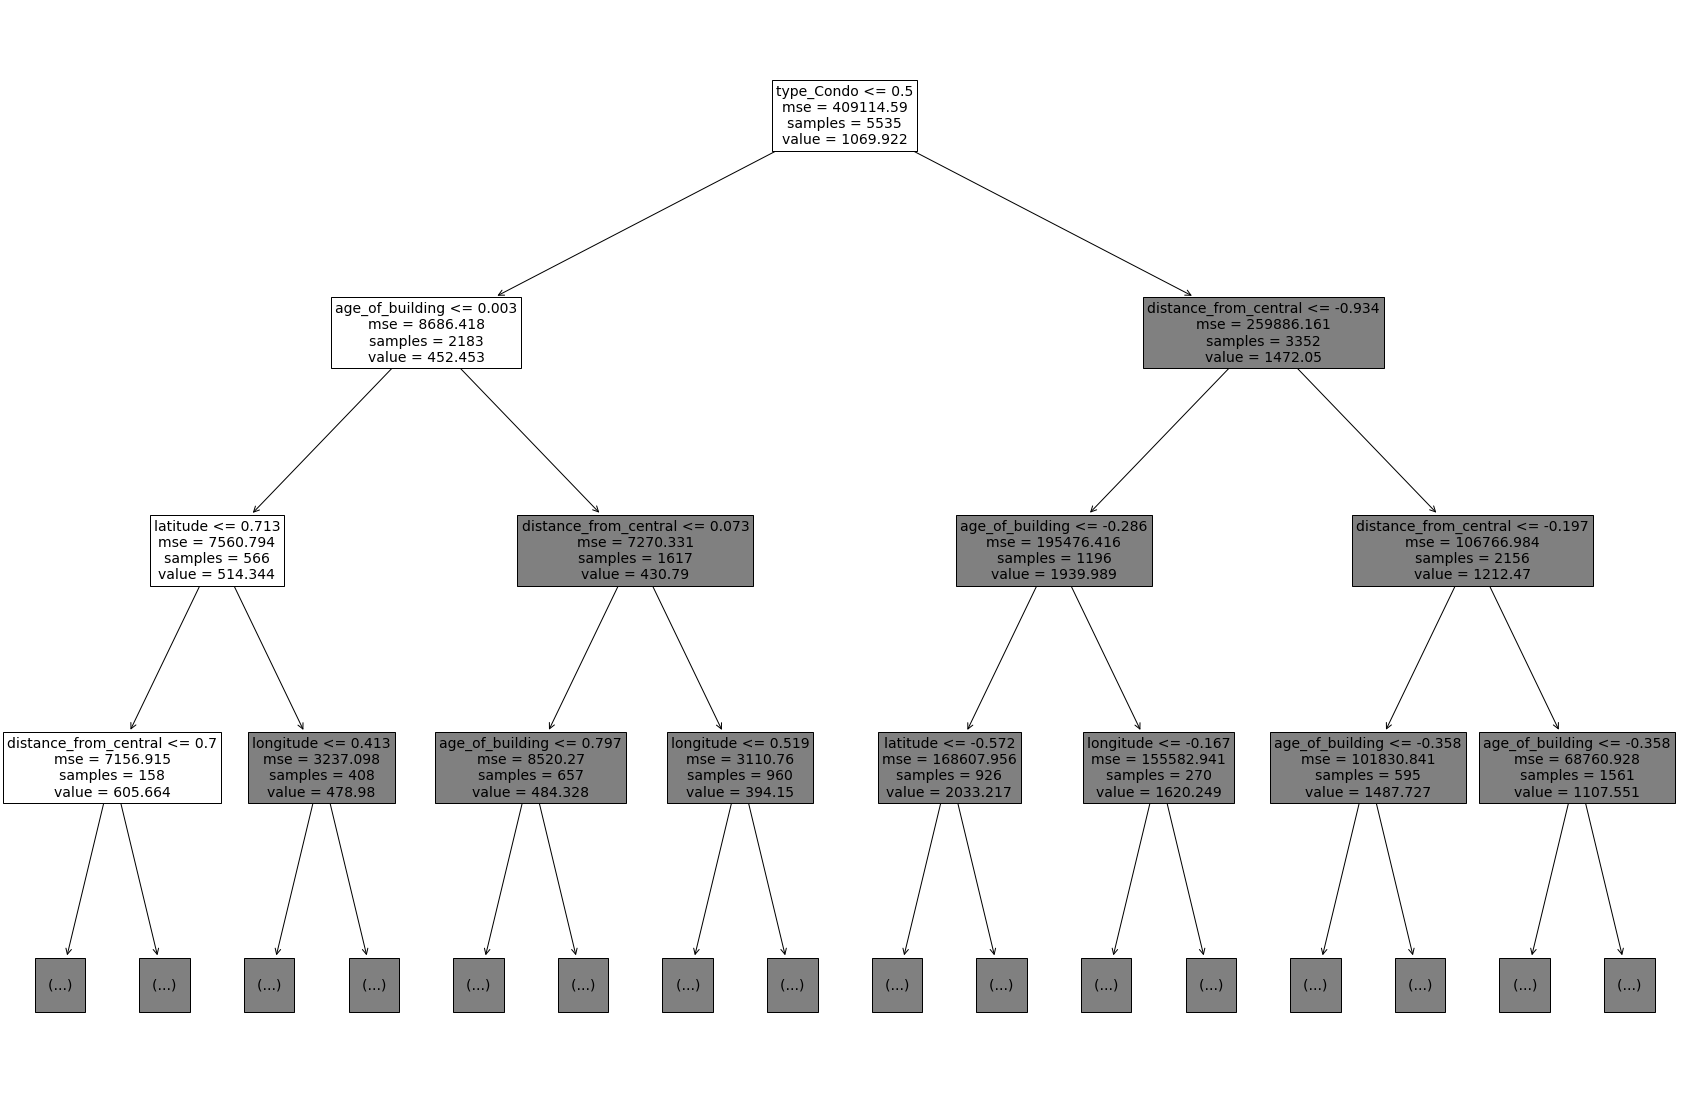

In [16]:
#plot a decision tree 
fig, ax = plt.subplots(figsize=(30, 20))
tree.plot_tree(regr.fit(train_x, train_y),max_depth=3,fontsize=14, feature_names=list(train.columns))
plt.show()

<p>The decision tree on the entire housing data suggests that the most important factor is the type of housing, followed by the distance from central and age of the bulding. Other factors like latitude, longtitude and area are significant to the pricing model but with low importance. Some factors, like bedroom, bathroom and school, have negligible importance on the pricing model.</p>

#### 9.3.2 Random Forest <a name='rf'></a>
[Back to top](#Contents)<br>

While Decision tree may provide interpretability of the pricing model at low depth level, this is not practical in reality. This is because real-world dataset requires high depth level. However, Decision tree with high depth level may leads to over-fitting. 

For random forest, each tree in the model is based on bootstrap sample from the training data.To decrease the variance of the model, we would need to fine tune parameters(**n_estimators** and **max_features**). As these parameters allow randomness in the model, it helps to decrease the test errors for each tree. Therefore, random forest is able to reduce variance by merging different tree, with slight increase on bias. One must note that, in reality, the variance reduction outweight the increase in bias, hence, random forest is an effective regression model compare to decision tree. 

- **n_estimators**: The number of trees in the forest

- **max_features**: The number of features to consider when looking for the best split

- **max_depth**: The maximum depth of the tree. 

#### 9.3.2.1 Simple Random Forest Regressor 

In [170]:
rf_regr = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=10,oob_score=True)
rf_train_rmse, rf_test_rmse = model_fit(rf_regr,train_x,train_y,test_x,test_y)
rf_accuracy = rf_regr.score(test_x,test_y)

print("The RMSE value of Random Forest before tuning on Train set: %.4f " %rf_train_rmse)
print("The RMSE value of Random Forest before tuning on Test set: %.4f " %rf_test_rmse)
print("The R^2 of lrandom foreest before tuning: %.4f " %rf_accuracy)

The RMSE value of Random Forest before tuning on Train set: 53.3894 
The RMSE value of Random Forest before tuning on Test set: 115.8806 
The R^2 of lrandom foreest before tuning: 0.9677 


#### 9.3.2.2 Hyperparameter selection for random forest 

In [59]:
param = {
    'n_estimators': range(100,500,50), # Number of forests
    'max_features': range(3,15), # Maximum number of features to consider at each split
    'max_depth': range(3,15)
}

#find the best parameter via grid search cv 
# start = time.time()
# gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param, scoring='neg_root_mean_squared_error')
# search_result = gsc.fit(train_x,train_y)
# # find the best parameter via randomized search cv 
# print('Time taken for RF with tuning = %.2f'%(time.time() - start))

start = time.time()
rsc = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=10),param_distributions=param,scoring='neg_root_mean_squared_error', random_state=5)
search_result = rsc.fit(train_x,train_y)
print('Time taken for RF with tuning = %.2f'%(time.time() - start))

best_params_rf = search_result.best_params_
print(best_params_rf)


Time taken for RF with tuning = 744.25
{'n_estimators': 400, 'max_features': 13, 'max_depth': 14}


In [169]:
rfr = RandomForestRegressor(max_features=best_params_rf["max_features"], n_estimators=best_params_rf["n_estimators"], max_depth=best_params_rf['max_depth'],random_state=10)

rf_train_rmse_p, rf_test_rmse_p = model_fit(rfr,train_x,train_y,test_x,test_y)
rf_accuracy_p = rfr.score(test_x,test_y)


print("The RMSE value of Random Forest with tuning on Train set: %.4f"%rf_train_rmse_p)
print("The RMSE value of Random Forest with tuning on Test set: %.4f"%rf_test_rmse_p)
print("The R^2 of random forest with tuning: %.4f " %rf_accuracy_p)

The RMSE value of Random Forest with tuning on Train set: 63.0996
The RMSE value of Random Forest with tuning on Test set: 116.7101
The R^2 of random forest with tuning: 0.9673 


<p> Based on the result, the random forest model(tuning) did not improve the RMSE value for test set. It had an approximately same value as the random forest model(without tuning). Furthermore, both models do not have a big RMSE difference between the train and test set.This suggests that random forest may be a good pricing model. </p>


In [61]:
f_importance = variable_importance(rfr,train)
f_importance

Features  Importance
13               type_HDB    0.320809
14             type_Condo    0.288444
12  distance_from_central    0.210724
3                latitude    0.060064
7         age_of_building    0.051168
4               longitude    0.023656
10         remaining_area    0.011276
0                    area    0.011078
8           bathroom_area    0.005756
9            bedroom_area    0.005543
5                  school    0.004179
6                     mrt    0.003017
11            convenience    0.002803
1                bathroom    0.000815
2                 bedroom    0.000668

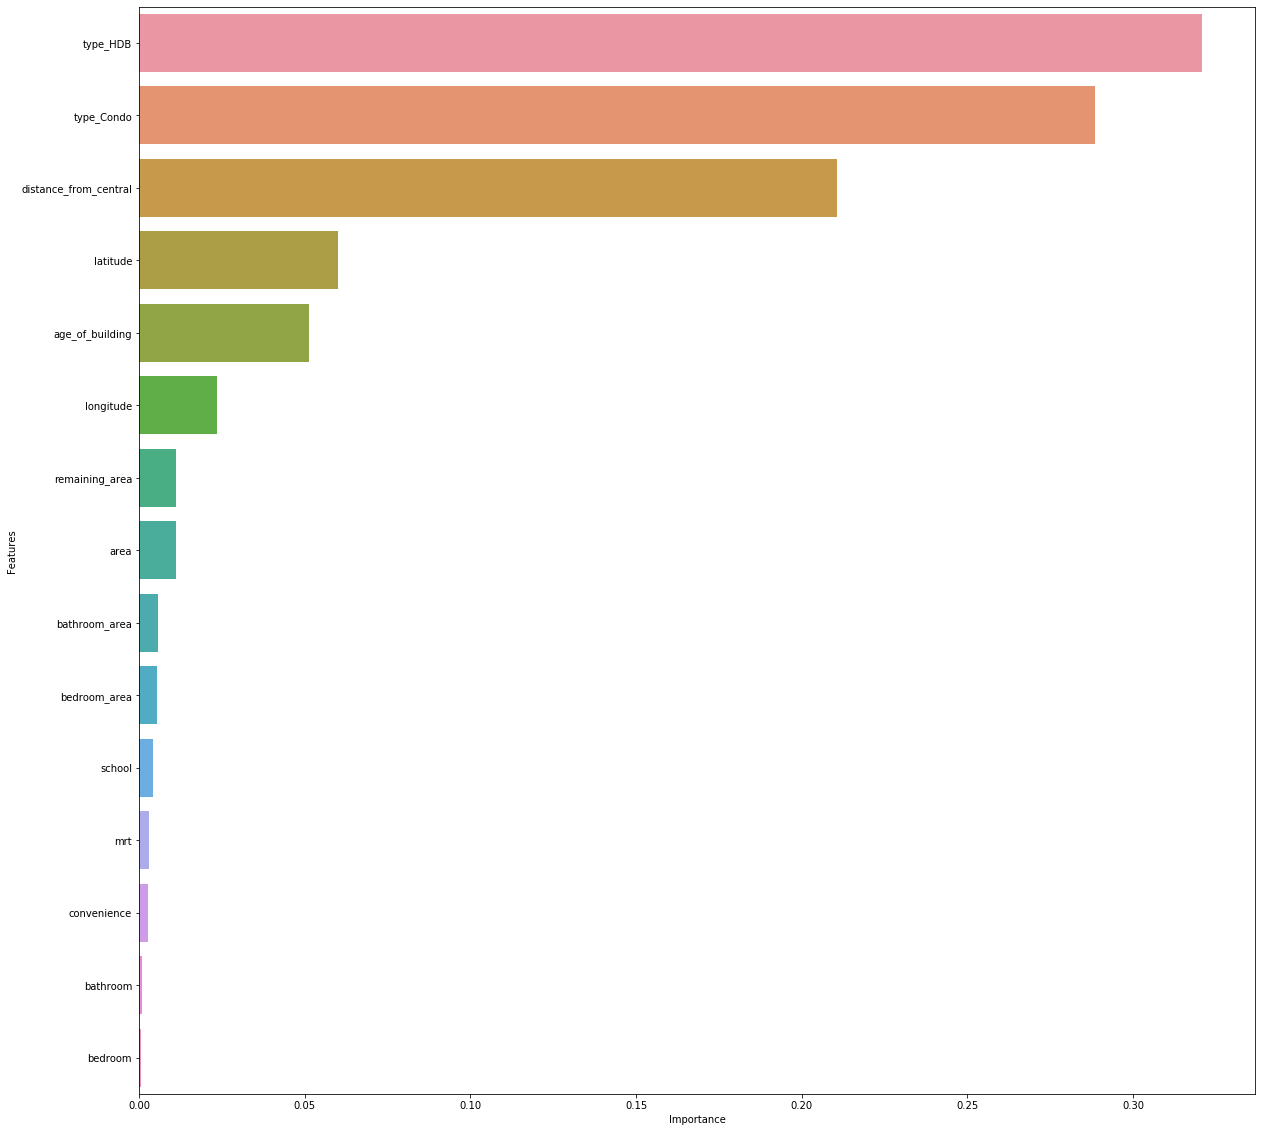

In [62]:
f,axes = plt.subplots(1,1,figsize=(20,20))
sns.barplot(x='Importance', y='Features', data=f_importance)

<p>It seems that the type of apartments is very important. This is followed by distance from central, age and the coordinates. These six features take up 94.4% of the decision made in the GradientBoosting tree</p>

### 9.4  GradientBoostingRegressor <a name='gb'></a>
[Back to top](#Contents)<br>

Gradient Tree Boosting is a generalization of boosting to arbitrary differentiable loss functions. It generates a prediction model by ensemble of decision trees of fixed size as weak learners. As decision tree allows usage of mixed data type and ability to model complex functions, it is useful for boosting. One should note that the size of the individual decision tree indicates the level of variable interactions, which was learned by the boosting model. 

One should note that gradient boosting regressor does not have interpretability, hence unable to identify the significant factors influencing the pricing model. However, it shows us the importance of feature (by the frequency of splits using the variable). 

In general, it is an reliable regressor and has wide usage in real life like web search ranking. 


#### 9.4.1 GradientBoostingRegressor

In [174]:
gb1 = GradientBoostingRegressor(random_state=10)
gb_train_rmse, gb_test_rmse = model_fit(gb1,train_x,train_y,test_x,test_y)
gb_accuracy = gb1.score(test_x,test_y)

print("The RMSE value of Gradient Boosting before tuning on Train set: %.4f"%gb_train_rmse)
print("The RMSE value of Gradient Boosting before tuning on Test set: %.4f"%gb_test_rmse)
print("The R^2 of gradient boosting before tuning: %.4f " %gb_accuracy)

The RMSE value of Gradient Boosting before tuning on Train set: 153.1187
The RMSE value of Gradient Boosting before tuning on Test set: 158.9350
The R^2 of gradient boosting before tuning: 0.9393 


#### 9.4.2  Hyperparameter selection for GBRegressor

To prevent overfitting of the model, we would like to fine tune a few parameters to set constraints for the model. 

-**max_depth**: Maximum depth of the decision tree. The best fitted model relies on the variable interactions.

-**n_estimators**: The number of boosting stages. A higher number of tree leads to better performance. 

-**max_features**: The number of features considered when finding the best split in the tree.  

-**min_samples_split**: The minimum number of samples required to be at a leaf node.  

In [107]:
param = {
    'max_depth': [3,6,9,12,15],
    'max_features': range(3,15),# Maximum number of features to consider at each split
    'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node
    'n_estimators':[200,350,300,350]
}
start_time = time.time()
# grid_search = GridSearchCV(GradientBoostingRegressor(random_state=10), param_grid=param, cv=5, scoring='neg_root_mean_squared_error')
grid_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=10), param_distributions=param, cv=5, scoring='neg_root_mean_squared_error')

grid_search.fit(train_x, train_y)
best_param_gb = grid_search.best_params_
print('Time taken for GB with tuning = %.2f'%(time.time() - start))

print(best_param_gb)

Time taken for GB with tuning = 16245.20
{'n_estimators': 350, 'min_samples_split': 5, 'max_features': 8, 'max_depth': 9}


#### Accuracy of the Optimised Model

In [192]:
gb = GradientBoostingRegressor(n_estimators=best_param_gb['n_estimators'], max_depth=best_param_gb['max_depth'], 
                               max_features=best_param_gb['max_features'], min_samples_split=best_param_gb['min_samples_split'],
                               random_state=10)

gb_train_rmse_p, gb_test_rmse_p = model_fit(gb,train_x,train_y,test_x,test_y)
gb_accuracy_p = gb.score(test_x,test_y)

print("The RMSE value of Gradient Boosting with tuning on Train set: %.4f"%gb_train_rmse_p)
print("The RMSE value of Gradient Boosting with tuning on Test set: %.4f"%gb_test_rmse_p)
print("The R^2 of gradient boosting with tuning: %.4f " %gb_accuracy_p)

The RMSE value of Gradient Boosting with tuning on Train set: 28.3583
The RMSE value of Gradient Boosting with tuning on Test set: 116.5895
The R^2 of gradient boosting with tuning: 0.9673 


<p> Based on the results, the gradient boosting with tuning model had a larger RMSE difference between train and test set compared to the model without tuning. Based on our understanding from the learning curve, this might suggest that the model with tuning may overfit the data. One might suggests that the model without tuning might be a better prediction mode due to a smaller RMSE difference (suggesting it to be a right fitted model), however one should note that the test RMSE value (116.5895) for model with tuning was much lower than model without tuning (158.9250). Despite the model with tuning might be overfitting, it is a better model compared to model without tuning. </p>

#### Importance of each feature in the Gradient Boosting trees

In [193]:
f_importance = variable_importance(gb,train)
f_importance

Features  Importance
13               type_HDB    0.307244
14             type_Condo    0.276943
12  distance_from_central    0.165857
3                latitude    0.083322
7         age_of_building    0.060334
4               longitude    0.050819
10         remaining_area    0.011399
0                    area    0.010226
6                     mrt    0.009414
8           bathroom_area    0.008079
9            bedroom_area    0.007140
5                  school    0.005024
11            convenience    0.002744
1                bathroom    0.000927
2                 bedroom    0.000527

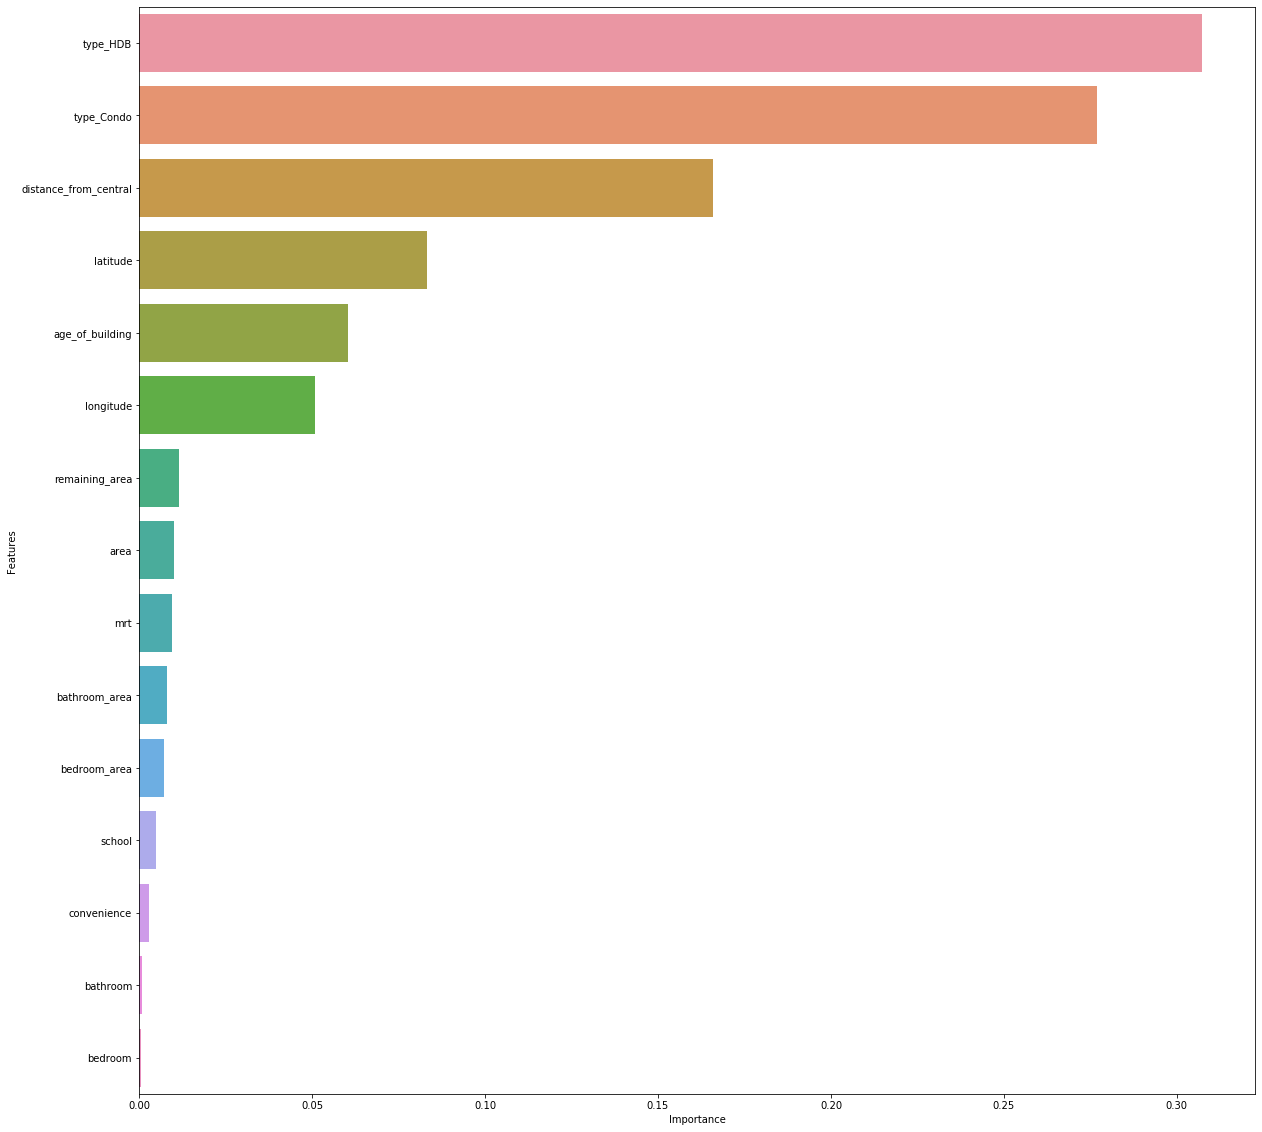

In [194]:
f,axes = plt.subplots(1,1,figsize=(20,20))
sns.barplot(x='Importance', y='Features', data=f_importance)

<p> Variables 'type_HDB', 'type_condo' and 'distance from central' have high importance in the Gradient Boosting model. It had the same results as random forest. It seems that the type of properties is the most important factor in house pricing model and foowed by 'distance from central', 'age' and 'coordinates'. These features take up more than 90% of the decision made in Gradient Boosting tree. </p>

### 9.5. KNeighborsRegressor <a name='knn'></a>
[Back to top](#Contents)<br>

The K-nearest neighbours algorithm(KNN) is a non-parametric method for regression. It finds a fixed number of training samples (**n-neighbours**) nearest to the new data point in distance and predict by taking the average of response values of the sample points. It has several metric measure, one of which is euclidean distance. It is not a generalizing machine learning model as it memorises the train set data to predict the response value. Also, it lacks intepretability for the model. 

The best knn model depends on the dataset as it memorises the train set to predict response value for new data points. Nonetheless, it can be tune with a few parameters to form a best fit model for the data. 

- **n_neighbors** allows the model to consider the nearest k number of samples from the new data point. 
- **weights** allows all train data points to have equal weights or weight points by the inverse of their distance. 
- **p** is the power parameter for the Minkowski metric. 

One should take note that the accuracy of KNN can be affected greatly by having noise and irrelevant features.


#### 9.5.1 KNeighborsRegressor

In [177]:
knn = KNeighborsRegressor() #without random state 
knn_train_rmse, knn_test_rmse = model_fit(knn,train_x,train_y,test_x,test_y)
knn_accuracy = knn.score(test_x,test_y)

print("The RMSE value of KNeighbour before tuning on Train set: %.4f" %knn_train_rmse)
print("The RMSE value of KNeighbour before tuning on Test set: %.4f" %knn_test_rmse)
print("The R^2 of KNeighbour before tuning: %.4f " %knn_accuracy)

The RMSE value of KNeighbour before tuning on Train set: 168.0419
The RMSE value of KNeighbour before tuning on Test set: 206.8154
The R^2 of KNeighbour before tuning: 0.8972 


#### 9.5.2  Hyperparameter selection for KNeighborsRegressor

In [90]:
param = {
    'n_neighbors': range(5,30,5),
    'weights': ['uniform', 'distance'],
    'p': [1,2,3]
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=param, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(train.iloc[:,:-1], train.iloc[:,-1])
best_param_knn = grid_search.best_params_

print(best_param_knn)

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [178]:
knn = KNeighborsRegressor(n_neighbors=best_param_knn['n_neighbors'], p=best_param_knn["p"], weights=best_param_knn['weights'])

knn_train_rmse_p, knn_test_rmse_p = model_fit(knn,train_x,train_y,test_x,test_y)
knn_accuracy_p = knn.score(test_x,test_y)

print("The RMSE value of KNeighbour with tuning on Train set: %.4f" %knn_train_rmse_p)
print("The RMSE value of KNeighbour with tuning on Test set: %.4f" %knn_test_rmse_p)
print("The R^2 of KNeighbour before tuning: %.4f " %knn_accuracy_p)

The RMSE value of KNeighbour with tuning on Train set: 26.2900
The RMSE value of KNeighbour with tuning on Test set: 177.2479
The R^2 of gradient boosting before tuning: 0.9245 


<p> Based on the results, KNN with tuning had a larger RMSE difference between train and test set as compared to the model without tuning. Based on our understanding from the learning curve, this might suggest that KNN with tuning may overfit the data. However, one should note that the test RMSE value (177.2479) for model with tuning was much lower than model without tuning (206.8154). Hence, KNN with tuning is a better model. </p>

<p> This was further supported by the $R^2$ value for both model. KNN with tuning had 92.45% accuracy and KNN without tuning had 89.72% accuracy.</p>

### 9.6 Stacking Generalisation <a name='stacking'></a>
[Back to top](#Contents)<br>

Ensemble methods were used to combine the predictions of several machine learning models to improve the generalisation over a single estimator. Stacking generalisation belongs to the averaging methods in ensemble methods. The main idea is to build several models independently and take the average of their predictions. This in turn built a better combined machine earning model compared to other individual machine learning models as the variance decreases.  

Stacking generalisation combined predictions of each models and used it as input to the final estimator to compute the final prediction.

The process of stacking generalisation is as follows:
1. During the training process, the models are fitted to the entire training dataset and used when function **predict** is called. 
2. Furthermore, to prevent over-fitting and generalize the model better, the final model is trained on the test set using cross validation. 

We have performed stacking generalisation in 2 different methods. 
1. Using the built-in function from **Scikit Learn** package 
2. Built a stacking generalisation model from scatch 

#### 9.6.1 Sklearn built-in function <a name='stacking'></a>
[Back to top](#Contents)<br>

In [200]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
estimators = [('ridge', Ridge(alpha=alpha[min_index[0]],random_state=10)),
              ('dt', DecisionTreeRegressor(max_depth=best_params_dt["max_depth"], ccp_alpha=best_params_dt["ccp_alpha"], random_state=10)),
              ('rf', RandomForestRegressor(max_features=best_params_rf["max_features"], n_estimators=best_params_rf["n_estimators"], 
                                           max_depth=best_params_rf['max_depth'],random_state=10)),
              ('gb', GradientBoostingRegressor(n_estimators=best_param_gb['n_estimators'], max_depth=best_param_gb['max_depth'], 
                                     max_features=best_param_gb['max_features'], min_samples_split=best_param_gb['min_samples_split'],
                                     random_state=10)),
              ('knn',KNeighborsRegressor(n_neighbors=best_param_knn['n_neighbors'], p=best_param_knn["p"], weights=best_param_knn['weights']) )
]

reg = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
reg1 = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

In [201]:
train_x = train.iloc[:, :-1]
train_y = train.iloc[:, -1]
test_x = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

s_train_rmse_lr, s_test_rmse_lr = model_fit(reg,train_x,train_y,test_x,test_y)
s_train_rmse_ridge, s_test_rmse_ridge = model_fit(reg1,train_x,train_y,test_x,test_y)

stack_accuracy_ridge = reg1.score(test_x,test_y)
stack_accuracy_lr = reg.score(test_x,test_y)



print("The RMSE of Stacking Ensemble(lr) for train set: %.4f " % s_train_rmse_lr)
print("The RMSE of Stacking Ensemble(lr) for test set: %.4f " % s_test_rmse_lr)
print("The R^2 of Stacking Ensemble(lr): %.4f " %stack_accuracy_lr)
print()
print()
print("The RMSE of Stacking Ensemble(ridge) for train set: %.4f " % s_train_rmse_ridge)
print("The RMSE of Stacking Ensemble(ridge) for test set: %.4f " % s_test_rmse_ridge)
print("The R^2 of Stacking Ensemble(ridge): %.4f " %stack_accuracy_ridge)



The RMSE of Stacking Ensemble(lr) for train set: 41.1551 
The RMSE of Stacking Ensemble(lr) for test set: 114.5238 
The R^2 of Stacking Ensemble(lr): 0.9685 


The RMSE of Stacking Ensemble(ridge) for train set: 41.1550 
The RMSE of Stacking Ensemble(ridge) for test set: 114.5240 
The R^2 of Stacking Ensemble(ridge): 0.9685 


#### 9.6.2 Model built from scatch 

<p>First, we train the base models and obtain predicted values based on the validation set. Due to KFold, we will obtain predicted values (train_stack) for all training data, for all models. Next, we will use train_stack and the actual price to train our meta model. Then, we will propagate the test data through the whole stack and predict the housing price. Finally, we can evaluate our stacking ensemble with the root-mean-square-error.</p>

In [109]:
train_stack = pd.DataFrame(columns=['ridge', 'dt', 'rf', 'grad', 'knn'], index=train.index)

####  Training base models and the stacking model

In [110]:
poly = PolynomialFeatures(degree=2)

for train_idx, test_idx in kfold.split(train):
    
    train_x = train.iloc[train_idx, :-1]
    train_y = train.iloc[train_idx, -1]
    test_x = train.iloc[test_idx, :-1]
    test_y = train.iloc[test_idx, -1]
    
    train_x_poly = pd.DataFrame(poly.fit_transform(train_x.copy()), index=train_idx)
    test_x_poly = pd.DataFrame(poly.fit_transform(test_x.copy()), index=test_idx)

    
    # Train ridge
    ridge = Ridge(alpha=alpha[min_index[0]],random_state=10)
    ridge.fit(train_x_poly, train_y)
    ridge_pred = ridge.predict(test_x_poly).reshape(-1,1)
    
    # Train DecisionTreeRegressor
    dt = DecisionTreeRegressor(max_depth=best_params_dt["max_depth"], ccp_alpha=best_params_dt["ccp_alpha"], random_state=10)
    dt.fit(train_x, train_y)
    dt_pred = dt.predict(test_x).reshape(-1,1)
    
    # Train RandomForestRegressor
    rf = RandomForestRegressor(max_features=best_params_rf["max_features"], n_estimators=best_params_rf["n_estimators"], max_depth=best_params_rf['max_depth'],random_state=10)
    rf.fit(train_x, train_y)
    rf_pred = rf.predict(test_x).reshape(-1,1)
    
    # Train GradientBoostingRegressor
    gb = GradientBoostingRegressor(n_estimators=best_param_gb['n_estimators'], max_depth=best_param_gb['max_depth'], 
                                   max_features=best_param_gb['max_features'], min_samples_split=best_param_gb['min_samples_split'],
                                   random_state=10)

    gb.fit(train_x, train_y)
    gb_pred = gb.predict(test_x).reshape(-1,1)
    
    # Train KNeighborsRegressor
    knn =  KNeighborsRegressor(n_neighbors=best_param_knn['n_neighbors'], p=best_param_knn["p"], weights=best_param_knn['weights'])
    knn.fit(train_x, train_y)
    knn_pred = knn.predict(test_x).reshape(-1,1)
    
    train_stack.iloc[test_idx] = np.concatenate((ridge_pred, dt_pred, rf_pred, gb_pred, knn_pred), axis=1)

In [111]:
meta = LinearRegression()
meta.fit(train_stack, train.iloc[:,-1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
train_x = train.iloc[:, :-1]
train_y = train.iloc[:, -1]

train_x_poly = pd.DataFrame(poly.fit_transform(train_x.copy()), index=train.index)

# Train ridge
ridge = Ridge(alpha=alpha[min_index[0]],random_state=10)
ridge.fit(train_x_poly, train_y)

# Train DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=best_params_dt["max_depth"], ccp_alpha=best_params_dt["ccp_alpha"], random_state=10)
dt.fit(train_x, train_y)

# Train RandomForestRegressor
rf = RandomForestRegressor(max_features=best_params_rf["max_features"], n_estimators=best_params_rf["n_estimators"], max_depth=best_params_rf['max_depth'],random_state=10)
rf.fit(train_x, train_y)

# Train GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=best_param_gb['n_estimators'], max_depth=best_param_gb['max_depth'], 
                               max_features=best_param_gb['max_features'], min_samples_split=best_param_gb['min_samples_split'],
                               random_state=10)
gb.fit(train_x, train_y)

# Train KNeighborsRegressor
knn =   KNeighborsRegressor(n_neighbors=best_param_knn['n_neighbors'], p=best_param_knn["p"], weights=best_param_knn['weights'])
knn.fit(train_x, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                    weights='distance')

In [113]:
# Saving the base and meta models
pickle.dump(ridge, open('model/object/ridge.pickle', 'wb'))
pickle.dump(dt, open('model/object/dt.pickle', 'wb'))
pickle.dump(rf, open('model/object/rf.pickle', 'wb'))
pickle.dump(gb, open('model/object/gb.pickle', 'wb'))
pickle.dump(knn, open('model/object/knn.pickle', 'wb'))
pickle.dump(meta, open('model/object/meta.pickle', 'wb'))

In [114]:
def predict(features):
    
    ridge = pickle.load(open('model/object/ridge.pickle', 'rb'))
    dt = pickle.load(open('model/object/dt.pickle', 'rb'))
    rf = pickle.load(open('model/object/rf.pickle', 'rb'))
    gb = pickle.load(open('model/object/gb.pickle', 'rb'))
    knn = pickle.load(open('model/object/knn.pickle', 'rb'))
    meta = pickle.load(open('model/object/meta.pickle', 'rb'))
    
    meta_test = pd.DataFrame(columns=['ridge', 'dt', 'rf', 'gb', 'knn'], index=features.index)
    
    poly = PolynomialFeatures(degree=2)
    ridge_pred = ridge.predict(poly.fit_transform(features)).reshape(-1,1)
    dt_pred = dt.predict(features).reshape(-1,1)
    rf_pred = rf.predict(features).reshape(-1,1)
    gb_pred = gb.predict(features).reshape(-1,1)
    knn_pred = knn.predict(features).reshape(-1,1)
    
    meta_test = np.concatenate((ridge_pred, dt_pred, rf_pred, gb_pred, knn_pred), axis=1)
    
    y_pred = meta.predict(meta_test)
    
    return y_pred

In [199]:
y_pred = predict(test.iloc[:,:-1])
y_pred1 = predict(train.iloc[:,:-1])

stacking_test = rmse(y_pred, test.iloc[:,-1])
stacking_train = rmse(y_pred1, train.iloc[:,-1])

print("The RMSE of Stacking Ensemble(Built-in) for train set: %.4f " % stacking_train)
print("The RMSE of Stacking Ensemble(Built-in) for test set: %.4f " % stacking_test)


The RMSE of Stacking Ensemble(Built-in) for train set: 40.5760 
The RMSE of Stacking Ensemble(Built-in) for test set: 114.6143 


<p> For this section, we have performed Stacking generalization using 2 different methods. </p>

<p>For stacking generalisation from scikit-learner package, we performed stacking generalisation using 2 types of final estimators <b>(linear regression & ridge regression cross validation)</b>. To build the base models, we used the models that we explored like random forest, gradient boosting etc. After testing for linear regression and ridge regression models, we found out that both test and train RMSE for linear and ridge models were approximately the same. This suggests that regardless which model we opt for, they provide approximately the same prediction result. </p>

<p> For stacking generalisation that built from scatch, we obtained 40.5760 (RMSE train) and 114.6143 (RMSE train) with linear regressin as final estimator. The results were approximately the same as scikit-learner. Therefore, for the comparison of models in the later section, we would use scikit-learner model for simplicity. </p>

## 10. Conclusion <a name='conclusion'></a>
[Back to top](#Contents)<br>

In [202]:
result = pd.DataFrame(columns=['Model','Train RMSE','Test RMSE','R^2','Interpretability'])
result['Model'] = ["Linear Regression","Ridge Regression(tuning)" ,"Decision Tree (w/o tuning)","Random Forest(tuning)",
                   "Gradient Boost(tuning)","KNN(tuning)", "Stacking Ensemble" ]
result['Train RMSE']=[LR_train_rmse,rr_train_rmse,DT_Train_rmse,rf_train_rmse_p,
                      gb_train_rmse_p,knn_train_rmse_p,s_train_rmse_lr]
result['Test RMSE']=[LR_test_rmse,rr_test_rmse,DT_Test_rmse,rf_test_rmse_p,
                     gb_test_rmse_p,knn_test_rmse_p,s_test_rmse_lr]
result['R^2']=[lr_accuracy,ridge_accuracy,dt_accuracy, rf_accuracy_p,
               gb_accuracy_p, knn_accuracy_p,stack_accuracy_lr]
result['Interpretability']=['Yes','Yes','Yes','No','No','No','No']
result.sort_values(by='Test RMSE', inplace=True, ascending=True)
print('Comparison of different models based on RMSE:')
result

Comparison of different models based on RMSE:


Model  Train RMSE   Test RMSE       R^2 Interpretability
5         Stacking Ensemble   41.155064  114.523827  0.968476               No
3    Gradient Boost(tuning)   28.358345  116.589548  0.967329               No
2     Random Forest(tuning)   63.099592  116.710098  0.967261               No
4               KNN(tuning)   26.289978  177.247857  0.924490               No
1  Ridge Regression(tuning)  201.770468  202.366597  0.901572              Yes
0         Linear Regression  250.052532  247.485196  0.852789              Yes

Based on the above results, we concluded that stacking ensemble with the lowest test RMSE(114.52827) was the most suitable pricing model out of all models tested. The model was built with several models (gradient boost, random forest, KNN, ridge and linear regression). The aim of the model is to further reduce the variance, which is supported by the evidence of having the lowest test RMSE value. However, one should note that stacking ensemble lacks interpretabiltiy. Therefore, one is unable to understand the determining factors that influence the pricing model for Singapore housing market. 

The subsequent models with the lowest test RMSE are Gradient boosting and random forest with 116.5895 and 116.7101 respectively. However, these models lacks interpretability. Although models like gradient boosting and random forest are able to show the feature importance, this only indicates the frequency of which variables appear in the decision tree. Therefore, this suggests that these variables have some possibility of influencing the price model. However, one could always take note that factors like **Type of housing** and **Distance from central** have higher probability of influncing the price model. 

Based on interpretability, the Decision tree without tuning has the lowest test RMSE 167.085753 compared to other models. Therefore, it is able to provide some insights to inexperienced buyers to understand the determinat factors that might influence the house price prediction model. Factors like "Type_condo", "distance from cetral", "age of building", "longtitude" and "latitude" (locations) have high importance in the house price prediction model. 

On the other hand, based on learning capacity, the Stacking ensemble is the best house price predition model compared to others. Its test RMSE is the lowest among all the models, of 114.523. This indicates that in average, for an apartment with 1000 sqft, the error is SGD 114,523.

In conclusion, the pricing model may not be able to produce low test error predictions. This is because there are many determing factors that could influence the pricing model, we only obtain a few key features like "type of housing", "distance from central" and "area", these might not be sufficent to learn a price prediction model with extremely low test error. However, it may provide a rough estimate of the housing price for inexperience buyers. 

## 11. Future Work <a name='future-work'></a>
[Back to top](#Contents)<br>

In conclusion, models like stacking generalisation, gradient boosting and random forest have a slight difference of RMSE value to one another compared to the remaining 3 models. This indicates that for our housing data, stacking generalisation, gradient boosting and random forest have approximately the same test error when performing predictions. However, these models lack in interpretability, hence we had to choose Ridge regression as our pricing model for model interpretation. 
    
There were a few limitations in our project that we would like to highlight: 
1. There were insufficient data features to predict a more accurate pricing model with low errors. We obtained the features from the website and added new features like distance to mrt/central etc. However, a house pricing model has more factors that could influence the pricing models, not just merely the few variables that we listed. Therefore, this prevents us from getting a model with lower test RMSE value. 

2. For tuning of parameters for models like Gradient boosing and random forest, we conducted a randomised search cross validation compared to grid search cross validation. As Grid search require long computational timing, we were unable to conduct. Therefore, we opt for randomised search cross validation. In addition, to prevent long computational process, we only fine tune the parameters for a small range. This might prevent the model from obtaining the best hyperparameters. For example, for gradient boosting, this leads to overfitting in the model for the dataset.     

3. For stacking generalisation, ridge and linear regression model have higher test error, therefore this might cause the stacking ensemble to decrease its variance slightly. 


With the limitations, we have a few recommendations to overcome these limitations: 
1. To obtain more data features, we could interview experienced property agents to understand what other microeconomic factors that might influence the pricing models. 

2. To obtain the best hyperparameters for models like gradient boosting or KNN, we might need to test out a few different sets of hyperparameters to evaluate if further tuning of the hyperparameters could further decrease the model test RMSE. If there is no difference between the different sets of hyperparameters, it might suggests that we could explore other possible models to further reduce the loss value. 

3. For stacking generalisation, we could incorporate more base models (e.g support vector regression) or opt for higher level stacking via neural network. 

4. In general, for any machine learning, the more data collected, the better the pricing model will become. Therefore, we can scrape the website for more listings that are recent and relevant.
